# Match Kitti Sequence version 22-11

Reads a sequence of stereo images as Frame. The Frames are scanned to identify FramePoints that are pixels that are at the top or botrom of vertical lines in the image. A patch is taken around each of the FramePoints in the left hand image, to match these to a patch in the right hand image and estimate the disparity/distance of the framePoint.

A Sequence is created in which the first Frame is the KeyFrame. It's initial FramePoints are culled to keep only the points for which there is a confident estimate of its depth. The consecutive frames are used to track the KeyFrame's remaining FramePoints. Only a limited number of all framePoints will be found in the consecutive frames, mostly because nearby objects become larger quickly as we get closer. The matching FramePoints are given the same FramePointId as the corresponding point in the KeyFrame and its depth is estimated.

The results are dumped into a folder 'dump', containing files 0.txt, 1.txt, etc. 0.txt contains the FramePoints as observed from the first frame, 1.txt form the second frame, etc. In these files, each row contains a single FramePoint with the values FramePointID, X, Y, Depth.

In [1]:
# when you change a setting you have to restart the kernel (settings are only loaded once)
import os
os.environ['STEREO_CONFIDENCE'] = '1.6'
os.environ['SEQUENCE_CONFIDENCE'] = '1.6'
#os.environ['PATCH_SIZE'] = '17'

import sys
sys.path.append('..')
from src.kitti import *
%matplotlib inline
import numpy as np
import glob

Read the frames for KITTI sequence 00.

In [2]:
%%time
SEQUENCE=7
LEFTDIR = '/data/urbinn/datasets/kitti/sequences/%02d/image_2'%SEQUENCE
RIGHTDIR = '/data/urbinn/datasets/kitti/sequences/%02d/image_3'%SEQUENCE

frame = []
for filename in sorted(glob.glob(LEFTDIR + '/*')):
    left_frame = Frame(filename, RIGHTDIR)
    frame.append(left_frame)

CPU times: user 4.61 ms, sys: 1.3 ms, total: 5.91 ms
Wall time: 5.11 ms


Turn the list of frames into a sequence. The first frame is automatically taken as the KeyFrame and its FramePoints are rerieved, depth is estimated, only the most confident points are kept, and they are tracked in the other frames.

In [4]:
seq = Sequence()
for f in ProgressBar()(frame[0:660]):
    seq.add_keyframe(f, run_ba=False)
    if f.get_previous_keyframe() is not None:
        v = f.get_pose() - f.get_previous_keyframe().get_pose()
        print(f.keyframeid, sum(sum(v* v)))

  0% (1 of 660) |                         | Elapsed Time: 0:00:00 ETA:  0:06:13

connected mappoints  0


  0% (2 of 660) |                         | Elapsed Time: 0:00:01 ETA:  0:07:40

connected mappoints  108
1 0.00883168107052


  0% (3 of 660) |                         | Elapsed Time: 0:00:02 ETA:  0:08:15

connected mappoints  128
2 6.57343166017e-05
invalid speed keyframe 2 frame 3 speed 0.00033225942866758895
 [[  9.99972934e-01  -4.43824969e-04   7.34399836e-03   1.07540971e-02]
 [  4.38032329e-04   9.99999592e-01   7.90348045e-04   1.60031174e-03]
 [ -7.34434614e-03  -7.87109745e-04   9.99972720e-01  -9.91737416e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  0% (4 of 660) |                         | Elapsed Time: 0:00:03 ETA:  0:08:44

connected mappoints  128
3 2.06617421859e-06


  0% (5 of 660) |                         | Elapsed Time: 0:00:04 ETA:  0:08:57

connected mappoints  142
4 5.77286613366e-05


  0% (6 of 660) |                         | Elapsed Time: 0:00:05 ETA:  0:09:10

connected mappoints  131
5 0.00010194758626


  1% (7 of 660) |                         | Elapsed Time: 0:00:06 ETA:  0:09:27

connected mappoints  141
6 0.000315778954969


  1% (8 of 660) |                         | Elapsed Time: 0:00:07 ETA:  0:09:40

connected mappoints  147
7 0.000184544966022


  1% (9 of 660) |                         | Elapsed Time: 0:00:08 ETA:  0:09:58

connected mappoints  144
8 0.00044970315033


  1% (10 of 660) |                        | Elapsed Time: 0:00:09 ETA:  0:10:41

connected mappoints  140
9 4.81174710195e-05


  1% (11 of 660) |                        | Elapsed Time: 0:00:10 ETA:  0:11:06

connected mappoints  158
10 0.000106831829457


  1% (12 of 660) |                        | Elapsed Time: 0:00:11 ETA:  0:11:26

connected mappoints  158
11 0.000169371776385


  1% (13 of 660) |                        | Elapsed Time: 0:00:12 ETA:  0:11:44

connected mappoints  154
12 3.49286012963e-05


  2% (14 of 660) |                        | Elapsed Time: 0:00:14 ETA:  0:12:12

connected mappoints  147
13 0.000295262051965


  2% (15 of 660) |                        | Elapsed Time: 0:00:15 ETA:  0:12:41

connected mappoints  155
14 0.000101037084737


  2% (16 of 660) |                        | Elapsed Time: 0:00:17 ETA:  0:13:02

connected mappoints  155
15 0.000103294160743


  2% (17 of 660) |                        | Elapsed Time: 0:00:18 ETA:  0:13:25

connected mappoints  161
16 5.77561791367e-05


  2% (18 of 660) |                        | Elapsed Time: 0:00:19 ETA:  0:13:41

connected mappoints  141
17 6.99546941438e-05
invalid speed keyframe 17 frame 18 speed 0.013321310298308991
 [[  9.99375231e-01  -1.89403977e-03   3.52925080e-02   3.04208894e-02]
 [  1.87000281e-03   9.99997997e-01   7.14074648e-04  -3.37980568e-03]
 [ -3.52937897e-02  -6.47631427e-04   9.99376770e-01  -2.09931366e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  2% (19 of 660) |                        | Elapsed Time: 0:00:21 ETA:  0:14:08

connected mappoints  173
18 0.00022002264339


  3% (20 of 660) |                        | Elapsed Time: 0:00:23 ETA:  0:14:46

connected mappoints  187
19 0.000123065886623


  3% (21 of 660) |                        | Elapsed Time: 0:00:24 ETA:  0:15:25

connected mappoints  194
20 6.01722301407e-05


  3% (22 of 660) |                        | Elapsed Time: 0:00:26 ETA:  0:16:02

connected mappoints  196
21 0.000223166541964


  3% (23 of 660) |                        | Elapsed Time: 0:00:28 ETA:  0:16:31

connected mappoints  181
22 3.11377301754e-05


  3% (24 of 660) |                        | Elapsed Time: 0:00:30 ETA:  0:16:59

connected mappoints  145
23 0.000343471447141


  3% (25 of 660) |                        | Elapsed Time: 0:00:31 ETA:  0:17:35

connected mappoints  128
24 0.00012618217431


  3% (26 of 660) |                        | Elapsed Time: 0:00:33 ETA:  0:18:09

connected mappoints  142
25 0.00019580287848


  4% (27 of 660) |                        | Elapsed Time: 0:00:35 ETA:  0:18:42

connected mappoints  131
26 0.000263626943014


  4% (28 of 660) |#                       | Elapsed Time: 0:00:37 ETA:  0:19:00

connected mappoints  130
27 0.000310657048733


  4% (29 of 660) |#                       | Elapsed Time: 0:00:39 ETA:  0:19:04

connected mappoints  113
28 0.000315358192749


  4% (30 of 660) |#                       | Elapsed Time: 0:00:41 ETA:  0:18:54

connected mappoints  90
29 0.000178833052953


  4% (31 of 660) |#                       | Elapsed Time: 0:00:42 ETA:  0:18:27

connected mappoints  107
30 0.000130441203152


  4% (32 of 660) |#                       | Elapsed Time: 0:00:43 ETA:  0:17:53

connected mappoints  117
31 0.000246423876009


  5% (33 of 660) |#                       | Elapsed Time: 0:00:44 ETA:  0:17:02

connected mappoints  92
32 0.000200893202523


  5% (34 of 660) |#                       | Elapsed Time: 0:00:45 ETA:  0:16:03

connected mappoints  111
33 8.7947656956e-05


  5% (35 of 660) |#                       | Elapsed Time: 0:00:46 ETA:  0:14:58

connected mappoints  133
34 1.52675249089e-05


  5% (36 of 660) |#                       | Elapsed Time: 0:00:47 ETA:  0:13:52

connected mappoints  108
35 0.000264042276347


  5% (37 of 660) |#                       | Elapsed Time: 0:00:48 ETA:  0:12:40

connected mappoints  105
36 0.000297071049696


  5% (38 of 660) |#                       | Elapsed Time: 0:00:49 ETA:  0:11:20

connected mappoints  77
37 0.000171814417306


  5% (39 of 660) |#                       | Elapsed Time: 0:00:49 ETA:  0:10:14

connected mappoints  82
38 0.000651390551531


  6% (40 of 660) |#                       | Elapsed Time: 0:00:50 ETA:  0:09:23

connected mappoints  81
39 0.000174009220054


  6% (41 of 660) |#                       | Elapsed Time: 0:00:51 ETA:  0:08:40

connected mappoints  87
40 0.000847731534304


  6% (42 of 660) |#                       | Elapsed Time: 0:00:51 ETA:  0:08:09

connected mappoints  81
41 0.000281742740766


  6% (43 of 660) |#                       | Elapsed Time: 0:00:52 ETA:  0:07:46

connected mappoints  98
42 0.000245985387123


  6% (44 of 660) |#                       | Elapsed Time: 0:00:53 ETA:  0:07:25

connected mappoints  92
43 0.00043318797964


  6% (45 of 660) |#                       | Elapsed Time: 0:00:54 ETA:  0:07:07

connected mappoints  88
44 0.000528497780959


  6% (46 of 660) |#                       | Elapsed Time: 0:00:54 ETA:  0:07:01

connected mappoints  89
45 0.000265044520519


  7% (47 of 660) |#                       | Elapsed Time: 0:00:55 ETA:  0:07:03

connected mappoints  95
46 0.000384385578607


  7% (48 of 660) |#                       | Elapsed Time: 0:00:56 ETA:  0:07:10

connected mappoints  101
47 0.000147095222781


  7% (49 of 660) |#                       | Elapsed Time: 0:00:56 ETA:  0:07:10

connected mappoints  91
48 0.00149610988317


  7% (50 of 660) |#                       | Elapsed Time: 0:00:57 ETA:  0:07:13

connected mappoints  90
49 0.000228599858505


  7% (51 of 660) |#                       | Elapsed Time: 0:00:58 ETA:  0:07:24

connected mappoints  101
50 0.000840646685158


  7% (52 of 660) |#                       | Elapsed Time: 0:00:59 ETA:  0:07:35

connected mappoints  111
51 0.000188023507912


  8% (53 of 660) |#                       | Elapsed Time: 0:01:00 ETA:  0:07:54

connected mappoints  131
52 0.000510083457897


  8% (54 of 660) |#                       | Elapsed Time: 0:01:01 ETA:  0:08:10

connected mappoints  121
53 9.75595040043e-05


  8% (55 of 660) |##                      | Elapsed Time: 0:01:02 ETA:  0:08:19

connected mappoints  113
54 0.000295398831045


  8% (56 of 660) |##                      | Elapsed Time: 0:01:03 ETA:  0:08:29

connected mappoints  97
55 0.000405205575492


  8% (57 of 660) |##                      | Elapsed Time: 0:01:03 ETA:  0:08:26

connected mappoints  92
56 0.000333888410301


  8% (58 of 660) |##                      | Elapsed Time: 0:01:04 ETA:  0:08:27

connected mappoints  99
57 0.000670873205323
invalid speed keyframe 57 frame 58 speed 0.004377918135609171
 [[  9.99998696e-01   1.67552949e-04  -1.60635620e-03   3.03735464e-03]
 [ -1.71033137e-04   9.99997638e-01  -2.16661819e-03   1.31479296e-02]
 [  1.60598938e-03   2.16689011e-03   9.99996363e-01  -7.36681856e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


  8% (59 of 660) |##                      | Elapsed Time: 0:01:05 ETA:  0:08:29

connected mappoints  92
58 0.000147731869161


  9% (60 of 660) |##                      | Elapsed Time: 0:01:06 ETA:  0:08:28

connected mappoints  110
59 0.00121790061422


  9% (61 of 660) |##                      | Elapsed Time: 0:01:06 ETA:  0:08:23

connected mappoints  100
60 0.000168198331196


  9% (62 of 660) |##                      | Elapsed Time: 0:01:07 ETA:  0:08:09

connected mappoints  94
61 0.000224901032497


  9% (63 of 660) |##                      | Elapsed Time: 0:01:08 ETA:  0:07:59

connected mappoints  119
62 0.000184885255532


  9% (64 of 660) |##                      | Elapsed Time: 0:01:09 ETA:  0:07:48

connected mappoints  95
63 0.000169590416179


  9% (65 of 660) |##                      | Elapsed Time: 0:01:10 ETA:  0:07:42

connected mappoints  91
64 0.000347365332083
invalid speed keyframe 64 frame 65 speed 0.0017868875061033407
 [[  9.99999787e-01   2.53757714e-04  -6.02096083e-04   9.30000690e-03]
 [ -2.50971218e-04   9.99989280e-01   4.62356413e-03   1.35773358e-02]
 [  6.03262893e-04  -4.62341203e-03   9.99989130e-01  -8.20245651e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 10% (66 of 660) |##                      | Elapsed Time: 0:01:11 ETA:  0:07:55

connected mappoints  120
65 0.000107979644606


 10% (67 of 660) |##                      | Elapsed Time: 0:01:11 ETA:  0:08:06

connected mappoints  126
66 5.73412949633e-05


 10% (68 of 660) |##                      | Elapsed Time: 0:01:12 ETA:  0:08:16

connected mappoints  130
67 0.000258979112994


 10% (69 of 660) |##                      | Elapsed Time: 0:01:13 ETA:  0:08:19

connected mappoints  108
68 0.000256154003675


 10% (70 of 660) |##                      | Elapsed Time: 0:01:14 ETA:  0:08:20

connected mappoints  115
69 0.000322969533161


 10% (71 of 660) |##                      | Elapsed Time: 0:01:15 ETA:  0:08:27

connected mappoints  117
70 0.000129964297966
invalid speed keyframe 70 frame 71 speed 0.013327455155477397
 [[  9.99998226e-01  -1.84949076e-03   3.58183344e-04   9.92978621e-03]
 [  1.85144295e-03   9.99983002e-01  -5.52885092e-03   2.57678681e-02]
 [ -3.47951697e-04   5.52950427e-03   9.99984652e-01  -8.60022167e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 10% (72 of 660) |##                      | Elapsed Time: 0:01:16 ETA:  0:08:34

connected mappoints  109
71 0.000271580726203


 11% (73 of 660) |##                      | Elapsed Time: 0:01:17 ETA:  0:08:47

connected mappoints  119
72 0.000379595226109
invalid speed keyframe 72 frame 73 speed 0.019352456599406875
 [[  9.99999872e-01  -3.59444295e-04   3.56223399e-04   1.20867520e-02]
 [  3.58186046e-04   9.99993720e-01   3.52598199e-03   1.45248836e-02]
 [ -3.57488556e-04  -3.52585395e-03   9.99993720e-01  -8.56975902e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (74 of 660) |##                      | Elapsed Time: 0:01:18 ETA:  0:08:56

connected mappoints  129
73 0.000443595681501
invalid speed keyframe 73 frame 74 speed 0.0016659996014151135
 [[  9.99999877e-01  -2.70291232e-04   4.14730887e-04   1.12227716e-02]
 [  2.69189268e-04   9.99996440e-01   2.65481747e-03   1.28816625e-02]
 [ -4.15446984e-04  -2.65470550e-03   9.99996390e-01  -8.55309902e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (75 of 660) |##                      | Elapsed Time: 0:01:19 ETA:  0:08:57

connected mappoints  127
74 7.76268539697e-06
invalid speed keyframe 74 frame 75 speed 0.002244841644917339
 [[  9.99998971e-01  -1.41092598e-03   2.58660015e-04   1.10096051e-02]
 [  1.41125802e-03   9.99998175e-01  -1.28804375e-03   1.52175279e-02]
 [ -2.56842209e-04   1.28840746e-03   9.99999137e-01  -8.53065061e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (76 of 660) |##                      | Elapsed Time: 0:01:20 ETA:  0:09:03

connected mappoints  121
75 4.42902090761e-05


 11% (77 of 660) |##                      | Elapsed Time: 0:01:21 ETA:  0:09:10

connected mappoints  118
76 6.56614530684e-05
invalid speed keyframe 76 frame 77 speed 0.006499329780399132
 [[  9.99999871e-01  -3.09160249e-04   4.03117365e-04  -5.14654202e-04]
 [  3.08545023e-04   9.99998789e-01   1.52534011e-03   1.99973254e-02]
 [ -4.03588452e-04  -1.52521553e-03   9.99998755e-01  -8.50405097e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (78 of 660) |##                      | Elapsed Time: 0:01:22 ETA:  0:09:14

connected mappoints  103
77 0.0001560063063
invalid speed keyframe 77 frame 78 speed 0.01867951538821233
 [[  9.99999761e-01  -6.90503644e-04  -1.43700266e-05  -3.14679241e-03]
 [  6.90568451e-04   9.99986520e-01   5.14615055e-03   6.76558379e-03]
 [  1.08163972e-05  -5.14615924e-03   9.99986758e-01  -8.31725582e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 11% (79 of 660) |##                      | Elapsed Time: 0:01:23 ETA:  0:09:23

connected mappoints  122
78 0.000557790621604


 12% (80 of 660) |##                      | Elapsed Time: 0:01:24 ETA:  0:09:36

connected mappoints  138
79 0.00124573178927


 12% (81 of 660) |##                      | Elapsed Time: 0:01:25 ETA:  0:09:53

connected mappoints  146
80 0.000428063196984
invalid speed keyframe 80 frame 81 speed 0.011446327426943514
 [[  9.99999456e-01   8.09503122e-04  -6.57426348e-04   1.52796136e-02]
 [ -8.11067677e-04   9.99996832e-01  -2.38304833e-03   2.07743390e-02]
 [  6.55495180e-04   2.38358025e-03   9.99996944e-01  -8.59560296e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 12% (82 of 660) |##                      | Elapsed Time: 0:01:26 ETA:  0:10:05

connected mappoints  139
81 0.000329403013756


 12% (83 of 660) |###                     | Elapsed Time: 0:01:27 ETA:  0:10:17

connected mappoints  145
82 0.000224569871044


 12% (84 of 660) |###                     | Elapsed Time: 0:01:29 ETA:  0:10:29

connected mappoints  142
83 6.08078170287e-05


 12% (85 of 660) |###                     | Elapsed Time: 0:01:30 ETA:  0:10:37

connected mappoints  165
84 3.10156579033e-05
invalid speed keyframe 84 frame 85 speed 0.013447383014360215
 [[  9.99999846e-01   5.12514214e-04  -2.15075460e-04   1.32736148e-02]
 [ -5.12507256e-04   9.99999868e-01   3.24064877e-05   1.96719813e-02]
 [  2.15092040e-04  -3.22962549e-05   9.99999976e-01  -8.63284451e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (86 of 660) |###                     | Elapsed Time: 0:01:31 ETA:  0:10:37

connected mappoints  144
85 0.000245017983349
invalid speed keyframe 85 frame 86 speed 0.01207382122168743
 [[  9.99999802e-01  -6.22459606e-04  -8.95374152e-05   9.81060484e-03]
 [  6.22841180e-04   9.99990446e-01   4.32665836e-03   1.62939140e-02]
 [  8.68433897e-05  -4.32671327e-03   9.99990636e-01  -8.51210630e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (87 of 660) |###                     | Elapsed Time: 0:01:32 ETA:  0:10:40

connected mappoints  103
86 0.000208673116913


 13% (88 of 660) |###                     | Elapsed Time: 0:01:33 ETA:  0:10:45

connected mappoints  99
87 0.000205392453123
invalid speed keyframe 87 frame 88 speed 0.0020141775330141387
 [[  9.99993935e-01  -3.48110337e-03  -1.09482136e-04   2.11650138e-02]
 [  3.48136738e-03   9.99990786e-01   2.51148549e-03   1.30908662e-02]
 [  1.00738387e-04  -2.51185140e-03   9.99996840e-01  -8.61190330e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (89 of 660) |###                     | Elapsed Time: 0:01:34 ETA:  0:10:44

connected mappoints  118
88 4.07822582622e-05
invalid speed keyframe 88 frame 89 speed 0.003604198367568201
 [[  9.99993696e-01  -3.51864846e-03   4.76706040e-04   1.70170121e-02]
 [  3.51786027e-03   9.99992460e-01   1.64426522e-03   1.29132851e-02]
 [ -4.82488037e-04  -1.64257787e-03   9.99998535e-01  -8.57586132e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (90 of 660) |###                     | Elapsed Time: 0:01:35 ETA:  0:10:43

connected mappoints  123
89 3.24219237512e-05
invalid speed keyframe 89 frame 90 speed 0.0010413112363214516
 [[  9.99997702e-01   2.02307481e-03   7.09075750e-04   1.25269606e-02]
 [ -2.02448303e-03   9.99995969e-01   1.99093149e-03   1.83309933e-02]
 [ -7.05045088e-04  -1.99236243e-03   9.99997767e-01  -8.56544820e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 13% (91 of 660) |###                     | Elapsed Time: 0:01:36 ETA:  0:10:44

connected mappoints  143
90 0.000112370802153
invalid speed keyframe 90 frame 91 speed 0.0003614708128475419
 [[ 0.99999099  0.00400966  0.00139356  0.00662005]
 [-0.004015    0.99998453  0.00384879  0.01332661]
 [-0.00137811 -0.00385435  0.99999162 -0.85618335]
 [ 0.          0.          0.          1.        ]]


 13% (92 of 660) |###                     | Elapsed Time: 0:01:38 ETA:  0:10:44

connected mappoints  115
91 7.58151448057e-05
invalid speed keyframe 91 frame 92 speed 0.003735124401629819
 [[  9.99990629e-01   4.24757521e-03   8.37078556e-04   9.53107750e-03]
 [ -4.24921112e-03   9.99989047e-01   1.96232192e-03   7.33344698e-03]
 [ -8.28734278e-04  -1.96586045e-03   9.99997724e-01  -8.52448225e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 14% (93 of 660) |###                     | Elapsed Time: 0:01:39 ETA:  0:10:38

connected mappoints  121
92 6.61914101656e-05


 14% (94 of 660) |###                     | Elapsed Time: 0:01:40 ETA:  0:10:45

connected mappoints  134
93 0.000182931663587
invalid speed keyframe 93 frame 94 speed 0.005686060290737371
 [[ 0.99999582  0.00232774  0.00171688  0.01033901]
 [-0.0023174   0.99997931 -0.00600139  0.02314012]
 [-0.00173082  0.00599739  0.99998052 -0.85107252]
 [ 0.          0.          0.          1.        ]]


 14% (95 of 660) |###                     | Elapsed Time: 0:01:41 ETA:  0:10:45

connected mappoints  135
94 0.000123673123272
invalid speed keyframe 94 frame 95 speed 0.007447622061764303
 [[ 0.99999691  0.00159893  0.00190605  0.00847513]
 [-0.00159196  0.99999206 -0.00365268  0.023574  ]
 [-0.00191188  0.00364964  0.99999151 -0.8436249 ]
 [ 0.          0.          0.          1.        ]]


 14% (96 of 660) |###                     | Elapsed Time: 0:01:42 ETA:  0:10:48

connected mappoints  120
95 7.12840171214e-05
invalid speed keyframe 95 frame 96 speed 0.005596940836827824
 [[  9.99998892e-01  -3.46390657e-04   1.44746180e-03   1.23882129e-02]
 [  3.44970983e-04   9.99999459e-01   9.80936730e-04   1.95872220e-02]
 [ -1.44780081e-03  -9.80436312e-04   9.99998471e-01  -8.38027959e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 14% (97 of 660) |###                     | Elapsed Time: 0:01:43 ETA:  0:10:38

connected mappoints  123
96 0.000113402121752
invalid speed keyframe 96 frame 97 speed 0.011859011174672696
 [[  9.99993917e-01  -3.35573641e-03   9.50794208e-04   1.62597291e-02]
 [  3.35250724e-03   9.99988676e-01   3.37777083e-03   1.96151274e-02]
 [ -9.62118350e-04  -3.37456274e-03   9.99993843e-01  -8.26168948e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 14% (98 of 660) |###                     | Elapsed Time: 0:01:44 ETA:  0:10:28

connected mappoints  116
97 0.000185686382562
invalid speed keyframe 97 frame 98 speed 0.008358134648173254
 [[ 0.99998837 -0.00462677  0.00136468  0.01488327]
 [ 0.00462222  0.99998381  0.00331866  0.01147905]
 [-0.00138002 -0.00331232  0.99999356 -0.81781081]
 [ 0.          0.          0.          1.        ]]


 15% (99 of 660) |###                     | Elapsed Time: 0:01:45 ETA:  0:10:16

connected mappoints  121
98 0.000141529803099


 15% (100 of 660) |###                    | Elapsed Time: 0:01:46 ETA:  0:10:06

connected mappoints  111
99 3.56713776815e-05
invalid speed keyframe 99 frame 100 speed 0.002084418122830667
 [[  9.99997618e-01  -1.97499343e-03   9.29464880e-04   1.42437266e-02]
 [  1.97613077e-03   9.99997298e-01  -1.22433285e-03   1.71671308e-02]
 [ -9.27044320e-04   1.22616668e-03   9.99998819e-01  -8.17386961e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 15% (101 of 660) |###                    | Elapsed Time: 0:01:47 ETA:  0:10:07

connected mappoints  125
100 5.8221033768e-05
invalid speed keyframe 100 frame 101 speed 0.006173367201074087
 [[  9.99999575e-01   2.15568051e-04   8.96865270e-04   1.25417535e-02]
 [ -2.14204203e-04   9.99998821e-01  -1.52050171e-03   2.02972797e-02]
 [ -8.97191984e-04   1.52030895e-03   9.99998442e-01  -8.11213594e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 15% (102 of 660) |###                    | Elapsed Time: 0:01:49 ETA:  0:10:17

connected mappoints  123
101 6.0577329683e-05
invalid speed keyframe 101 frame 102 speed 0.007267079041796909
 [[  9.99997994e-01  -1.79857625e-03   8.82103564e-04   1.70112220e-02]
 [  1.79831578e-03   9.99998339e-01   2.95995735e-04   1.82339500e-02]
 [ -8.82634469e-04  -2.94408840e-04   9.99999567e-01  -8.03946515e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 15% (103 of 660) |###                    | Elapsed Time: 0:01:50 ETA:  0:10:16

connected mappoints  108
102 9.17442275034e-05
invalid speed keyframe 102 frame 103 speed 0.0028017542895932834
 [[  9.99999780e-01  -4.50671899e-04   4.87446368e-04   1.63183642e-02]
 [  4.50711698e-04   9.99999895e-01  -8.15408418e-05   2.17728700e-02]
 [ -4.87409569e-04   8.17605216e-05   9.99999878e-01  -8.01144760e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 15% (104 of 660) |###                    | Elapsed Time: 0:01:51 ETA:  0:10:29

connected mappoints  107
103 2.50827163044e-05
invalid speed keyframe 103 frame 104 speed 0.007909462289307001
 [[  9.99999271e-01   1.06296807e-03   5.72287585e-04   1.11795458e-02]
 [ -1.06199971e-03   9.99998008e-01  -1.68973062e-03   1.73305241e-02]
 [ -5.74082575e-04   1.68912162e-03   9.99998409e-01  -7.93235298e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 15% (105 of 660) |###                    | Elapsed Time: 0:01:53 ETA:  0:10:39

connected mappoints  84
104 0.000118465486561


 16% (106 of 660) |###                    | Elapsed Time: 0:01:54 ETA:  0:10:50

connected mappoints  104
105 0.000484025844515
invalid speed keyframe 105 frame 106 speed 0.02283129568387654
 [[  9.99999971e-01  -2.26280129e-05   2.39419792e-04   1.04127007e-02]
 [  2.36337188e-05   9.99991174e-01  -4.20142764e-03   2.12378512e-02]
 [ -2.39322609e-04   4.20143318e-03   9.99991145e-01  -7.90130287e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (107 of 660) |###                    | Elapsed Time: 0:01:55 ETA:  0:11:02

connected mappoints  116
106 0.000612982631164


 16% (108 of 660) |###                    | Elapsed Time: 0:01:56 ETA:  0:11:13

connected mappoints  128
107 3.81366000372e-05
invalid speed keyframe 107 frame 108 speed 0.016201158233053903
 [[  9.99999521e-01   5.56507515e-04   8.05363849e-04   1.10253714e-02]
 [ -5.56650772e-04   9.99999829e-01   1.77666142e-04   1.55743774e-02]
 [ -8.05264838e-04  -1.78114363e-04   9.99999660e-01  -7.74917333e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (109 of 660) |###                    | Elapsed Time: 0:01:57 ETA:  0:11:20

connected mappoints  124
108 0.000334836412338


 16% (110 of 660) |###                    | Elapsed Time: 0:01:58 ETA:  0:11:07

connected mappoints  111
109 0.000133564180464
invalid speed keyframe 109 frame 110 speed 0.017683969486608664
 [[  9.99999726e-01   2.60665713e-04   6.92826811e-04   3.30086150e-03]
 [ -2.63104465e-04   9.99993762e-01   3.52224581e-03   1.55586961e-02]
 [ -6.91904361e-04  -3.52242713e-03   9.99993557e-01  -7.64873877e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (111 of 660) |###                    | Elapsed Time: 0:01:59 ETA:  0:10:48

connected mappoints  103
110 0.000571844193391
invalid speed keyframe 110 frame 111 speed 0.00898812657592496
 [[  9.99999930e-01  -3.36905632e-04  -1.62988726e-04   1.16858064e-02]
 [  3.37360304e-04   9.99996030e-01   2.79765702e-03   1.76122947e-02]
 [  1.62045533e-04  -2.79771181e-03   9.99996073e-01  -7.55885751e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 16% (112 of 660) |###                    | Elapsed Time: 0:02:00 ETA:  0:10:28

connected mappoints  125
111 0.00015854053993
invalid speed keyframe 111 frame 112 speed 0.018950351615497407
 [[  9.99998953e-01  -4.19314882e-04  -1.38511140e-03   1.64211713e-02]
 [  4.22605138e-04   9.99997088e-01   2.37600763e-03   1.34707720e-02]
 [  1.38411108e-03  -2.37659050e-03   9.99996218e-01  -7.36935399e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (113 of 660) |###                    | Elapsed Time: 0:02:01 ETA:  0:10:06

connected mappoints  106
112 0.000402047937382
invalid speed keyframe 112 frame 113 speed 0.01217783796627403
 [[  9.99994501e-01  -2.43764249e-03  -2.24863067e-03   1.35326043e-02]
 [  2.43847961e-03   9.99996959e-01   3.69612492e-04   1.90289941e-02]
 [  2.24772284e-03  -3.75093700e-04   9.99997404e-01  -7.24757561e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (114 of 660) |###                    | Elapsed Time: 0:02:02 ETA:  0:09:47

connected mappoints  116
113 0.000205197909144
invalid speed keyframe 113 frame 114 speed 0.02106104556990418
 [[  9.99991412e-01  -4.16413565e-04  -4.12346810e-03   1.27047119e-02]
 [  4.11943539e-04   9.99999327e-01  -1.08483509e-03   1.98614776e-02]
 [  4.12391707e-03   1.08312714e-03   9.99990910e-01  -7.03696515e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (115 of 660) |####                   | Elapsed Time: 0:02:03 ETA:  0:09:31

connected mappoints  127
114 0.000464415293151
invalid speed keyframe 114 frame 115 speed 0.02525816846255391
 [[  9.99983430e-01   9.28841361e-04  -5.68121271e-03   5.67148658e-03]
 [ -9.37115343e-04   9.99998504e-01  -1.45388739e-03   1.60470949e-02]
 [  5.67985378e-03   1.45918725e-03   9.99982805e-01  -6.78438347e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 17% (116 of 660) |####                   | Elapsed Time: 0:02:04 ETA:  0:09:13

connected mappoints  118
115 0.000710745776494
invalid speed keyframe 115 frame 116 speed 0.0039307532819429225
 [[ 0.99997466  0.00143978 -0.00697221  0.00632552]
 [-0.00144932  0.99999802 -0.00136354  0.01664374]
 [ 0.00697024  0.00137361  0.99997476 -0.67450759]
 [ 0.          0.          0.          1.        ]]


 17% (117 of 660) |####                   | Elapsed Time: 0:02:05 ETA:  0:08:56

connected mappoints  116
116 2.01053760858e-05
invalid speed keyframe 116 frame 117 speed 0.013722946053314478
 [[ 0.99996203 -0.00101496 -0.00865547  0.00949108]
 [ 0.00100259  0.99999847 -0.00143367  0.0167926 ]
 [ 0.00865691  0.00142494  0.99996151 -0.66078465]
 [ 0.          0.          0.          1.        ]]


 17% (118 of 660) |####                   | Elapsed Time: 0:02:06 ETA:  0:08:38

connected mappoints  115
117 0.000216085879242
invalid speed keyframe 117 frame 118 speed 0.01531545226981812
 [[ 0.99992917 -0.00194159 -0.01174285  0.0101043 ]
 [ 0.00192319  0.99999691 -0.0015779   0.01530199]
 [ 0.01174588  0.00155521  0.99992981 -0.6454692 ]
 [ 0.          0.          0.          1.        ]]


 18% (119 of 660) |####                   | Elapsed Time: 0:02:07 ETA:  0:08:34

connected mappoints  127
118 0.000257980697115
invalid speed keyframe 118 frame 119 speed 0.02447321882917275
 [[ 0.99988692 -0.00277818 -0.01477948  0.00846256]
 [ 0.0027541   0.99999485 -0.00164974  0.01659437]
 [ 0.01478399  0.00160885  0.99988942 -0.62099598]
 [ 0.          0.          0.          1.        ]]


 18% (120 of 660) |####                   | Elapsed Time: 0:02:08 ETA:  0:08:30

connected mappoints  121
119 0.000623157000815
invalid speed keyframe 119 frame 120 speed 0.019004660578229915
 [[ 0.99983488 -0.00103047 -0.01814273  0.00126852]
 [ 0.00100893  0.99999878 -0.00119632  0.01369679]
 [ 0.01814394  0.00117781  0.99983469 -0.60199132]
 [ 0.          0.          0.          1.        ]]


 18% (121 of 660) |####                   | Elapsed Time: 0:02:09 ETA:  0:08:20

connected mappoints  119
120 0.000450425166902
invalid speed keyframe 120 frame 121 speed 0.023316396832597563
 [[  9.99758610e-01  -3.80244539e-04  -2.19676273e-02  -3.90151469e-04]
 [  3.57512521e-04   9.99999397e-01  -1.03871426e-03   1.85705401e-02]
 [  2.19680090e-02   1.03060982e-03   9.99758143e-01  -5.78674919e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 18% (122 of 660) |####                   | Elapsed Time: 0:02:10 ETA:  0:08:16

connected mappoints  126
121 0.000600317694436
invalid speed keyframe 121 frame 122 speed 0.019001149327019018
 [[  9.99689909e-01   1.67880897e-03  -2.48448862e-02  -1.48717732e-02]
 [ -1.68411157e-03   9.99998563e-01  -1.92505402e-04   1.22705031e-02]
 [  2.48445273e-02   2.34287268e-04   9.99691300e-01  -5.59673770e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 18% (123 of 660) |####                   | Elapsed Time: 0:02:10 ETA:  0:08:12

connected mappoints  129
122 0.000636771804004
invalid speed keyframe 122 frame 123 speed 0.023443067916862237
 [[  9.99581747e-01   2.32050651e-03  -2.88261276e-02  -1.74205150e-02]
 [ -2.30772392e-03   9.99997224e-01   4.76697996e-04   1.07746281e-02]
 [  2.88271538e-02  -4.09975871e-04   9.99584327e-01  -5.36230702e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 18% (124 of 660) |####                   | Elapsed Time: 0:02:11 ETA:  0:08:09

connected mappoints  136
123 0.000591709477626
invalid speed keyframe 123 frame 124 speed 0.01564350757904176
 [[  9.99438783e-01   2.28196911e-03  -3.34202377e-02  -2.21265431e-02]
 [ -2.28737786e-03   9.99997376e-01  -1.23608107e-04   1.16871408e-02]
 [  3.34198679e-02   1.99983447e-04   9.99441380e-01  -5.20587194e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 18% (125 of 660) |####                   | Elapsed Time: 0:02:12 ETA:  0:08:05

connected mappoints  127
124 0.000310672768219
invalid speed keyframe 124 frame 125 speed 0.019499210540845024
 [[  9.99320881e-01   1.98123786e-03  -3.67947260e-02  -3.21552102e-02]
 [ -2.00939737e-03   9.99997716e-01  -7.28349341e-04   1.63025938e-02]
 [  3.67931989e-02   8.01789931e-04   9.99322579e-01  -5.01087984e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 19% (126 of 660) |####                   | Elapsed Time: 0:02:13 ETA:  0:07:54

connected mappoints  117
125 0.000525785925775
invalid speed keyframe 125 frame 126 speed 0.010490551903530931
 [[  9.99186540e-01   1.83464806e-03  -4.02851442e-02  -3.56308049e-02]
 [ -1.83341598e-03   9.99998317e-01   6.75288377e-05   1.01351844e-02]
 [  4.02852003e-02   6.38552135e-06   9.99188222e-01  -4.90597432e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 19% (127 of 660) |####                   | Elapsed Time: 0:02:14 ETA:  0:07:50

connected mappoints  116
126 0.000185900118076


 19% (128 of 660) |####                   | Elapsed Time: 0:02:15 ETA:  0:07:47

connected mappoints  111
127 6.20106212848e-05
invalid speed keyframe 127 frame 128 speed 0.020800286468663998
 [[  9.98771851e-01   5.10703767e-03  -4.92819148e-02  -2.65674889e-02]
 [ -5.09458099e-03   9.99986951e-01   3.78372874e-04   1.17468124e-02]
 [  4.92832040e-02  -1.26837470e-04   9.98784837e-01  -4.73017066e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 19% (129 of 660) |####                   | Elapsed Time: 0:02:16 ETA:  0:07:52

connected mappoints  99
128 0.000549550169704
invalid speed keyframe 128 frame 129 speed 0.019903528965645734
 [[ 0.99862924  0.00961229 -0.05145141 -0.03282312]
 [-0.00952775  0.99995283  0.0018882   0.02510954]
 [ 0.05146713 -0.00139539  0.99867371 -0.45311354]
 [ 0.          0.          0.          1.        ]]


 19% (130 of 660) |####                   | Elapsed Time: 0:02:17 ETA:  0:08:08

connected mappoints  101
129 0.000667195012585


 19% (131 of 660) |####                   | Elapsed Time: 0:02:18 ETA:  0:08:20

connected mappoints  75
130 0.000225717433174


 20% (132 of 660) |####                   | Elapsed Time: 0:02:19 ETA:  0:08:44

connected mappoints  88
131 0.00024836821827
invalid speed keyframe 131 frame 132 speed 0.006800498096390384
 [[  9.98361546e-01   9.37040436e-04  -5.72131642e-02  -1.23088682e-02]
 [ -9.29198012e-04   9.99999555e-01   1.63676576e-04   3.23359143e-03]
 [  5.72132921e-02  -1.10246041e-04   9.98361972e-01  -4.56200003e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 20% (133 of 660) |####                   | Elapsed Time: 0:02:21 ETA:  0:09:18

connected mappoints  102
132 0.000188851549967


 20% (134 of 660) |####                   | Elapsed Time: 0:02:23 ETA:  0:10:04

connected mappoints  92
133 3.55260361367e-05
invalid speed keyframe 133 frame 134 speed 0.0007309454319573416
 [[  9.98548197e-01   8.78400713e-03  -5.31445195e-02  -2.91441610e-02]
 [ -8.83189720e-03   9.99960776e-01  -6.66342303e-04   1.18584826e-02]
 [  5.31365818e-02   1.13474184e-03   9.98586609e-01  -4.57708300e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 20% (135 of 660) |####                   | Elapsed Time: 0:02:24 ETA:  0:10:57

connected mappoints  144
134 0.000369655521879


 20% (136 of 660) |####                   | Elapsed Time: 0:02:26 ETA:  0:11:53

connected mappoints  103
135 0.000138794744302
invalid speed keyframe 135 frame 136 speed 0.007967251130394926
 [[ 0.9985376   0.0030465  -0.05397582 -0.02666538]
 [-0.00282442  0.99998723  0.00419017  0.00988616]
 [ 0.0539879  -0.0040316   0.99853345 -0.45327062]
 [ 0.          0.          0.          1.        ]]


 20% (137 of 660) |####                   | Elapsed Time: 0:02:28 ETA:  0:13:07

connected mappoints  146
136 0.000430614437984
invalid speed keyframe 136 frame 137 speed 0.005476539979299144
 [[ 0.99849815 -0.00189378 -0.05475265 -0.02138921]
 [ 0.00231324  0.99996845  0.00759863  0.00979268]
 [ 0.05473653 -0.00771387  0.99847104 -0.44779408]
 [ 0.          0.          0.          1.        ]]


 20% (138 of 660) |####                   | Elapsed Time: 0:02:30 ETA:  0:13:51

connected mappoints  143
137 0.000134987378794


 21% (139 of 660) |####                   | Elapsed Time: 0:02:32 ETA:  0:14:18

connected mappoints  123
138 0.000543014094118


 21% (140 of 660) |####                   | Elapsed Time: 0:02:33 ETA:  0:14:33

connected mappoints  107
139 0.000179941593412


 21% (141 of 660) |####                   | Elapsed Time: 0:02:34 ETA:  0:14:27

connected mappoints  108
140 0.000966614620584


 21% (142 of 660) |####                   | Elapsed Time: 0:02:36 ETA:  0:13:59

connected mappoints  96
141 0.000329082626112


 21% (143 of 660) |####                   | Elapsed Time: 0:02:37 ETA:  0:13:28

connected mappoints  107
142 0.000278867949259


 21% (144 of 660) |#####                  | Elapsed Time: 0:02:38 ETA:  0:12:56

connected mappoints  118
143 0.000199632790072


 21% (145 of 660) |#####                  | Elapsed Time: 0:02:39 ETA:  0:12:19

connected mappoints  123
144 0.0015523330577


 22% (146 of 660) |#####                  | Elapsed Time: 0:02:40 ETA:  0:11:19

connected mappoints  134
145 0.000334371708211


 22% (147 of 660) |#####                  | Elapsed Time: 0:02:41 ETA:  0:10:38

connected mappoints  122
146 0.000234405235883


 22% (148 of 660) |#####                  | Elapsed Time: 0:02:43 ETA:  0:10:14

connected mappoints  116
147 0.000293144949746


 22% (149 of 660) |#####                  | Elapsed Time: 0:02:44 ETA:  0:10:13

connected mappoints  128
148 0.000324780547508


 22% (150 of 660) |#####                  | Elapsed Time: 0:02:46 ETA:  0:10:36

connected mappoints  159
149 0.000601136430523


 22% (151 of 660) |#####                  | Elapsed Time: 0:02:48 ETA:  0:11:20

connected mappoints  148
150 0.000247067963398


 23% (152 of 660) |#####                  | Elapsed Time: 0:02:50 ETA:  0:12:09

connected mappoints  143
151 0.000691166007917


 23% (153 of 660) |#####                  | Elapsed Time: 0:02:52 ETA:  0:13:01

connected mappoints  201
152 0.000165830018755


 23% (154 of 660) |#####                  | Elapsed Time: 0:02:54 ETA:  0:13:52

connected mappoints  168
153 0.000289476021429


 23% (155 of 660) |#####                  | Elapsed Time: 0:02:56 ETA:  0:14:51

connected mappoints  172
154 0.000188050539454


 23% (156 of 660) |#####                  | Elapsed Time: 0:02:58 ETA:  0:15:52

connected mappoints  182
155 0.000187069991541


 23% (157 of 660) |#####                  | Elapsed Time: 0:03:01 ETA:  0:16:48

connected mappoints  150
156 0.00070086587326


 23% (158 of 660) |#####                  | Elapsed Time: 0:03:03 ETA:  0:17:19

connected mappoints  158
157 0.000151232255904


 24% (159 of 660) |#####                  | Elapsed Time: 0:03:05 ETA:  0:17:29

connected mappoints  150
158 0.000840413781029


 24% (160 of 660) |#####                  | Elapsed Time: 0:03:07 ETA:  0:17:34

connected mappoints  123
159 1.79370775654e-05


 24% (161 of 660) |#####                  | Elapsed Time: 0:03:08 ETA:  0:17:19

connected mappoints  145
160 0.000205623636379


 24% (162 of 660) |#####                  | Elapsed Time: 0:03:10 ETA:  0:16:58

connected mappoints  136
161 0.000302534956461


 24% (163 of 660) |#####                  | Elapsed Time: 0:03:12 ETA:  0:16:33

connected mappoints  121
162 0.000243546529533


 24% (164 of 660) |#####                  | Elapsed Time: 0:03:14 ETA:  0:16:11

connected mappoints  147
163 7.04163598513e-05
invalid speed keyframe 163 frame 164 speed 0.016883302032160152
 [[  9.99994346e-01   1.09674904e-03  -3.17892174e-03   2.18693291e-03]
 [ -1.09362057e-03   9.99998916e-01   9.85698251e-04   1.64674175e-02]
 [  3.17999936e-03  -9.82216143e-04   9.99994461e-01  -7.87805696e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 25% (165 of 660) |#####                  | Elapsed Time: 0:03:16 ETA:  0:15:49

connected mappoints  135
164 0.000496442443297


 25% (166 of 660) |#####                  | Elapsed Time: 0:03:18 ETA:  0:15:30

connected mappoints  140
165 8.16820261914e-05


 25% (167 of 660) |#####                  | Elapsed Time: 0:03:20 ETA:  0:15:26

connected mappoints  135
166 4.51712342143e-05


 25% (168 of 660) |#####                  | Elapsed Time: 0:03:22 ETA:  0:15:31

connected mappoints  132
167 2.10035548169e-05
invalid speed keyframe 167 frame 168 speed 0.0024828619639000182
 [[ 0.99999347  0.00232934 -0.00276263  0.00638575]
 [-0.00233382  0.99999596 -0.00162013  0.01900462]
 [ 0.00275884  0.00162657  0.99999487 -0.79514757]
 [ 0.          0.          0.          1.        ]]


 25% (169 of 660) |#####                  | Elapsed Time: 0:03:24 ETA:  0:15:37

connected mappoints  114
168 2.49398255788e-05
invalid speed keyframe 168 frame 169 speed 0.007219167423766271
 [[  9.99996682e-01   4.84854009e-04  -2.52983178e-03   9.57775357e-03]
 [ -4.76722059e-04   9.99994721e-01   3.21403675e-03   2.25926413e-02]
 [  2.53137677e-03  -3.21282006e-03   9.99991635e-01  -7.87928402e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 25% (170 of 660) |#####                  | Elapsed Time: 0:03:26 ETA:  0:15:36

connected mappoints  116
169 0.000128924936242
invalid speed keyframe 169 frame 170 speed 0.007725525795674426
 [[ 0.99999336 -0.00327276 -0.00160267  0.01463951]
 [ 0.00328437  0.99996799  0.00729628  0.00966855]
 [ 0.00157874 -0.00730149  0.9999721  -0.78020288]
 [ 0.          0.          0.          1.        ]]


 25% (171 of 660) |#####                  | Elapsed Time: 0:03:27 ETA:  0:15:30

connected mappoints  99
170 0.000315753067921
invalid speed keyframe 170 frame 171 speed 0.009920809821938437
 [[  9.99998488e-01  -7.47657770e-04  -1.56994129e-03   7.64516893e-03]
 [  7.59285608e-04   9.99972190e-01   7.41905601e-03   1.06411832e-02]
 [  1.56435072e-03  -7.42023683e-03   9.99971246e-01  -7.70282067e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 26% (172 of 660) |#####                  | Elapsed Time: 0:03:29 ETA:  0:15:18

connected mappoints  94
171 0.00016107202439


 26% (173 of 660) |######                 | Elapsed Time: 0:03:30 ETA:  0:14:55

connected mappoints  94
172 0.000183458899645


 26% (174 of 660) |######                 | Elapsed Time: 0:03:32 ETA:  0:14:24

connected mappoints  86
173 0.000156189860909


 26% (175 of 660) |######                 | Elapsed Time: 0:03:33 ETA:  0:13:47

connected mappoints  55
174 7.62537803907e-05
invalid speed keyframe 174 frame 175 speed 0.012019905329835101
 [[ 0.99999282 -0.0030689  -0.00222441  0.01828185]
 [ 0.00305688  0.99998082 -0.00538632  0.02533017]
 [ 0.0022409   0.00537949  0.99998302 -0.77574205]
 [ 0.          0.          0.          1.        ]]


 26% (176 of 660) |######                 | Elapsed Time: 0:03:34 ETA:  0:13:04

connected mappoints  64
175 0.000217984163525


 26% (177 of 660) |######                 | Elapsed Time: 0:03:35 ETA:  0:12:16

connected mappoints  58
176 0.000214740299148
invalid speed keyframe 176 frame 177 speed 0.00333792774160091
 [[  9.99995696e-01   2.64275246e-03  -1.27431256e-03   1.05787224e-02]
 [ -2.64272439e-03   9.99996508e-01   2.37102971e-05   1.76895345e-02]
 [  1.27437077e-03  -2.03425382e-05   9.99999188e-01  -7.78615347e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 26% (178 of 660) |######                 | Elapsed Time: 0:03:36 ETA:  0:11:18

connected mappoints  70
177 2.51810558678e-05
invalid speed keyframe 177 frame 178 speed 0.0031157932402270383
 [[  9.99998441e-01   1.29277549e-03  -1.20256701e-03   8.31338885e-03]
 [ -1.29311153e-03   9.99999125e-01  -2.78705364e-04   2.24887184e-02]
 [  1.20220565e-03   2.80259983e-04   9.99999238e-01  -7.75499554e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 27% (179 of 660) |######                 | Elapsed Time: 0:03:37 ETA:  0:10:31

connected mappoints  78
178 4.17081485005e-05
invalid speed keyframe 178 frame 179 speed 0.006075672308276436
 [[  9.99999164e-01   6.84120605e-06  -1.29290831e-03   1.16346378e-02]
 [ -4.70561481e-06   9.99998636e-01   1.65176898e-03   1.47338138e-02]
 [  1.29291785e-03  -1.65176151e-03   9.99997800e-01  -7.69423881e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 27% (180 of 660) |######                 | Elapsed Time: 0:03:38 ETA:  0:09:49

connected mappoints  85
179 0.000118872481725
invalid speed keyframe 179 frame 180 speed 0.00532349546884181
 [[  9.99997630e-01   2.12744084e-03  -4.62619476e-04   3.48050632e-04]
 [ -2.12684804e-03   9.99996921e-01   1.27813993e-03   1.28177735e-02]
 [  4.65337219e-04  -1.27715298e-03   9.99999076e-01  -7.64100386e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 27% (181 of 660) |######                 | Elapsed Time: 0:03:39 ETA:  0:09:11

connected mappoints  74
180 0.00017005250185


 27% (182 of 660) |######                 | Elapsed Time: 0:03:40 ETA:  0:08:29

connected mappoints  64
181 0.000773189041307
invalid speed keyframe 181 frame 182 speed 0.014043121252698909
 [[  9.99995563e-01  -2.84896918e-03  -8.69912459e-04   1.11928280e-02]
 [  2.84825776e-03   9.99995609e-01  -8.17951495e-04   1.06994325e-02]
 [  8.72238958e-04   8.15470131e-04   9.99999287e-01  -7.72859590e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 27% (183 of 660) |######                 | Elapsed Time: 0:03:41 ETA:  0:07:49

connected mappoints  74
182 0.000252398196845


 27% (184 of 660) |######                 | Elapsed Time: 0:03:41 ETA:  0:07:15

connected mappoints  77
183 0.000685264350649
invalid speed keyframe 183 frame 184 speed 0.019466562867332837
 [[  9.99997260e-01   1.33852357e-03   1.92050437e-03   2.64312682e-03]
 [ -1.33859916e-03   9.99999103e-01   3.80759404e-05   8.54959808e-03]
 [ -1.92045168e-03  -4.06466216e-05   9.99998155e-01  -7.77514933e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 28% (185 of 660) |######                 | Elapsed Time: 0:03:42 ETA:  0:06:45

connected mappoints  77
184 0.000675753920891


 28% (186 of 660) |######                 | Elapsed Time: 0:03:42 ETA:  0:06:14

connected mappoints  67
185 0.000985826902598


 28% (187 of 660) |######                 | Elapsed Time: 0:03:43 ETA:  0:05:45

connected mappoints  53
186 0.000140918377039


 28% (188 of 660) |######                 | Elapsed Time: 0:03:44 ETA:  0:05:27

connected mappoints  43
187 0.00058848700547


 28% (189 of 660) |######                 | Elapsed Time: 0:03:44 ETA:  0:05:11

connected mappoints  37
188 0.000738379835272
invalid speed keyframe 188 frame 189 speed 0.00018491499365835828
 [[  9.99996967e-01  -6.14945561e-04   2.38495588e-03   1.00631408e-02]
 [  6.06693633e-04   9.99993833e-01   3.45917347e-03   9.51639823e-03]
 [ -2.38706837e-03  -3.45771604e-03   9.99991173e-01  -8.31277464e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 28% (190 of 660) |######                 | Elapsed Time: 0:03:45 ETA:  0:05:09

connected mappoints  39
189 0.000157486782688


 28% (191 of 660) |######                 | Elapsed Time: 0:03:46 ETA:  0:05:34

connected mappoints  57
190 0.000310374383623


 29% (192 of 660) |######                 | Elapsed Time: 0:03:48 ETA:  0:06:19

connected mappoints  69
191 0.000213239879186
invalid speed keyframe 191 frame 192 speed 0.0025278878254592074
 [[  9.99996832e-01   1.39094574e-03   2.09769814e-03   9.42990267e-03]
 [ -1.38977643e-03   9.99998878e-01  -5.58778714e-04   1.31386231e-02]
 [ -2.09847302e-03   5.55861613e-04   9.99997644e-01  -8.56115763e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 29% (193 of 660) |######                 | Elapsed Time: 0:03:50 ETA:  0:07:23

connected mappoints  136
192 1.84980873572e-05


 29% (194 of 660) |######                 | Elapsed Time: 0:03:52 ETA:  0:08:39

connected mappoints  137
193 1.93609817928e-05


 29% (195 of 660) |######                 | Elapsed Time: 0:03:54 ETA:  0:10:01

connected mappoints  131
194 0.000166751834663


 29% (196 of 660) |######                 | Elapsed Time: 0:03:56 ETA:  0:11:18

connected mappoints  118
195 4.94317143321e-05


 29% (197 of 660) |######                 | Elapsed Time: 0:03:58 ETA:  0:12:27

connected mappoints  124
196 2.27695732829e-05


 30% (198 of 660) |######                 | Elapsed Time: 0:04:00 ETA:  0:13:27

connected mappoints  125
197 0.000159985794608
invalid speed keyframe 197 frame 198 speed 0.007491680123466682
 [[  9.99998291e-01  -1.84060709e-04  -1.83971787e-03   1.16124504e-02]
 [  1.86501039e-04   9.99999103e-01   1.32638652e-03   1.39484973e-02]
 [  1.83947209e-03  -1.32672736e-03   9.99997428e-01  -8.77746348e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 30% (199 of 660) |######                 | Elapsed Time: 0:04:02 ETA:  0:14:17

connected mappoints  129
198 0.000178460874958


 30% (200 of 660) |######                 | Elapsed Time: 0:04:04 ETA:  0:14:47

connected mappoints  144
199 0.000114022440648


 30% (201 of 660) |#######                | Elapsed Time: 0:04:05 ETA:  0:14:53

connected mappoints  119
200 0.00012722459555


 30% (202 of 660) |#######                | Elapsed Time: 0:04:07 ETA:  0:14:26

connected mappoints  115
201 0.000330073693221


 30% (203 of 660) |#######                | Elapsed Time: 0:04:08 ETA:  0:13:50

connected mappoints  126
202 8.70139532109e-05
invalid speed keyframe 202 frame 203 speed 0.013124185484945095
 [[  9.99995084e-01   3.04354435e-03  -7.54340612e-04   3.79875366e-03]
 [ -3.04548656e-03   9.99992016e-01  -2.58708567e-03   2.26376706e-02]
 [  7.46460680e-04   2.58937028e-03   9.99996369e-01  -8.95182215e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 30% (204 of 660) |#######                | Elapsed Time: 0:04:09 ETA:  0:13:01

connected mappoints  103
203 0.000361375298217


 31% (205 of 660) |#######                | Elapsed Time: 0:04:11 ETA:  0:12:22

connected mappoints  126
204 7.362040626e-05


 31% (206 of 660) |#######                | Elapsed Time: 0:04:12 ETA:  0:11:45

connected mappoints  117
205 0.000366872867107


 31% (207 of 660) |#######                | Elapsed Time: 0:04:13 ETA:  0:11:17

connected mappoints  84
206 5.34103900084e-05
invalid speed keyframe 206 frame 207 speed 0.02929353401230339
 [[ 0.99999682 -0.00226301 -0.00111031  0.01496829]
 [ 0.00226875  0.99998389  0.00520344  0.01599797]
 [ 0.00109852 -0.00520594  0.99998585 -0.87675891]
 [ 0.          0.          0.          1.        ]]


 31% (208 of 660) |#######                | Elapsed Time: 0:04:15 ETA:  0:10:59

connected mappoints  105
207 0.000897887696566


 31% (209 of 660) |#######                | Elapsed Time: 0:04:17 ETA:  0:10:43

connected mappoints  115
208 0.000113404184858


 31% (210 of 660) |#######                | Elapsed Time: 0:04:18 ETA:  0:10:39

connected mappoints  102
209 0.000158563636912


 31% (211 of 660) |#######                | Elapsed Time: 0:04:20 ETA:  0:10:46

connected mappoints  101
210 0.000193146145354
invalid speed keyframe 210 frame 211 speed 0.010823692871529511
 [[  9.99998193e-01   1.74312710e-03   7.58166279e-04   7.53504662e-03]
 [ -1.73621181e-03   9.99957739e-01  -9.02804412e-03   2.49375470e-02]
 [ -7.73871266e-04   9.02671147e-03   9.99958959e-01  -8.75569379e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 32% (212 of 660) |#######                | Elapsed Time: 0:04:22 ETA:  0:11:00

connected mappoints  101
211 0.000205516596625
invalid speed keyframe 211 frame 212 speed 0.010164400616254121
 [[ 0.99999747  0.00173864  0.00142635  0.00770904]
 [-0.00172764  0.99996907 -0.00767244  0.02874483]
 [-0.00143965  0.00766996  0.99996955 -0.86540498]
 [ 0.          0.          0.          1.        ]]


 32% (213 of 660) |#######                | Elapsed Time: 0:04:23 ETA:  0:11:22

connected mappoints  125
212 0.000122409191566
invalid speed keyframe 212 frame 213 speed 0.003903562409350525
 [[ 0.99999567  0.00164994  0.00243703  0.00816009]
 [-0.00165544  0.99999609  0.00225459  0.01968224]
 [-0.0024333  -0.00225861  0.99999449 -0.86150142]
 [ 0.          0.          0.          1.        ]]


 32% (214 of 660) |#######                | Elapsed Time: 0:04:25 ETA:  0:11:50

connected mappoints  146
213 0.00029671757723
invalid speed keyframe 213 frame 214 speed 0.0035985298497461793
 [[ 0.99998912  0.00426909  0.00188023  0.00725617]
 [-0.00427588  0.99998431  0.00361993  0.01752746]
 [-0.00186475 -0.00362793  0.99999168 -0.85790289]
 [ 0.          0.          0.          1.        ]]


 32% (215 of 660) |#######                | Elapsed Time: 0:04:27 ETA:  0:12:18

connected mappoints  98
214 3.65088370815e-05


 32% (216 of 660) |#######                | Elapsed Time: 0:04:29 ETA:  0:12:26

connected mappoints  98
215 9.74001369997e-05
invalid speed keyframe 215 frame 216 speed 0.0019598626510891615
 [[ 0.99999424 -0.00199455  0.00274564  0.0152922 ]
 [ 0.00198839  0.9999955   0.00224494  0.01923279]
 [-0.0027501  -0.00223947  0.99999371 -0.85745775]
 [ 0.          0.          0.          1.        ]]


 32% (217 of 660) |#######                | Elapsed Time: 0:04:31 ETA:  0:12:58

connected mappoints  139
216 2.58915699266e-05
invalid speed keyframe 216 frame 217 speed 0.011581422661473662
 [[ 0.99999322 -0.00135134  0.00342487  0.01444216]
 [ 0.00133954  0.99999317  0.00344488  0.01314448]
 [-0.0034295  -0.00344027  0.9999882  -0.84587632]
 [ 0.          0.          0.          1.        ]]


 33% (218 of 660) |#######                | Elapsed Time: 0:04:33 ETA:  0:13:39

connected mappoints  153
217 0.000176559020308
invalid speed keyframe 217 frame 218 speed 0.008035601222214916
 [[ 0.99999192 -0.00112224  0.00385938  0.0155092 ]
 [ 0.00110899  0.99999348  0.00343514  0.01305215]
 [-0.00386321 -0.00343083  0.99998665 -0.83784072]
 [ 0.          0.          0.          1.        ]]


 33% (219 of 660) |#######                | Elapsed Time: 0:04:36 ETA:  0:14:19

connected mappoints  176
218 6.62006861203e-05
invalid speed keyframe 218 frame 219 speed 0.004682496626444044
 [[ 0.99999307 -0.00210435  0.00307009  0.01582188]
 [ 0.00209305  0.99999104  0.00367852  0.01657105]
 [-0.0030778  -0.00367207  0.99998852 -0.83315823]
 [ 0.          0.          0.          1.        ]]


 33% (220 of 660) |#######                | Elapsed Time: 0:04:38 ETA:  0:14:54

connected mappoints  150
219 3.76964230734e-05
invalid speed keyframe 219 frame 220 speed 0.003124983672411097
 [[  9.99984623e-01  -4.66951903e-03   2.99160711e-03   2.18251625e-02]
 [  4.66909396e-03   9.99989089e-01   1.49058135e-04   1.73666989e-02]
 [ -2.99227050e-03  -1.35087748e-04   9.99995514e-01  -8.30033243e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 33% (221 of 660) |#######                | Elapsed Time: 0:04:40 ETA:  0:15:25

connected mappoints  142
220 8.46349882866e-05
invalid speed keyframe 220 frame 221 speed 0.0033930912407893477
 [[ 0.99998817 -0.00334042  0.00353612  0.01833668]
 [ 0.00334619  0.99999308 -0.00162555  0.01262503]
 [-0.00353066  0.00163736  0.99999243 -0.82664015]
 [ 0.          0.          0.          1.        ]]


 33% (222 of 660) |#######                | Elapsed Time: 0:04:43 ETA:  0:15:50

connected mappoints  144
221 5.65597555006e-05
invalid speed keyframe 221 frame 222 speed 0.007780322715420507
 [[ 0.99998995 -0.00225351  0.00387534  0.0161892 ]
 [ 0.00227721  0.99997866 -0.00612359  0.02489604]
 [-0.00386146  0.00613235  0.99997374 -0.81885983]
 [ 0.          0.          0.          1.        ]]


 33% (223 of 660) |#######                | Elapsed Time: 0:04:45 ETA:  0:16:06

connected mappoints  91
222 0.000258709147209


 33% (224 of 660) |#######                | Elapsed Time: 0:04:47 ETA:  0:16:19

connected mappoints  87
223 3.94723021793e-05
invalid speed keyframe 223 frame 224 speed 0.00301868307496711
 [[ 0.99998558  0.0014173   0.00517891  0.00902269]
 [-0.00139973  0.99999326 -0.00339429  0.02034976]
 [-0.00518368  0.00338699  0.99998083 -0.82077437]
 [ 0.          0.          0.          1.        ]]


 34% (225 of 660) |#######                | Elapsed Time: 0:04:50 ETA:  0:16:59

connected mappoints  143
224 7.67735930731e-05
invalid speed keyframe 224 frame 225 speed 0.011546852146887443
 [[  9.99980426e-01   5.52341387e-04   6.23234277e-03   1.57225396e-02]
 [ -5.45723202e-04   9.99999286e-01  -1.06356024e-03   1.95117594e-02]
 [ -6.23292576e-03   1.06013829e-03   9.99980013e-01  -8.09227514e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 34% (226 of 660) |#######                | Elapsed Time: 0:04:52 ETA:  0:17:23

connected mappoints  162
225 0.000193454797802
invalid speed keyframe 225 frame 226 speed 0.0011424614316372095
 [[ 0.99997793  0.00291667  0.00596852  0.01006568]
 [-0.00289496  0.99998918 -0.00364195  0.02129112]
 [-0.00597907  0.00362459  0.99997556 -0.80808505]
 [ 0.          0.          0.          1.        ]]


 34% (227 of 660) |#######                | Elapsed Time: 0:04:56 ETA:  0:17:54

connected mappoints  129
226 6.09391676364e-05


 34% (228 of 660) |#######                | Elapsed Time: 0:04:59 ETA:  0:18:25

connected mappoints  134
227 8.12195981996e-05
invalid speed keyframe 227 frame 228 speed 0.007768956941894167
 [[  9.99970901e-01  -5.05374722e-03   5.71464354e-03   2.41519402e-02]
 [  5.04854231e-03   9.99986828e-01   9.24861807e-04   2.18244694e-02]
 [ -5.71924229e-03  -8.95984275e-04   9.99983244e-01  -8.02395671e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 34% (229 of 660) |#######                | Elapsed Time: 0:05:02 ETA:  0:19:08

connected mappoints  145
228 0.000194735894407
invalid speed keyframe 228 frame 229 speed 0.005405413983582408
 [[ 0.99997974 -0.00244625  0.00587669  0.01718577]
 [ 0.00242392  0.99998983  0.00380402  0.01586486]
 [-0.00588593 -0.0037897   0.9999755  -0.79699026]
 [ 0.          0.          0.          1.        ]]


 34% (230 of 660) |########               | Elapsed Time: 0:05:05 ETA:  0:19:34

connected mappoints  154
229 0.000143668061891
invalid speed keyframe 229 frame 230 speed 0.001901215770752751
 [[  9.99982479e-01   8.72304008e-04   5.85500224e-03   1.37978208e-02]
 [ -8.88937940e-04   9.99995575e-01   2.83897695e-03   1.60399363e-02]
 [ -5.85249988e-03  -2.84413194e-03   9.99978829e-01  -7.95089041e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 35% (231 of 660) |########               | Elapsed Time: 0:05:08 ETA:  0:19:59

connected mappoints  142
230 3.89382914847e-05
invalid speed keyframe 230 frame 231 speed 0.0015518445873956566
 [[ 0.99998452 -0.00159036  0.00533121  0.01421706]
 [ 0.00158266  0.9999977   0.00144858  0.01383239]
 [-0.0053335  -0.00144012  0.99998474 -0.7935372 ]
 [ 0.          0.          0.          1.        ]]


 35% (232 of 660) |########               | Elapsed Time: 0:05:11 ETA:  0:20:12

connected mappoints  148
231 2.40790125827e-05


 35% (233 of 660) |########               | Elapsed Time: 0:05:13 ETA:  0:20:29

connected mappoints  135
232 0.000158919993924
invalid speed keyframe 232 frame 233 speed 0.010430620478063757
 [[  9.99981789e-01  -2.16419765e-04   6.03111423e-03   1.84159262e-02]
 [  2.41643915e-04   9.99991227e-01  -4.18192177e-03   2.19333508e-02]
 [ -6.03015627e-03   4.18330299e-03   9.99973068e-01  -7.90778273e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 35% (234 of 660) |########               | Elapsed Time: 0:05:16 ETA:  0:20:43

connected mappoints  161
233 0.000146710137274
invalid speed keyframe 233 frame 234 speed 0.007061136016904501
 [[ 0.99997968  0.00135073  0.00622985  0.01258316]
 [-0.00133741  0.99999681 -0.00214254  0.02586908]
 [-0.00623272  0.00213416  0.9999783  -0.78371714]
 [ 0.          0.          0.          1.        ]]


 35% (235 of 660) |########               | Elapsed Time: 0:05:19 ETA:  0:20:58

connected mappoints  193
234 0.000112758823312
invalid speed keyframe 234 frame 235 speed 0.0019162914520856056
 [[ 0.99997429  0.00173465  0.00695726  0.01194417]
 [-0.00176215  0.99999065  0.00394838  0.01586023]
 [-0.00695034 -0.00396054  0.999968   -0.78180085]
 [ 0.          0.          0.          1.        ]]


 35% (236 of 660) |########               | Elapsed Time: 0:05:22 ETA:  0:21:00

connected mappoints  158
235 0.000179874391236
invalid speed keyframe 235 frame 236 speed 0.006649021216340589
 [[  9.99965602e-01   5.71300747e-04   8.27457181e-03   1.37513365e-02]
 [ -6.30909484e-04   9.99973859e-01   7.20302761e-03   9.33555096e-03]
 [ -8.27024040e-03  -7.20800035e-03   9.99939822e-01  -7.75151824e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 35% (237 of 660) |########               | Elapsed Time: 0:05:26 ETA:  0:21:02

connected mappoints  145
236 0.000117297159881


 36% (238 of 660) |########               | Elapsed Time: 0:05:29 ETA:  0:20:58

connected mappoints  149
237 7.41730002724e-05


 36% (239 of 660) |########               | Elapsed Time: 0:05:32 ETA:  0:20:56

connected mappoints  153
238 0.000100482428602
invalid speed keyframe 238 frame 239 speed 0.0013317448049461333
 [[ 0.99993495  0.00150439  0.01130669  0.01755016]
 [-0.00144057  0.999983   -0.00564998  0.01560321]
 [-0.011315    0.00563333  0.99992012 -0.77622698]
 [ 0.          0.          0.          1.        ]]


 36% (240 of 660) |########               | Elapsed Time: 0:05:34 ETA:  0:20:31

connected mappoints  157
239 3.27099628545e-05


 36% (241 of 660) |########               | Elapsed Time: 0:05:36 ETA:  0:19:45

connected mappoints  120
240 8.90051015866e-05
invalid speed keyframe 240 frame 241 speed 0.011844790365821645
 [[  9.99937498e-01  -3.06127258e-04   1.11761528e-02   1.53803900e-02]
 [  3.41508575e-04   9.99994936e-01  -3.16401562e-03   2.29306034e-02]
 [ -1.11751276e-02   3.16763462e-03   9.99932539e-01  -7.64745352e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 36% (242 of 660) |########               | Elapsed Time: 0:05:37 ETA:  0:18:47

connected mappoints  129
241 0.000185748474799
invalid speed keyframe 241 frame 242 speed 0.007171538639662911
 [[ 0.99992514 -0.0043305   0.01144401  0.02103767]
 [ 0.00427824  0.99998033  0.00458737  0.02090498]
 [-0.01146365 -0.00453807  0.99992399 -0.75757381]
 [ 0.          0.          0.          1.        ]]


 36% (243 of 660) |########               | Elapsed Time: 0:05:39 ETA:  0:17:34

connected mappoints  114
242 0.000238849709022
invalid speed keyframe 242 frame 243 speed 0.009566113949522892
 [[ 0.9999261  -0.00165302  0.01204408  0.01813825]
 [ 0.00154081  0.99995538  0.00932023  0.01430455]
 [-0.01205895 -0.00930098  0.99988403 -0.7480077 ]
 [ 0.          0.          0.          1.        ]]


 36% (244 of 660) |########               | Elapsed Time: 0:05:40 ETA:  0:16:06

connected mappoints  127
243 0.000203947185747


 37% (245 of 660) |########               | Elapsed Time: 0:05:41 ETA:  0:14:38

connected mappoints  119
244 0.000143683917276


 37% (246 of 660) |########               | Elapsed Time: 0:05:43 ETA:  0:13:20

connected mappoints  104
245 0.000240916695273


 37% (247 of 660) |########               | Elapsed Time: 0:05:45 ETA:  0:12:05

connected mappoints  101
246 0.000231049686331


 37% (248 of 660) |########               | Elapsed Time: 0:05:46 ETA:  0:11:04

connected mappoints  96
247 3.12216056755e-05
invalid speed keyframe 247 frame 248 speed 0.0016667530086519333
 [[ 0.99991723  0.00132918  0.01279684  0.01839089]
 [-0.00135769  0.99999662  0.00221946  0.01881055]
 [-0.01279385 -0.00223665  0.99991565 -0.77084048]
 [ 0.          0.          0.          1.        ]]


 37% (249 of 660) |########               | Elapsed Time: 0:05:48 ETA:  0:10:47

connected mappoints  129
248 0.000171253071483
invalid speed keyframe 248 frame 249 speed 0.010701925767729104
 [[  9.99931986e-01   4.35087264e-05   1.16628200e-02   1.60079800e-02]
 [ -9.63101092e-05   9.99989749e-01   4.52680212e-03   1.60338824e-02]
 [ -1.16625035e-02  -4.52761749e-03   9.99921740e-01  -7.60138558e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 37% (250 of 660) |########               | Elapsed Time: 0:05:51 ETA:  0:11:05

connected mappoints  146
249 0.000144302041646
invalid speed keyframe 249 frame 250 speed 0.0027644774273957173
 [[ 0.99995719  0.00131942  0.0091588   0.0144104 ]
 [-0.00138238  0.99997544  0.00687126  0.01358799]
 [-0.00914951 -0.00688363  0.99993445 -0.75737408]
 [ 0.          0.          0.          1.        ]]


 38% (251 of 660) |########               | Elapsed Time: 0:05:53 ETA:  0:11:35

connected mappoints  142
250 4.30924170646e-05


 38% (252 of 660) |########               | Elapsed Time: 0:05:55 ETA:  0:12:30

connected mappoints  155
251 0.000127409709703
invalid speed keyframe 251 frame 252 speed 0.000922293464627244
 [[ 0.99996981 -0.00122024  0.00767443  0.01245566]
 [ 0.0012039   0.999997    0.00213279  0.00999161]
 [-0.00767701 -0.00212348  0.99996828 -0.76607235]
 [ 0.          0.          0.          1.        ]]


 38% (253 of 660) |########               | Elapsed Time: 0:05:58 ETA:  0:13:29

connected mappoints  168
252 6.21436004971e-05


 38% (254 of 660) |########               | Elapsed Time: 0:06:00 ETA:  0:14:13

connected mappoints  158
253 0.000281356150955


 38% (255 of 660) |########               | Elapsed Time: 0:06:03 ETA:  0:14:37

connected mappoints  144
254 0.000128133348848


 38% (256 of 660) |########               | Elapsed Time: 0:06:05 ETA:  0:15:00

connected mappoints  135
255 0.000190931706459
invalid speed keyframe 255 frame 256 speed 0.008383771783770255
 [[  9.99971293e-01   8.72233255e-04   7.52673856e-03   3.64081353e-04]
 [ -8.12089704e-04   9.99967750e-01  -7.99001230e-03   2.19290793e-02]
 [ -7.53346497e-03   7.98367054e-03   9.99939752e-01  -7.73619027e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 38% (257 of 660) |########               | Elapsed Time: 0:06:07 ETA:  0:15:22

connected mappoints  117
256 0.000297710598154


 39% (258 of 660) |########               | Elapsed Time: 0:06:09 ETA:  0:15:20

connected mappoints  111
257 0.00128807355262
invalid speed keyframe 257 frame 258 speed 0.023950380220278733
 [[ 0.99994122 -0.00914631  0.00582276  0.02575382]
 [ 0.00912969  0.99995419  0.00287439  0.02328488]
 [-0.00584879 -0.00282106  0.99997892 -0.76920239]
 [ 0.          0.          0.          1.        ]]


 39% (259 of 660) |#########              | Elapsed Time: 0:06:11 ETA:  0:15:21

connected mappoints  118
258 0.000770352824288


 39% (260 of 660) |#########              | Elapsed Time: 0:06:13 ETA:  0:15:12

connected mappoints  106
259 0.000447716046341
invalid speed keyframe 259 frame 260 speed 0.008276259274152542
 [[  9.99972255e-01   5.16530773e-03   5.36737226e-03   3.49574495e-04]
 [ -5.20478267e-03   9.99959319e-01   7.36685683e-03   1.03533769e-02]
 [ -5.32910183e-03  -7.39458844e-03   9.99958460e-01  -7.68397925e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 39% (261 of 660) |#########              | Elapsed Time: 0:06:16 ETA:  0:15:03

connected mappoints  104
260 0.000401769845639


 39% (262 of 660) |#########              | Elapsed Time: 0:06:18 ETA:  0:14:49

connected mappoints  113
261 0.00122787653152


 39% (263 of 660) |#########              | Elapsed Time: 0:06:20 ETA:  0:14:45

connected mappoints  118
262 0.00018985573306
invalid speed keyframe 262 frame 263 speed 0.004413179033862846
 [[  9.99982692e-01  -8.85158224e-04   5.81660292e-03   1.53333461e-02]
 [  9.09274665e-04   9.99990997e-01  -4.14480276e-03   1.95968566e-02]
 [ -5.81288175e-03   4.15001991e-03   9.99974494e-01  -7.96719862e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 40% (264 of 660) |#########              | Elapsed Time: 0:06:23 ETA:  0:14:40

connected mappoints  125
263 0.000189299837936
invalid speed keyframe 263 frame 264 speed 0.015320936733561275
 [[  9.99979373e-01   2.89317706e-03   5.73438847e-03   9.50638220e-04]
 [ -2.90477523e-03   9.99993750e-01   2.01526778e-03   2.16569921e-02]
 [ -5.72852211e-03  -2.03188332e-03   9.99981528e-01  -7.81398925e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 40% (265 of 660) |#########              | Elapsed Time: 0:06:25 ETA:  0:14:29

connected mappoints  78
264 0.000550836680945
invalid speed keyframe 264 frame 265 speed 0.007092970217344341
 [[ 0.99998582 -0.00181697  0.00500509  0.00754912]
 [ 0.00178667  0.9999801   0.00605105  0.02060683]
 [-0.00501598 -0.00604202  0.99996917 -0.77430595]
 [ 0.          0.          0.          1.        ]]


 40% (266 of 660) |#########              | Elapsed Time: 0:06:26 ETA:  0:14:11

connected mappoints  88
265 0.000172556869338


 40% (267 of 660) |#########              | Elapsed Time: 0:06:28 ETA:  0:14:02

connected mappoints  147
266 0.000588191650106
invalid speed keyframe 266 frame 267 speed 0.00015079908801762798
 [[ 0.99998571 -0.00199984  0.00495781  0.01822641]
 [ 0.00199239  0.99999688  0.00150623  0.01058911]
 [-0.00496081 -0.00149633  0.99998658 -0.7916929 ]
 [ 0.          0.          0.          1.        ]]


 40% (268 of 660) |#########              | Elapsed Time: 0:06:30 ETA:  0:13:49

connected mappoints  161
267 0.00012636179837


 40% (269 of 660) |#########              | Elapsed Time: 0:06:32 ETA:  0:13:34

connected mappoints  156
268 0.000188278536907
invalid speed keyframe 268 frame 269 speed 0.005326668176718008
 [[  9.99989276e-01  -7.98186067e-04   4.56189755e-03   1.55317539e-02]
 [  8.07418876e-04   9.99997629e-01  -2.02241344e-03   1.81947126e-02]
 [ -4.56027247e-03   2.02607511e-03   9.99987549e-01  -7.94028987e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 40% (270 of 660) |#########              | Elapsed Time: 0:06:34 ETA:  0:13:00

connected mappoints  137
269 4.71569398199e-05
invalid speed keyframe 269 frame 270 speed 0.0035737583442075893
 [[  9.99986625e-01  -1.12934490e-03   5.04716572e-03   1.36696151e-02]
 [  1.13192929e-03   9.99999230e-01  -5.09220702e-04   1.88044409e-02]
 [ -5.04658674e-03   5.14926926e-04   9.99987133e-01  -7.90455229e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 41% (271 of 660) |#########              | Elapsed Time: 0:06:35 ETA:  0:12:20

connected mappoints  127
270 2.1871369207e-05
invalid speed keyframe 270 frame 271 speed 0.0025943804910640855
 [[  9.99985861e-01   2.00036538e-03   4.92704407e-03   1.22039810e-02]
 [ -2.00528450e-03   9.99997496e-01   9.93654057e-04   1.30473224e-02]
 [ -4.92504406e-03  -1.00352013e-03   9.99987368e-01  -7.87860848e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 41% (272 of 660) |#########              | Elapsed Time: 0:06:36 ETA:  0:11:31

connected mappoints  122
271 6.625402317e-05
invalid speed keyframe 271 frame 272 speed 0.009821844086349563
 [[  9.99985043e-01   2.26268591e-03   4.97942432e-03   3.78579226e-04]
 [ -2.26645639e-03   9.99997149e-01   7.51698879e-04   1.23323091e-02]
 [ -4.97770927e-03  -7.62973284e-04   9.99987320e-01  -7.78039004e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 41% (273 of 660) |#########              | Elapsed Time: 0:06:38 ETA:  0:10:54

connected mappoints  128
272 0.000237078937879


 41% (274 of 660) |#########              | Elapsed Time: 0:06:39 ETA:  0:10:20

connected mappoints  137
273 0.000107718970384
invalid speed keyframe 273 frame 274 speed 0.0037022636329970826
 [[  9.99988126e-01  -1.04933691e-03   4.75876313e-03   1.19937293e-02]
 [  1.05112213e-03   9.99999378e-01  -3.72658201e-04   1.77743163e-02]
 [ -4.75836912e-03   3.77655818e-04   9.99988608e-01  -7.80858513e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 41% (275 of 660) |#########              | Elapsed Time: 0:06:40 ETA:  0:09:49

connected mappoints  136
274 5.14162593647e-05
invalid speed keyframe 274 frame 275 speed 0.006637925697049019
 [[  9.99988918e-01  -1.07446263e-03   4.58355689e-03   1.67875675e-02]
 [  1.07474665e-03   9.99999421e-01  -5.95017638e-05   2.30621916e-02]
 [ -4.58349031e-03   6.44272669e-05   9.99989494e-01  -7.74220587e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 41% (276 of 660) |#########              | Elapsed Time: 0:06:41 ETA:  0:09:17

connected mappoints  134
275 9.5263217749e-05
invalid speed keyframe 275 frame 276 speed 0.009508509092879591
 [[ 0.99998498  0.00169517  0.00521141  0.00381472]
 [-0.00171755  0.99998931  0.00429327  0.01317659]
 [-0.00520408 -0.00430215  0.9999772  -0.76471208]
 [ 0.          0.          0.          1.        ]]


 41% (277 of 660) |#########              | Elapsed Time: 0:06:43 ETA:  0:08:50

connected mappoints  150
276 0.00041069266936
invalid speed keyframe 276 frame 277 speed 0.0035469610606614355
 [[ 0.99998914  0.00135051  0.00446     0.01680666]
 [-0.00137004  0.99998948  0.00437736  0.01682404]
 [-0.00445404 -0.00438342  0.99998047 -0.76116512]
 [ 0.          0.          0.          1.        ]]


 42% (278 of 660) |#########              | Elapsed Time: 0:06:44 ETA:  0:08:34

connected mappoints  156
277 0.000196055713256
invalid speed keyframe 277 frame 278 speed 0.008325246510504147
 [[  9.99990722e-01   1.73859501e-04   4.30412615e-03   9.59582348e-03]
 [ -1.85171462e-04   9.99996530e-01   2.62790787e-03   1.29176461e-02]
 [ -4.30365433e-03  -2.62868049e-03   9.99987284e-01  -7.52839870e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 42% (279 of 660) |#########              | Elapsed Time: 0:06:46 ETA:  0:08:27

connected mappoints  166
278 0.000145540873065


 42% (280 of 660) |#########              | Elapsed Time: 0:06:47 ETA:  0:08:23

connected mappoints  192
279 0.000119275005285


 42% (281 of 660) |#########              | Elapsed Time: 0:06:48 ETA:  0:08:25

connected mappoints  183
280 0.00024957504385
invalid speed keyframe 280 frame 281 speed 0.017666242337970983
 [[ 0.99999096  0.00310846  0.00290219  0.0123929 ]
 [-0.00308202  0.99995412 -0.00906957  0.02207588]
 [-0.00293025  0.00906054  0.99995466 -0.74757042]
 [ 0.          0.          0.          1.        ]]


 42% (282 of 660) |#########              | Elapsed Time: 0:06:50 ETA:  0:08:26

connected mappoints  166
281 0.00040431024068
invalid speed keyframe 281 frame 282 speed 0.01331362350184584
 [[ 0.99998898  0.00335061  0.00328806  0.00725543]
 [-0.00333503  0.99998324 -0.00473316  0.02778476]
 [-0.00330386  0.00472214  0.99998339 -0.7342568 ]
 [ 0.          0.          0.          1.        ]]


 42% (283 of 660) |#########              | Elapsed Time: 0:06:51 ETA:  0:08:30

connected mappoints  164
282 0.000274276455332


 43% (284 of 660) |#########              | Elapsed Time: 0:06:53 ETA:  0:08:42

connected mappoints  183
283 0.0010921455385
invalid speed keyframe 283 frame 284 speed 0.04327048463874905
 [[  9.99994387e-01  -3.17502498e-05   3.35036159e-03   1.53720506e-02]
 [  2.04545836e-05   9.99994316e-01   3.37145716e-03   2.22582151e-02]
 [ -3.35044959e-03  -3.37136970e-03   9.99988704e-01  -7.00527161e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 43% (285 of 660) |#########              | Elapsed Time: 0:06:54 ETA:  0:08:59

connected mappoints  187
284 0.00234594897644
invalid speed keyframe 284 frame 285 speed 0.02810732331685928
 [[  9.99996183e-01   2.80604486e-04   2.74857294e-03   1.99631379e-02]
 [ -2.88458039e-04   9.99995876e-01   2.85734065e-03   1.53732745e-02]
 [ -2.74775983e-03  -2.85812259e-03   9.99992140e-01  -6.72419838e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 43% (286 of 660) |#########              | Elapsed Time: 0:06:56 ETA:  0:09:16

connected mappoints  175
285 0.000859948246053
invalid speed keyframe 285 frame 286 speed 0.004167479271940833
 [[ 0.99999527  0.00145172  0.00271252  0.01573995]
 [-0.00145474  0.99999833  0.00111069  0.0169329 ]
 [-0.00271091 -0.00111463  0.9999957  -0.66825236]
 [ 0.          0.          0.          1.        ]]


 43% (287 of 660) |##########             | Elapsed Time: 0:06:58 ETA:  0:09:39

connected mappoints  198
286 4.64606046604e-05
invalid speed keyframe 286 frame 287 speed 0.01814342103817046
 [[  9.99996121e-01   1.70224434e-03   2.20449161e-03   1.57092173e-02]
 [ -1.70296103e-03   9.99998498e-01   3.23272111e-04   1.66953515e-02]
 [ -2.20393801e-03  -3.27025021e-04   9.99997518e-01  -6.50108938e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 43% (288 of 660) |##########             | Elapsed Time: 0:07:00 ETA:  0:10:10

connected mappoints  215
287 0.000331120939892
invalid speed keyframe 287 frame 288 speed 0.021532854775364152
 [[  9.99997686e-01  -3.22472255e-04   2.12707192e-03   1.93663356e-02]
 [  3.25553403e-04   9.99998898e-01  -1.44835216e-03   2.91249853e-02]
 [ -2.12660253e-03   1.44904129e-03   9.99996689e-01  -6.28576083e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 43% (289 of 660) |##########             | Elapsed Time: 0:07:03 ETA:  0:10:49

connected mappoints  217
288 0.000646053535091
invalid speed keyframe 288 frame 289 speed 0.01326221146341644
 [[  9.99997508e-01   6.75650873e-04   2.12771972e-03   1.31618955e-02]
 [ -6.72220512e-04   9.99998474e-01  -1.61252642e-03   2.18139379e-02]
 [ -2.12880598e-03   1.61109211e-03   9.99996436e-01  -6.15313871e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 43% (290 of 660) |##########             | Elapsed Time: 0:07:05 ETA:  0:11:31

connected mappoints  210
289 0.000269877764479
invalid speed keyframe 289 frame 290 speed 0.02730931673346093
 [[  9.99994197e-01   1.89462667e-03   2.83143962e-03   3.74185293e-03]
 [ -1.89203715e-03   9.99997790e-01  -9.16961894e-04   2.58530532e-02]
 [ -2.83317066e-03   9.11599383e-04   9.99995571e-01  -5.88004555e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 44% (291 of 660) |##########             | Elapsed Time: 0:07:08 ETA:  0:12:18

connected mappoints  196
290 0.000855788752551
invalid speed keyframe 290 frame 291 speed 0.02619825538868803
 [[  9.99995526e-01   1.81786356e-03   2.37562405e-03   1.04897226e-02]
 [ -1.81826693e-03   9.99998333e-01   1.67648071e-04   9.85101275e-03]
 [ -2.37531533e-03  -1.71966839e-04   9.99997164e-01  -5.61806299e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 44% (292 of 660) |##########             | Elapsed Time: 0:07:11 ETA:  0:13:09

connected mappoints  226
291 0.00099072686248
invalid speed keyframe 291 frame 292 speed 0.031400268553608335
 [[  9.99997507e-01   5.59567775e-04   2.16162717e-03   9.03865781e-03]
 [ -5.61237845e-04   9.99999544e-01   7.72069227e-04   2.11886758e-02]
 [ -2.16119416e-03  -7.73280489e-04   9.99997366e-01  -5.30406031e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 44% (293 of 660) |##########             | Elapsed Time: 0:07:13 ETA:  0:14:03

connected mappoints  231
292 0.0011206070396
invalid speed keyframe 292 frame 293 speed 0.016563847046978775
 [[ 0.99999441 -0.00228453  0.00244007  0.00948137]
 [ 0.00227627  0.99999169  0.0033829   0.0148777 ]
 [-0.00244777 -0.00337733  0.9999913  -0.51384218]
 [ 0.          0.          0.          1.        ]]


 44% (294 of 660) |##########             | Elapsed Time: 0:07:17 ETA:  0:15:02

connected mappoints  240
293 0.000344283083336
invalid speed keyframe 293 frame 294 speed 0.024428675744902817
 [[  9.99996211e-01   3.74570846e-04   2.72703826e-03   1.27452126e-02]
 [ -3.85681988e-04   9.99991623e-01   4.07505041e-03   1.15724903e-02]
 [ -2.72548902e-03  -4.07608675e-03   9.99987979e-01  -4.89413508e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 44% (295 of 660) |##########             | Elapsed Time: 0:07:20 ETA:  0:16:02

connected mappoints  239
294 0.00063362090493
invalid speed keyframe 294 frame 295 speed 0.025380081723521908
 [[  9.99986320e-01   2.81973704e-03   4.40552152e-03   1.14645665e-05]
 [ -2.82688286e-03   9.99994698e-01   1.61662956e-03   1.90763512e-02]
 [ -4.40093969e-03  -1.62906134e-03   9.99988989e-01  -4.64033426e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 44% (296 of 660) |##########             | Elapsed Time: 0:07:23 ETA:  0:16:53

connected mappoints  226
295 0.000892199430462
invalid speed keyframe 295 frame 296 speed 0.011940144071488079
 [[  9.99975620e-01   4.92499745e-03   4.95013280e-03   1.84201787e-03]
 [ -4.92459519e-03   9.99987870e-01  -9.34494287e-05   3.65844326e-03]
 [ -4.95053299e-03   6.90697502e-05   9.99987744e-01  -4.52093282e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 45% (297 of 660) |##########             | Elapsed Time: 0:07:26 ETA:  0:17:27

connected mappoints  222
296 0.000398869205084
invalid speed keyframe 296 frame 297 speed 0.025056830202301483
 [[  9.99979890e-01  -2.53595906e-04   6.33686707e-03   4.27869610e-03]
 [  2.62275701e-04   9.99999029e-01  -1.36893621e-03   6.79560762e-03]
 [ -6.33651376e-03   1.37057069e-03   9.99978985e-01  -4.27036452e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 45% (298 of 660) |##########             | Elapsed Time: 0:07:30 ETA:  0:18:03

connected mappoints  241
297 0.000704510364889
invalid speed keyframe 297 frame 298 speed 0.018051755526686752
 [[ 0.99997162 -0.00315911  0.00684021  0.01184664]
 [ 0.00317145  0.99999336 -0.00179395  0.01198319]
 [-0.00683449  0.00181559  0.999975   -0.4089847 ]
 [ 0.          0.          0.          1.        ]]


 45% (299 of 660) |##########             | Elapsed Time: 0:07:33 ETA:  0:18:39

connected mappoints  249
298 0.000427836079697
invalid speed keyframe 298 frame 299 speed 0.018511531222130284
 [[ 0.99997036 -0.0043256   0.00637003  0.01501834]
 [ 0.00435395  0.99998065 -0.00444427  0.01249902]
 [-0.00635068  0.00447187  0.99996984 -0.39047317]
 [ 0.          0.          0.          1.        ]]


 45% (300 of 660) |##########             | Elapsed Time: 0:07:37 ETA:  0:19:20

connected mappoints  247
299 0.000370296911386
invalid speed keyframe 299 frame 300 speed 0.017978862189154787
 [[ 0.99997488 -0.00170692  0.00687988  0.01161911]
 [ 0.0017514   0.99997757 -0.0064642   0.00754853]
 [-0.00686869  0.00647609  0.99995544 -0.3724943 ]
 [ 0.          0.          0.          1.        ]]


 45% (301 of 660) |##########             | Elapsed Time: 0:07:40 ETA:  0:19:50

connected mappoints  212
300 0.000381557962391
invalid speed keyframe 300 frame 301 speed 0.02582476092100444
 [[  9.99966092e-01   5.55991145e-04   8.21621787e-03   8.56217491e-03]
 [ -5.20945885e-04   9.99990761e-01  -4.26690093e-03   1.73523534e-02]
 [ -8.21851432e-03   4.26247604e-03   9.99957143e-01  -3.46669542e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 45% (302 of 660) |##########             | Elapsed Time: 0:07:44 ETA:  0:20:07

connected mappoints  232
301 0.000795998831687
invalid speed keyframe 301 frame 302 speed 0.016964715661362373
 [[ 0.99994678  0.00426405  0.00939469  0.00511278]
 [-0.004254    0.99999036 -0.00108966  0.00973324]
 [-0.00939925  0.00104964  0.99995528 -0.32970483]
 [ 0.          0.          0.          1.        ]]


 45% (303 of 660) |##########             | Elapsed Time: 0:07:47 ETA:  0:20:22

connected mappoints  228
302 0.000408636650677
invalid speed keyframe 302 frame 303 speed 0.02162510124529382
 [[  9.99920688e-01   3.12058745e-03   1.22016058e-02  -7.86345559e-04]
 [ -3.10689255e-03   9.99994522e-01  -1.14117951e-03   1.30651840e-02]
 [ -1.22051001e-02   1.10317992e-03   9.99924906e-01  -3.08079725e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 46% (304 of 660) |##########             | Elapsed Time: 0:07:51 ETA:  0:20:36

connected mappoints  262
303 0.000531928662614
invalid speed keyframe 303 frame 304 speed 0.01977300565473783
 [[ 0.99988899  0.00282763  0.01462893  0.00620552]
 [-0.00281197  0.99999545 -0.00109071  0.00979925]
 [-0.01463194  0.00104945  0.9998924  -0.28830672]
 [ 0.          0.          0.          1.        ]]


 46% (305 of 660) |##########             | Elapsed Time: 0:07:55 ETA:  0:21:03

connected mappoints  248
304 0.000462486012491
invalid speed keyframe 304 frame 305 speed 0.015832967493466854
 [[  9.99856718e-01  -1.29318053e-04   1.69271134e-02   1.05888065e-02]
 [  1.41823414e-04   9.99999718e-01  -7.37578617e-04   9.41401851e-03]
 [ -1.69270132e-02   7.39873596e-04   9.99856454e-01  -2.72473752e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 46% (306 of 660) |##########             | Elapsed Time: 0:07:59 ETA:  0:21:29

connected mappoints  238
305 0.000298284842584
invalid speed keyframe 305 frame 306 speed 0.014921334608383574
 [[  9.99805685e-01  -2.29892858e-03   1.95782421e-02   1.67977657e-02]
 [  2.29375144e-03   9.99997328e-01   2.86885489e-04   1.06151610e-02]
 [ -1.95788494e-02  -2.41922122e-04   9.99808287e-01  -2.57552417e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 46% (307 of 660) |##########             | Elapsed Time: 0:08:03 ETA:  0:21:52

connected mappoints  231
306 0.000288057246511
invalid speed keyframe 306 frame 307 speed 0.013290706616163078
 [[  9.99763468e-01  -4.79098616e-04   2.17434518e-02   1.58897592e-02]
 [  4.25327495e-04   9.99996840e-01   2.47753721e-03   1.13343243e-02]
 [ -2.17445701e-02  -2.46770311e-03   9.99760513e-01  -2.44261711e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 46% (308 of 660) |##########             | Elapsed Time: 0:08:07 ETA:  0:22:12

connected mappoints  200
307 0.000203922943094
invalid speed keyframe 307 frame 308 speed 0.011338585306711002
 [[ 0.99974422 -0.00120921  0.022584    0.01657493]
 [ 0.0010865   0.99998459  0.00544498  0.00312656]
 [-0.02259023 -0.00541905  0.99973012 -0.23292313]
 [ 0.          0.          0.          1.        ]]


 46% (309 of 660) |##########             | Elapsed Time: 0:08:12 ETA:  0:22:32

connected mappoints  213
308 0.000216309814436
invalid speed keyframe 308 frame 309 speed 0.01365704872223214
 [[  9.99745946e-01   1.02130354e-04   2.25396014e-02   1.22787543e-02]
 [ -2.26072029e-04   9.99984869e-01   5.49636100e-03   1.30591501e-03]
 [ -2.25386990e-02  -5.50006020e-03   9.99730842e-01  -2.19266077e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 46% (310 of 660) |##########             | Elapsed Time: 0:08:16 ETA:  0:22:52

connected mappoints  205
309 0.000211743176728
invalid speed keyframe 309 frame 310 speed 0.004743393115594935
 [[ 0.99974263 -0.00404351  0.02232319  0.019765  ]
 [ 0.00394649  0.99998258  0.00438886 -0.00167669]
 [-0.02234055 -0.00429963  0.99974117 -0.21452268]
 [ 0.          0.          0.          1.        ]]


 47% (311 of 660) |##########             | Elapsed Time: 0:08:20 ETA:  0:23:07

connected mappoints  208
310 0.000124790047937
invalid speed keyframe 310 frame 311 speed 0.00024573188724866246
 [[ 0.9997172  -0.00751182  0.02256319  0.02157779]
 [ 0.00746057  0.9999694   0.00235443  0.00111032]
 [-0.02258018 -0.00218543  0.99974265 -0.21427695]
 [ 0.          0.          0.          1.        ]]


 47% (312 of 660) |##########             | Elapsed Time: 0:08:24 ETA:  0:23:17

connected mappoints  205
311 4.4216521469e-05


 47% (313 of 660) |##########             | Elapsed Time: 0:08:27 ETA:  0:23:11

connected mappoints  204
312 6.82361297856e-05


 47% (314 of 660) |##########             | Elapsed Time: 0:08:32 ETA:  0:23:23

connected mappoints  211
313 0.000380517251742


 47% (315 of 660) |##########             | Elapsed Time: 0:08:36 ETA:  0:23:29

connected mappoints  206
314 5.10312042669e-05


 47% (316 of 660) |###########            | Elapsed Time: 0:08:40 ETA:  0:23:41

connected mappoints  211
315 9.20480360294e-05


 48% (317 of 660) |###########            | Elapsed Time: 0:08:45 ETA:  0:23:50

connected mappoints  222
316 6.65398109934e-05
invalid speed keyframe 316 frame 317 speed 0.0011964070634764012
 [[ 0.99953686 -0.00253621  0.03032554  0.02409763]
 [ 0.00263067  0.99999181 -0.00307543  0.0032251 ]
 [-0.03031749  0.00315379  0.99953534 -0.22080888]
 [ 0.          0.          0.          1.        ]]


 48% (318 of 660) |###########            | Elapsed Time: 0:08:49 ETA:  0:23:45

connected mappoints  201
317 4.98261177156e-05
invalid speed keyframe 317 frame 318 speed 0.00041593374043971676
 [[  9.99513522e-01  -2.21794196e-03   3.11094747e-02   1.98759453e-02]
 [  2.27289455e-03   9.99995918e-01  -1.73117427e-03   5.49418241e-04]
 [ -3.11055081e-02   1.80104064e-03   9.99514484e-01  -2.20392947e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 48% (319 of 660) |###########            | Elapsed Time: 0:08:53 ETA:  0:23:32

connected mappoints  204
318 3.02576473087e-05
invalid speed keyframe 318 frame 319 speed 0.003107402941870119
 [[ 0.99951877 -0.00361419  0.03080853  0.02399736]
 [ 0.00365336  0.99999259 -0.00121494  0.00310707]
 [-0.03080391  0.00132691  0.99952457 -0.21728554]
 [ 0.          0.          0.          1.        ]]


 48% (320 of 660) |###########            | Elapsed Time: 0:08:56 ETA:  0:23:12

connected mappoints  192
319 3.77117527918e-05


 48% (321 of 660) |###########            | Elapsed Time: 0:08:59 ETA:  0:22:32

connected mappoints  175
320 1.87700312908e-05
invalid speed keyframe 320 frame 321 speed 0.001808641464412064
 [[ 0.99948107 -0.00268626  0.03209938  0.02281353]
 [ 0.00275039  0.99999431 -0.0019538   0.00951432]
 [-0.03209395  0.00204107  0.99948277 -0.21692799]
 [ 0.          0.          0.          1.        ]]


 48% (322 of 660) |###########            | Elapsed Time: 0:09:02 ETA:  0:21:55

connected mappoints  172
321 9.69108173344e-05


 48% (323 of 660) |###########            | Elapsed Time: 0:09:05 ETA:  0:20:47

connected mappoints  163
322 8.86968483714e-05


 49% (324 of 660) |###########            | Elapsed Time: 0:09:08 ETA:  0:19:46

connected mappoints  183
323 0.000239238039276


 49% (325 of 660) |###########            | Elapsed Time: 0:09:10 ETA:  0:18:33

connected mappoints  199
324 0.000405711254814


 49% (326 of 660) |###########            | Elapsed Time: 0:09:13 ETA:  0:17:24

connected mappoints  205
325 0.000389705095196


 49% (327 of 660) |###########            | Elapsed Time: 0:09:15 ETA:  0:16:17

connected mappoints  185
326 0.000418506169956


 49% (328 of 660) |###########            | Elapsed Time: 0:09:18 ETA:  0:15:20

connected mappoints  195
327 0.000405164929896


 49% (329 of 660) |###########            | Elapsed Time: 0:09:20 ETA:  0:14:36

connected mappoints  178
328 0.00018774991551


 50% (330 of 660) |###########            | Elapsed Time: 0:09:23 ETA:  0:14:09

connected mappoints  186
329 0.000245426504116


 50% (331 of 660) |###########            | Elapsed Time: 0:09:25 ETA:  0:13:57

connected mappoints  209
330 0.000319441935309


 50% (332 of 660) |###########            | Elapsed Time: 0:09:28 ETA:  0:13:53

connected mappoints  195
331 0.000480860089345


 50% (333 of 660) |###########            | Elapsed Time: 0:09:31 ETA:  0:14:00

connected mappoints  217
332 0.000143608957686


 50% (334 of 660) |###########            | Elapsed Time: 0:09:34 ETA:  0:14:06

connected mappoints  203
333 3.79687195754e-05


 50% (335 of 660) |###########            | Elapsed Time: 0:09:37 ETA:  0:14:21

connected mappoints  175
334 0.000256160927933


 50% (336 of 660) |###########            | Elapsed Time: 0:09:40 ETA:  0:14:43

connected mappoints  172
335 0.00017241293585


 51% (337 of 660) |###########            | Elapsed Time: 0:09:43 ETA:  0:15:15

connected mappoints  138
336 0.000809607610069


 51% (338 of 660) |###########            | Elapsed Time: 0:09:47 ETA:  0:15:56

connected mappoints  177
337 0.000423966416968


 51% (339 of 660) |###########            | Elapsed Time: 0:09:50 ETA:  0:16:25

connected mappoints  164
338 0.00018520978165


 51% (340 of 660) |###########            | Elapsed Time: 0:09:53 ETA:  0:16:20

connected mappoints  95
339 0.00102581405812


 51% (341 of 660) |###########            | Elapsed Time: 0:09:55 ETA:  0:16:13

connected mappoints  151
340 0.000168141311104


 51% (342 of 660) |###########            | Elapsed Time: 0:09:57 ETA:  0:15:41

connected mappoints  161
341 0.000150789451631


 51% (343 of 660) |###########            | Elapsed Time: 0:09:59 ETA:  0:14:52

connected mappoints  62
342 0.00118259082871


 52% (344 of 660) |###########            | Elapsed Time: 0:10:01 ETA:  0:14:02

connected mappoints  85
343 0.000293139573876


 52% (345 of 660) |############           | Elapsed Time: 0:10:02 ETA:  0:13:06

connected mappoints  161
344 0.000159437709859


 52% (346 of 660) |############           | Elapsed Time: 0:10:04 ETA:  0:12:00

connected mappoints  162
345 0.000641944619413


 52% (347 of 660) |############           | Elapsed Time: 0:10:06 ETA:  0:10:47

connected mappoints  161
346 0.000512796435535


 52% (348 of 660) |############           | Elapsed Time: 0:10:07 ETA:  0:09:40

connected mappoints  134
347 0.000563296509684


 52% (349 of 660) |############           | Elapsed Time: 0:10:09 ETA:  0:09:03

connected mappoints  165
348 0.000389776674809


 53% (350 of 660) |############           | Elapsed Time: 0:10:10 ETA:  0:08:25

connected mappoints  153
349 0.00027670827729


 53% (351 of 660) |############           | Elapsed Time: 0:10:11 ETA:  0:07:55

connected mappoints  118
350 0.00038893800058


 53% (352 of 660) |############           | Elapsed Time: 0:10:13 ETA:  0:07:45

connected mappoints  124
351 0.000667071968566


 53% (353 of 660) |############           | Elapsed Time: 0:10:14 ETA:  0:07:31

connected mappoints  125
352 0.000123982505274


 53% (354 of 660) |############           | Elapsed Time: 0:10:15 ETA:  0:07:18

connected mappoints  144
353 0.000324978969083


 53% (355 of 660) |############           | Elapsed Time: 0:10:17 ETA:  0:07:06

connected mappoints  124
354 0.000462893462175


 53% (356 of 660) |############           | Elapsed Time: 0:10:18 ETA:  0:06:55

connected mappoints  136
355 0.000134018983767


 54% (357 of 660) |############           | Elapsed Time: 0:10:19 ETA:  0:06:48

connected mappoints  106
356 0.000398910956674


 54% (358 of 660) |############           | Elapsed Time: 0:10:20 ETA:  0:06:35

connected mappoints  124
357 0.000167032876283


 54% (359 of 660) |############           | Elapsed Time: 0:10:22 ETA:  0:06:24

connected mappoints  123
358 0.000543357073576


 54% (360 of 660) |############           | Elapsed Time: 0:10:23 ETA:  0:06:21

connected mappoints  139
359 0.000270672387841


 54% (361 of 660) |############           | Elapsed Time: 0:10:24 ETA:  0:06:18

connected mappoints  120
360 0.000660567329668


 54% (362 of 660) |############           | Elapsed Time: 0:10:25 ETA:  0:06:12

connected mappoints  99
361 0.000277365800205


 55% (363 of 660) |############           | Elapsed Time: 0:10:26 ETA:  0:06:03

connected mappoints  105
362 0.000314022301399


 55% (364 of 660) |############           | Elapsed Time: 0:10:28 ETA:  0:05:58

connected mappoints  100
363 5.18932197152e-05


 55% (365 of 660) |############           | Elapsed Time: 0:10:29 ETA:  0:05:55

connected mappoints  113
364 0.000285757457029


 55% (366 of 660) |############           | Elapsed Time: 0:10:30 ETA:  0:05:57

connected mappoints  117
365 0.000228474685047


 55% (367 of 660) |############           | Elapsed Time: 0:10:32 ETA:  0:06:03

connected mappoints  119
366 0.000164776526664


 55% (368 of 660) |############           | Elapsed Time: 0:10:33 ETA:  0:06:10

connected mappoints  124
367 0.000953160154062
invalid speed keyframe 367 frame 368 speed 0.0060411309787217204
 [[  9.99998937e-01   2.05684900e-04   1.44365385e-03   1.13623311e-02]
 [ -2.09260962e-04   9.99996909e-01   2.47737744e-03   1.35815784e-02]
 [ -1.44313983e-03  -2.47767690e-03   9.99995889e-01  -9.55923600e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 55% (369 of 660) |############           | Elapsed Time: 0:10:35 ETA:  0:06:18

connected mappoints  78
368 0.000122660209922


 56% (370 of 660) |############           | Elapsed Time: 0:10:36 ETA:  0:06:27

connected mappoints  85
369 0.000535936474225


 56% (371 of 660) |############           | Elapsed Time: 0:10:38 ETA:  0:06:49

connected mappoints  103
370 8.52854563424e-05


 56% (372 of 660) |############           | Elapsed Time: 0:10:40 ETA:  0:07:17

connected mappoints  114
371 0.000255292030849


 56% (373 of 660) |############           | Elapsed Time: 0:10:42 ETA:  0:07:43

connected mappoints  114
372 0.000322052215964


 56% (374 of 660) |#############          | Elapsed Time: 0:10:44 ETA:  0:08:03

connected mappoints  115
373 9.27817759577e-05


 56% (375 of 660) |#############          | Elapsed Time: 0:10:46 ETA:  0:08:25

connected mappoints  125
374 0.00019007018731
invalid speed keyframe 374 frame 375 speed 0.007886753456437745
 [[  9.99999022e-01   1.32493503e-03   4.47154966e-04   5.64652091e-03]
 [ -1.32418772e-03   9.99997733e-01  -1.66743316e-03   1.83185398e-02]
 [ -4.49363193e-04   1.66683941e-03   9.99998510e-01  -1.02170346e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 56% (376 of 660) |#############          | Elapsed Time: 0:10:48 ETA:  0:08:39

connected mappoints  112
375 7.91296419751e-05
invalid speed keyframe 375 frame 376 speed 0.002334772053657508
 [[  9.99999637e-01   7.48585236e-04   4.06731000e-04   6.46185449e-03]
 [ -7.48160426e-04   9.99999176e-01  -1.04360024e-03   2.72463627e-02]
 [ -4.07511889e-04   1.04329557e-03   9.99999373e-01  -1.01936868e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 57% (377 of 660) |#############          | Elapsed Time: 0:10:50 ETA:  0:08:45

connected mappoints  88
376 8.72673004171e-05


 57% (378 of 660) |#############          | Elapsed Time: 0:10:51 ETA:  0:08:38

connected mappoints  84
377 3.72583000381e-05


 57% (379 of 660) |#############          | Elapsed Time: 0:10:52 ETA:  0:08:23

connected mappoints  101
378 0.000172145846292
invalid speed keyframe 378 frame 379 speed 0.015561789262767523
 [[  9.99999798e-01   6.32345679e-04   6.25667844e-05   1.39295373e-02]
 [ -6.32293611e-04   9.99999457e-01  -8.28746291e-04   2.02415191e-02]
 [ -6.30908045e-05   8.28706564e-04   9.99999655e-01  -1.01193346e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 57% (380 of 660) |#############          | Elapsed Time: 0:10:53 ETA:  0:07:56

connected mappoints  95
379 0.000260892884351


 57% (381 of 660) |#############          | Elapsed Time: 0:10:54 ETA:  0:07:25

connected mappoints  113
380 0.000549248369041


 57% (382 of 660) |#############          | Elapsed Time: 0:10:56 ETA:  0:06:54

connected mappoints  90
381 9.89124800894e-05
invalid speed keyframe 381 frame 382 speed 0.009256172603537616
 [[  9.99999808e-01  -7.57743406e-05   6.15587540e-04   1.27058327e-02]
 [  7.54719031e-05   9.99999876e-01   4.91307328e-04   2.17169774e-02]
 [ -6.15624693e-04  -4.91260774e-04   9.99999690e-01  -1.02603343e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 58% (383 of 660) |#############          | Elapsed Time: 0:10:57 ETA:  0:06:29

connected mappoints  93
382 0.000118625575685


 58% (384 of 660) |#############          | Elapsed Time: 0:10:58 ETA:  0:06:08

connected mappoints  92
383 0.000213823428225


 58% (385 of 660) |#############          | Elapsed Time: 0:10:59 ETA:  0:05:43

connected mappoints  99
384 0.000134266947174
invalid speed keyframe 384 frame 385 speed 0.014829273325944747
 [[  9.99999581e-01   2.39753538e-04   8.83783351e-04   1.66432182e-02]
 [ -2.39640399e-04   9.99999963e-01  -1.28120722e-04   1.95345004e-02]
 [ -8.83814036e-04   1.27908878e-04   9.99999601e-01  -1.02948452e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 58% (386 of 660) |#############          | Elapsed Time: 0:11:00 ETA:  0:05:28

connected mappoints  98
385 0.000245060633546
invalid speed keyframe 385 frame 386 speed 0.0078586214504901
 [[  9.99998802e-01  -5.65302145e-04   1.44121654e-03   7.55205562e-03]
 [  5.64792650e-04   9.99999778e-01   3.53899950e-04   2.55096025e-02]
 [ -1.44141628e-03  -3.53085537e-04   9.99998899e-01  -1.02162590e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 58% (387 of 660) |#############          | Elapsed Time: 0:11:02 ETA:  0:05:20

connected mappoints  91
386 0.000182489592012
invalid speed keyframe 386 frame 387 speed 0.006477263013768608
 [[  9.99999099e-01  -1.14323040e-03   7.03681519e-04   1.23992048e-02]
 [  1.14286690e-03   9.99999213e-01   5.16751105e-04   2.41101211e-02]
 [ -7.04271731e-04  -5.15946425e-04   9.99999619e-01  -1.01514864e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 58% (388 of 660) |#############          | Elapsed Time: 0:11:03 ETA:  0:05:16

connected mappoints  80
387 6.92168952629e-05


 58% (389 of 660) |#############          | Elapsed Time: 0:11:04 ETA:  0:05:17

connected mappoints  99
388 0.000131117044597
invalid speed keyframe 388 frame 389 speed 0.014732083830510945
 [[  9.99999977e-01  -2.11964326e-04   3.23770238e-05   2.09040997e-02]
 [  2.11961031e-04   9.99999972e-01   1.01745448e-04   1.78044822e-02]
 [ -3.23985893e-05  -1.01738583e-04   9.99999994e-01  -1.01039210e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 59% (390 of 660) |#############          | Elapsed Time: 0:11:05 ETA:  0:05:19

connected mappoints  95
389 0.000467621250647


 59% (391 of 660) |#############          | Elapsed Time: 0:11:06 ETA:  0:05:18

connected mappoints  84
390 9.95303195469e-05
invalid speed keyframe 390 frame 391 speed 0.002101290068341033
 [[  9.99998032e-01  -1.53530459e-03  -1.25673220e-03   1.83782563e-02]
 [  1.53533765e-03   9.99998821e-01   2.53446638e-05   2.79664503e-02]
 [  1.25669181e-03  -2.72741222e-05   9.99999210e-01  -1.01584382e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 59% (392 of 660) |#############          | Elapsed Time: 0:11:07 ETA:  0:05:16

connected mappoints  66
391 0.000147713584503
invalid speed keyframe 391 frame 392 speed 0.003940594424329369
 [[  9.99998812e-01  -8.86752818e-04  -1.26087833e-03   1.51943128e-02]
 [  8.88655517e-04   9.99998466e-01   1.50926816e-03   1.40716830e-02]
 [  1.25953805e-03  -1.51038686e-03   9.99998066e-01  -1.01190323e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 59% (393 of 660) |#############          | Elapsed Time: 0:11:09 ETA:  0:05:09

connected mappoints  69
392 0.000223970835864


 59% (394 of 660) |#############          | Elapsed Time: 0:11:10 ETA:  0:05:12

connected mappoints  72
393 4.51556250263e-05


 59% (395 of 660) |#############          | Elapsed Time: 0:11:11 ETA:  0:05:13

connected mappoints  69
394 4.7107267156e-05
invalid speed keyframe 394 frame 395 speed 0.003994430832195972
 [[ 0.99999859  0.00118227 -0.00119249  0.0090484 ]
 [-0.00118419  0.999998   -0.00161002  0.01715988]
 [ 0.00119059  0.00161143  0.99999799 -1.01241433]
 [ 0.          0.          0.          1.        ]]


 60% (396 of 660) |#############          | Elapsed Time: 0:11:12 ETA:  0:05:13

connected mappoints  64
395 7.70964950157e-05


 60% (397 of 660) |#############          | Elapsed Time: 0:11:14 ETA:  0:05:18

connected mappoints  52
396 0.000126397085326
invalid speed keyframe 396 frame 397 speed 0.001426323337419877
 [[ 0.99999707  0.00211235 -0.00118053  0.01446213]
 [-0.00211998  0.99997667 -0.00649321  0.02381438]
 [ 0.00116679  0.00649569  0.99997822 -1.01765828]
 [ 0.          0.          0.          1.        ]]


 60% (398 of 660) |#############          | Elapsed Time: 0:11:15 ETA:  0:05:22

connected mappoints  63
397 9.60398908216e-06
invalid speed keyframe 397 frame 398 speed 0.009442696137345497
 [[  9.99999603e-01   7.54061507e-04  -4.74366203e-04   1.43853360e-02]
 [ -7.54895854e-04   9.99998164e-01  -1.76115388e-03   2.94368225e-02]
 [  4.73037314e-04   1.76151128e-03   9.99998337e-01  -1.00821558e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 60% (399 of 660) |#############          | Elapsed Time: 0:11:16 ETA:  0:05:30

connected mappoints  79
398 0.000170276224108
invalid speed keyframe 398 frame 399 speed 0.0011815418343339434
 [[  1.00000000e+00  -1.37215649e-05   4.04374200e-06   1.51079003e-02]
 [  1.37036974e-05   9.99990382e-01   4.38591926e-03   1.69137802e-02]
 [ -4.10388478e-06  -4.38591921e-03   9.99990382e-01  -1.00703404e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 60% (400 of 660) |#############          | Elapsed Time: 0:11:18 ETA:  0:05:39

connected mappoints  66
399 0.000235959038796


 60% (401 of 660) |#############          | Elapsed Time: 0:11:19 ETA:  0:05:46

connected mappoints  69
400 9.04365144741e-06
invalid speed keyframe 400 frame 401 speed 0.004613004916259156
 [[  9.99999628e-01   8.51475687e-04  -1.41182327e-04   1.62672082e-02]
 [ -8.51461801e-04   9.99999633e-01   9.83810981e-05   1.96920007e-02]
 [  1.41266044e-04  -9.82608501e-05   9.99999985e-01  -1.00467220e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 60% (402 of 660) |##############         | Elapsed Time: 0:11:21 ETA:  0:05:56

connected mappoints  66
401 7.02902273225e-05


 61% (403 of 660) |##############         | Elapsed Time: 0:11:23 ETA:  0:06:04

connected mappoints  60
402 0.000331471125528


 61% (404 of 660) |##############         | Elapsed Time: 0:11:24 ETA:  0:06:16

connected mappoints  54
403 0.000299772960503
invalid speed keyframe 403 frame 404 speed 0.03729927829102542
 [[  9.99999183e-01   1.08608534e-03   6.74121289e-04   1.08700009e-02]
 [ -1.08684280e-03   9.99998777e-01   1.12428219e-03   2.91037779e-02]
 [ -6.72899398e-04  -1.12501394e-03   9.99999141e-01  -9.84381370e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 61% (405 of 660) |##############         | Elapsed Time: 0:11:26 ETA:  0:06:27

connected mappoints  49
404 0.00148369639686


 61% (406 of 660) |##############         | Elapsed Time: 0:11:27 ETA:  0:06:26

connected mappoints  50
405 0.000100184853186


 61% (407 of 660) |##############         | Elapsed Time: 0:11:29 ETA:  0:06:22

connected mappoints  79
406 0.000177135818856
invalid speed keyframe 406 frame 407 speed 0.009438851630282907
 [[  9.99999712e-01   5.55845654e-04   5.16683803e-04   1.35907850e-02]
 [ -5.53609101e-04   9.99990521e-01  -4.31877904e-03   2.99891129e-02]
 [ -5.19079480e-04   4.31849175e-03   9.99990541e-01  -9.84995454e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 61% (408 of 660) |##############         | Elapsed Time: 0:11:30 ETA:  0:06:15

connected mappoints  97
407 0.00037524745664


 61% (409 of 660) |##############         | Elapsed Time: 0:11:31 ETA:  0:06:07

connected mappoints  92
408 0.000166101619996
invalid speed keyframe 408 frame 409 speed 0.014278016848930708
 [[  9.99999060e-01   1.16977467e-03   7.15000035e-04   1.01624355e-02]
 [ -1.16939229e-03   9.99999173e-01  -5.34986281e-04   2.12930079e-02]
 [ -7.15625258e-04   5.34149663e-04   9.99999601e-01  -9.83196818e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 62% (410 of 660) |##############         | Elapsed Time: 0:11:32 ETA:  0:06:02

connected mappoints  93
409 0.000293088197714


 62% (411 of 660) |##############         | Elapsed Time: 0:11:34 ETA:  0:05:51

connected mappoints  116
410 9.66395889703e-05
invalid speed keyframe 410 frame 411 speed 0.0018131974288100317
 [[  9.99999759e-01   1.83894703e-06   6.93955670e-04   1.44301880e-02]
 [ -3.01397105e-06   9.99998566e-01   1.69322910e-03   2.45677083e-02]
 [ -6.93951562e-04  -1.69323078e-03   9.99998326e-01  -9.90721860e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 62% (412 of 660) |##############         | Elapsed Time: 0:11:35 ETA:  0:05:41

connected mappoints  113
411 2.91504800258e-05
invalid speed keyframe 411 frame 412 speed 0.007394993516591786
 [[  9.99996799e-01  -2.52662137e-03  -1.35997949e-04   1.54466835e-02]
 [  2.52674334e-03   9.99996399e-01   9.04300733e-04   1.90458263e-02]
 [  1.33712634e-04  -9.04641470e-04   9.99999582e-01  -9.83326867e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 62% (413 of 660) |##############         | Elapsed Time: 0:11:36 ETA:  0:05:26

connected mappoints  94
412 0.000101621303989
invalid speed keyframe 412 frame 413 speed 0.00846349053329809
 [[  9.99997823e-01  -1.83575724e-03  -9.92260085e-04   1.32790582e-02]
 [  1.83623938e-03   9.99998196e-01   4.85205901e-04   2.23071104e-02]
 [  9.91367575e-04  -4.87026871e-04   9.99999390e-01  -9.74863376e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 62% (414 of 660) |##############         | Elapsed Time: 0:11:38 ETA:  0:05:14

connected mappoints  76
413 8.97381377805e-05


 62% (415 of 660) |##############         | Elapsed Time: 0:11:39 ETA:  0:05:13

connected mappoints  96
414 1.40217844066e-05
invalid speed keyframe 414 frame 415 speed 0.0044830700380525945
 [[  9.99998883e-01  -1.43413204e-03  -4.20458132e-04   1.32984043e-02]
 [  1.43408839e-03   9.99998966e-01  -1.04093765e-04   2.21724936e-02]
 [  4.20606981e-04   1.03490675e-04   9.99999906e-01  -9.73423001e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 63% (416 of 660) |##############         | Elapsed Time: 0:11:40 ETA:  0:05:16

connected mappoints  107
415 2.56282645888e-05
invalid speed keyframe 415 frame 416 speed 0.0057701328508206196
 [[  9.99999089e-01  -1.07898488e-03  -8.10925043e-04   1.61923764e-02]
 [  1.07831743e-03   9.99999080e-01  -8.23059263e-04   2.56793510e-02]
 [  8.11812365e-04   8.22184079e-04   9.99999332e-01  -9.67652868e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 63% (417 of 660) |##############         | Elapsed Time: 0:11:42 ETA:  0:05:17

connected mappoints  107
416 5.55591973338e-05


 63% (418 of 660) |##############         | Elapsed Time: 0:11:43 ETA:  0:05:20

connected mappoints  82
417 1.75738566518e-05
invalid speed keyframe 417 frame 418 speed 0.007585897113096429
 [[  9.99999249e-01  -1.00429492e-03  -7.01812154e-04   1.73950080e-02]
 [  1.00508555e-03   9.99998860e-01   1.12712336e-03   2.35932231e-02]
 [  7.00679389e-04  -1.12782789e-03   9.99999119e-01  -9.63038612e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 63% (419 of 660) |##############         | Elapsed Time: 0:11:44 ETA:  0:05:23

connected mappoints  90
418 7.49322444583e-05


 63% (420 of 660) |##############         | Elapsed Time: 0:11:46 ETA:  0:05:36

connected mappoints  91
419 0.0513172232122
invalid speed keyframe 419 frame 420 speed 0.04226881070861421
 [[  9.99999738e-01   6.73906820e-04  -2.66170359e-04   5.61070366e-03]
 [ -6.73917456e-04   9.99999772e-01  -3.98733529e-05   1.92117020e-02]
 [  2.66143427e-04   4.00527193e-05   9.99999964e-01  -9.53128938e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 63% (421 of 660) |##############         | Elapsed Time: 0:11:48 ETA:  0:05:49

connected mappoints  91
420 0.0521058023901


 63% (422 of 660) |##############         | Elapsed Time: 0:11:50 ETA:  0:06:15

connected mappoints  113
421 6.80082295219e-05
invalid speed keyframe 421 frame 422 speed 0.013915290358531007
 [[  9.99999834e-01   5.31711724e-04  -2.21790631e-04   7.52692600e-03]
 [ -5.31746271e-04   9.99999846e-01  -1.55734979e-04   2.41628826e-02]
 [  2.21707790e-04   1.55852889e-04   9.99999963e-01  -9.45782745e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 64% (423 of 660) |##############         | Elapsed Time: 0:11:53 ETA:  0:06:56

connected mappoints  126
422 0.000219281678487
invalid speed keyframe 422 frame 423 speed 0.010056883928471816
 [[  9.99999900e-01   8.13908866e-05  -4.39695231e-04   9.69620393e-03]
 [ -8.04035322e-05   9.99997477e-01   2.24509367e-03   2.46193988e-02]
 [  4.39876851e-04  -2.24505809e-03   9.99997383e-01  -9.35725861e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 64% (424 of 660) |##############         | Elapsed Time: 0:11:56 ETA:  0:07:41

connected mappoints  142
423 0.000118085031392


 64% (425 of 660) |##############         | Elapsed Time: 0:12:00 ETA:  0:08:28

connected mappoints  150
424 0.00016125417668
invalid speed keyframe 424 frame 425 speed 0.00047428542228844517
 [[  9.99999167e-01   5.65338992e-04  -1.15991490e-03   1.12315636e-02]
 [ -5.62922577e-04   9.99997673e-01   2.08253924e-03   1.57693870e-02]
 [  1.16108954e-03  -2.08188456e-03   9.99997159e-01  -9.45328913e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 64% (426 of 660) |##############         | Elapsed Time: 0:12:03 ETA:  0:09:29

connected mappoints  158
425 1.59353073001e-05
invalid speed keyframe 425 frame 426 speed 0.006579140797779104
 [[  9.99995446e-01  -2.91289410e-03  -7.89940756e-04   1.03339692e-02]
 [  2.91215654e-03   9.99995324e-01  -9.33228975e-04   1.79210230e-02]
 [  7.92655460e-04   9.30924294e-04   9.99999253e-01  -9.38749772e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 64% (427 of 660) |##############         | Elapsed Time: 0:12:08 ETA:  0:10:41

connected mappoints  210
426 9.13391104478e-05
invalid speed keyframe 426 frame 427 speed 0.010768840781476663
 [[  9.99999528e-01  -9.50508013e-04  -2.01408876e-04   1.21323134e-02]
 [  9.50301693e-04   9.99999026e-01  -1.02201527e-03   1.72349289e-02]
 [  2.02380113e-04   1.02182339e-03   9.99999457e-01  -9.27980931e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 64% (428 of 660) |##############         | Elapsed Time: 0:12:13 ETA:  0:12:04

connected mappoints  225
427 0.000128083502944
invalid speed keyframe 427 frame 428 speed 0.013837341808605852
 [[  9.99999852e-01  -4.92798794e-04   2.30549389e-04   1.06646136e-02]
 [  4.92771128e-04   9.99999871e-01   1.20038413e-04   2.34589440e-02]
 [ -2.30608514e-04  -1.19924787e-04   9.99999966e-01  -9.14143590e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 65% (429 of 660) |##############         | Elapsed Time: 0:12:17 ETA:  0:13:20

connected mappoints  246
428 0.000235765310604
invalid speed keyframe 428 frame 429 speed 0.011384088502179424
 [[  9.99999959e-01   2.38532164e-04   1.61248200e-04   1.42290065e-02]
 [ -2.38666910e-04   9.99999622e-01   8.36145072e-04   1.62063995e-02]
 [ -1.61048692e-04  -8.36183522e-04   9.99999637e-01  -9.02759501e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 65% (430 of 660) |##############         | Elapsed Time: 0:12:22 ETA:  0:14:31

connected mappoints  235
429 0.00019700709278
invalid speed keyframe 429 frame 430 speed 0.026824762315023842
 [[  9.99999973e-01  -6.27468559e-05  -2.22885471e-04   1.40836409e-02]
 [  6.27270501e-05   9.99999994e-01  -8.88667757e-05   2.05298562e-02]
 [  2.22891046e-04   8.88527924e-05   9.99999971e-01  -8.75934739e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 65% (431 of 660) |###############        | Elapsed Time: 0:12:27 ETA:  0:15:28

connected mappoints  248
430 0.000740469197328
invalid speed keyframe 430 frame 431 speed 0.01055623226253477
 [[  9.99999511e-01  -9.88112094e-04  -3.21658676e-05   1.52833305e-02]
 [  9.88122791e-04   9.99999456e-01   3.34261177e-04   1.29330298e-02]
 [  3.18355626e-05  -3.34292798e-04   9.99999944e-01  -8.65378506e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 65% (432 of 660) |###############        | Elapsed Time: 0:12:31 ETA:  0:16:06

connected mappoints  223
431 0.000172728689047


 65% (433 of 660) |###############        | Elapsed Time: 0:12:36 ETA:  0:16:33

connected mappoints  222
432 0.000126733755119
invalid speed keyframe 432 frame 433 speed 0.02009241233800041
 [[  9.99999879e-01  -4.29407282e-04   2.38280759e-04   9.60304522e-03]
 [  4.29306791e-04   9.99999819e-01   4.21623161e-04   1.48568150e-02]
 [ -2.38461764e-04  -4.21520815e-04   9.99999883e-01  -8.49911519e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 65% (434 of 660) |###############        | Elapsed Time: 0:12:40 ETA:  0:16:56

connected mappoints  246
433 0.000431771086138
invalid speed keyframe 433 frame 434 speed 0.009979742583732465
 [[  9.99999893e-01   2.96741065e-04   3.54806221e-04   7.75811875e-03]
 [ -2.96403971e-04   9.99999505e-01  -9.49756019e-04   1.90860954e-02]
 [ -3.55087877e-04   9.49650752e-04   9.99999486e-01  -8.39931776e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 65% (435 of 660) |###############        | Elapsed Time: 0:12:45 ETA:  0:17:11

connected mappoints  242
434 0.000125727748326
invalid speed keyframe 434 frame 435 speed 0.010054565945510574
 [[  9.99999902e-01   4.03732236e-04   1.83196481e-04   7.29440448e-03]
 [ -4.03395415e-04   9.99998235e-01  -1.83490295e-03   2.25116796e-02]
 [ -1.83936967e-04   1.83482887e-03   9.99998300e-01  -8.29877211e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 66% (436 of 660) |###############        | Elapsed Time: 0:12:49 ETA:  0:17:09

connected mappoints  258
435 0.000114692619366
invalid speed keyframe 435 frame 436 speed 0.018800306119574617
 [[  9.99999748e-01   6.89530489e-04   1.71832173e-04   1.03267706e-02]
 [ -6.89100021e-04   9.99996656e-01  -2.49275945e-03   2.47417387e-02]
 [ -1.73550432e-04   2.49264041e-03   9.99996878e-01  -8.11076904e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 66% (437 of 660) |###############        | Elapsed Time: 0:12:53 ETA:  0:16:52

connected mappoints  257
436 0.000368648958322
invalid speed keyframe 436 frame 437 speed 0.006375155604986471
 [[  9.99999382e-01   1.10269505e-03   1.40028454e-04   6.58623598e-03]
 [ -1.10244843e-03   9.99997862e-01  -1.74921009e-03   2.50779443e-02]
 [ -1.41957000e-04   1.74905464e-03   9.99998460e-01  -8.04701749e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 66% (438 of 660) |###############        | Elapsed Time: 0:12:58 ETA:  0:16:29

connected mappoints  225
437 5.61966032537e-05
invalid speed keyframe 437 frame 438 speed 0.007636344747698365
 [[  9.99998126e-01   1.82217240e-03   6.54239129e-04   4.09474880e-03]
 [ -1.82135715e-03   9.99997567e-01  -1.24454907e-03   2.15394228e-02]
 [ -6.56505321e-04   1.24335514e-03   9.99999012e-01  -7.97065404e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 66% (439 of 660) |###############        | Elapsed Time: 0:13:02 ETA:  0:16:04

connected mappoints  244
438 7.91164710126e-05
invalid speed keyframe 438 frame 439 speed 0.014451679319373412
 [[  9.99997852e-01   1.93774900e-03   7.36105663e-04   1.25899895e-03]
 [ -1.93704609e-03   9.99997668e-01  -9.54425920e-04   2.18431985e-02]
 [ -7.37953384e-04   9.52997999e-04   9.99999274e-01  -7.82613725e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 66% (440 of 660) |###############        | Elapsed Time: 0:13:05 ETA:  0:15:37

connected mappoints  232
439 0.000217193348696
invalid speed keyframe 439 frame 440 speed 0.015279431663229426
 [[  9.99998973e-01   1.12818840e-03   8.83806756e-04   2.68635429e-03]
 [ -1.12827940e-03   9.99999358e-01   1.02473946e-04   2.17132321e-02]
 [ -8.83690578e-04  -1.03471022e-04   9.99999604e-01  -7.67334293e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 66% (441 of 660) |###############        | Elapsed Time: 0:13:09 ETA:  0:15:07

connected mappoints  240
440 0.000239100981707
invalid speed keyframe 440 frame 441 speed 0.02693385996672848
 [[  9.99999280e-01  -3.02407420e-04   1.16112937e-03   8.90487191e-03]
 [  3.02973359e-04   9.99999835e-01  -4.87258793e-04   1.88048370e-02]
 [ -1.16098183e-03   4.87610234e-04   9.99999207e-01  -7.40400433e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 66% (442 of 660) |###############        | Elapsed Time: 0:13:12 ETA:  0:14:32

connected mappoints  225
441 0.000777507585762
invalid speed keyframe 441 frame 442 speed 0.015000911872568357
 [[  9.99997841e-01   1.60307019e-03   1.32220814e-03   4.82038852e-03]
 [ -1.60337690e-03   9.99998688e-01   2.30935375e-04   1.66900460e-02]
 [ -1.32183620e-03  -2.33054874e-04   9.99999099e-01  -7.25399521e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 67% (443 of 660) |###############        | Elapsed Time: 0:13:15 ETA:  0:13:52

connected mappoints  233
442 0.000254534703451
invalid speed keyframe 442 frame 443 speed 0.012675986618792656
 [[ 0.99999505  0.00147483  0.00278109  0.00477321]
 [-0.00147819  0.99999818  0.00120602  0.01939321]
 [-0.00277931 -0.00121013  0.99999541 -0.71272353]
 [ 0.          0.          0.          1.        ]]


 67% (444 of 660) |###############        | Elapsed Time: 0:13:17 ETA:  0:12:58

connected mappoints  237
443 0.000174180134277
invalid speed keyframe 443 frame 444 speed 0.012757611958039372
 [[ 0.99998434  0.00277726  0.00485965  0.00144499]
 [-0.0027837   0.99999525  0.00132008  0.01488317]
 [-0.00485596 -0.00133359  0.99998732 -0.69996592]
 [ 0.          0.          0.          1.        ]]


 67% (445 of 660) |###############        | Elapsed Time: 0:13:19 ETA:  0:12:03

connected mappoints  220
444 0.00020623621834
invalid speed keyframe 444 frame 445 speed 0.009181076422520973
 [[  9.99969324e-01   2.72191819e-03   7.34450794e-03   2.50051202e-03]
 [ -2.72530307e-03   9.99996185e-01   4.50904037e-04   1.39901488e-02]
 [ -7.34325259e-03  -4.70906215e-04   9.99972927e-01  -6.90784846e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 67% (446 of 660) |###############        | Elapsed Time: 0:13:21 ETA:  0:11:04

connected mappoints  209
445 0.000100071505059
invalid speed keyframe 445 frame 446 speed 0.01828625960682051
 [[  9.99945186e-01   2.46512584e-03   1.01758871e-02   1.04577634e-02]
 [ -2.46731726e-03   9.99996936e-01   2.02806547e-04   1.24485577e-02]
 [ -1.01753560e-02  -2.27902572e-04   9.99948204e-01  -6.72498587e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 67% (447 of 660) |###############        | Elapsed Time: 0:13:23 ETA:  0:10:08

connected mappoints  186
446 0.000416373456656
invalid speed keyframe 446 frame 447 speed 0.008648916758249192
 [[ 0.99992789  0.00252477  0.01174042  0.01392852]
 [-0.00251198  0.99999624 -0.00110436  0.02353302]
 [-0.01174316  0.00107479  0.99993047 -0.66384967]
 [ 0.          0.          0.          1.        ]]


 67% (448 of 660) |###############        | Elapsed Time: 0:13:25 ETA:  0:09:14

connected mappoints  190
447 0.000218032916204
invalid speed keyframe 447 frame 448 speed 0.016538522213120244
 [[  9.99904374e-01   1.80921287e-03   1.37102349e-02   1.31399541e-02]
 [ -1.80092092e-03   9.99998188e-01  -6.17122262e-04   1.53662189e-02]
 [ -1.37113266e-02   5.92372200e-04   9.99905820e-01  -6.47311148e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 68% (449 of 660) |###############        | Elapsed Time: 0:13:27 ETA:  0:08:22

connected mappoints  192
448 0.000350083980972
invalid speed keyframe 448 frame 449 speed 0.0049728815756169276
 [[  9.99856110e-01   2.41735859e-03   1.67903505e-02   8.59360538e-03]
 [ -2.40473300e-03   9.99996811e-01  -7.72103576e-04   1.58166746e-02]
 [ -1.67921634e-02   7.31616168e-04   9.99858734e-01  -6.42338266e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 68% (450 of 660) |###############        | Elapsed Time: 0:13:28 ETA:  0:07:32

connected mappoints  170
449 6.53628022653e-05
invalid speed keyframe 449 frame 450 speed 0.016413062800743727
 [[  9.99803415e-01   3.72190369e-03   1.94750801e-02   1.65980177e-02]
 [ -3.70847609e-03   9.99992860e-01  -7.25545430e-04   2.02496767e-02]
 [ -1.94776414e-02   6.53179930e-04   9.99810079e-01  -6.25925203e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 68% (451 of 660) |###############        | Elapsed Time: 0:13:30 ETA:  0:06:50

connected mappoints  177
450 0.000370945385169
invalid speed keyframe 450 frame 451 speed 0.011279130826618022
 [[  9.99739933e-01   3.10272017e-03   2.25928894e-02   1.62435589e-02]
 [ -3.09175908e-03   9.99995085e-01  -5.20070823e-04   1.28878847e-02]
 [ -2.25943920e-02   4.50083799e-04   9.99744613e-01  -6.14646072e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 68% (452 of 660) |###############        | Elapsed Time: 0:13:31 ETA:  0:06:14

connected mappoints  150
451 0.000201830800172
invalid speed keyframe 451 frame 452 speed 0.006570911983773575
 [[  9.99659325e-01   9.27013158e-04   2.60839955e-02   2.24732656e-02]
 [ -8.94841420e-04   9.99998825e-01  -1.24503541e-03   8.67566807e-03]
 [ -2.60851190e-02   1.22127021e-03   9.99658979e-01  -6.08075160e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 68% (453 of 660) |###############        | Elapsed Time: 0:13:32 ETA:  0:05:48

connected mappoints  159
452 0.000134796191201
invalid speed keyframe 452 frame 453 speed 0.01907572950496461
 [[ 0.99957867 -0.00283281  0.02888689  0.02473224]
 [ 0.00289814  0.99999334 -0.00222021  0.01924362]
 [-0.0288804   0.00230299  0.99958022 -0.58899943]
 [ 0.          0.          0.          1.        ]]


 68% (454 of 660) |###############        | Elapsed Time: 0:13:34 ETA:  0:05:26

connected mappoints  176
453 0.000526994547556
invalid speed keyframe 453 frame 454 speed 0.008143364422833477
 [[ 0.99952105 -0.00366775  0.03072812  0.03336798]
 [ 0.0037426   0.99999017 -0.00237878  0.01314248]
 [-0.03071909  0.00249264  0.99952495 -0.58085607]
 [ 0.          0.          0.          1.        ]]


 68% (455 of 660) |###############        | Elapsed Time: 0:13:35 ETA:  0:05:13

connected mappoints  194
454 0.000186362996756
invalid speed keyframe 454 frame 455 speed 0.012719363762400793
 [[ 0.99942397 -0.00392171  0.0337099   0.03336897]
 [ 0.00398663  0.99999033 -0.00185896  0.01522042]
 [-0.03370229  0.00199228  0.99942993 -0.5681367 ]
 [ 0.          0.          0.          1.        ]]


 69% (456 of 660) |###############        | Elapsed Time: 0:13:37 ETA:  0:05:03

connected mappoints  194
455 0.000184553639007
invalid speed keyframe 455 frame 456 speed 0.00027496958999218
 [[ 0.99931405 -0.00325737  0.03688928  0.04365808]
 [ 0.00334483  0.99999174 -0.00230961  0.02117378]
 [-0.03688145  0.00243141  0.99931669 -0.56786173]
 [ 0.          0.          0.          1.        ]]


 69% (457 of 660) |###############        | Elapsed Time: 0:13:38 ETA:  0:04:53

connected mappoints  137
456 0.000162873386171
invalid speed keyframe 456 frame 457 speed 0.019207108319883703
 [[  9.99159287e-01  -1.22361415e-04   4.09964010e-02   2.78612739e-02]
 [  2.31020129e-04   9.99996473e-01  -2.64571818e-03   9.53457750e-03]
 [ -4.09959327e-02   2.65296488e-03   9.99155791e-01  -5.48654625e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 69% (458 of 660) |###############        | Elapsed Time: 0:13:39 ETA:  0:04:44

connected mappoints  150
457 0.000807456481582
invalid speed keyframe 457 frame 458 speed 0.012986290465304862
 [[ 0.99897872 -0.00526552  0.04487537  0.04150513]
 [ 0.00533876  0.99998461 -0.00151237  0.01108378]
 [-0.04486672  0.0017504   0.99899145 -0.53566833]
 [ 0.          0.          0.          1.        ]]


 69% (459 of 660) |###############        | Elapsed Time: 0:13:41 ETA:  0:04:41

connected mappoints  138
458 0.000441927956247
invalid speed keyframe 458 frame 459 speed 0.02101486517902873
 [[  9.98866196e-01  -8.61014720e-03   4.68207952e-02   3.38228213e-02]
 [  8.59846149e-03   9.99962931e-01   4.50985559e-04   1.53828227e-02]
 [ -4.68229426e-02  -4.78874261e-05   9.98903203e-01  -5.14653469e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 69% (460 of 660) |################       | Elapsed Time: 0:13:42 ETA:  0:04:38

connected mappoints  138
459 0.000555657403863


 69% (461 of 660) |################       | Elapsed Time: 0:13:44 ETA:  0:04:40

connected mappoints  158
460 0.000128250531062
invalid speed keyframe 460 frame 461 speed 0.01031670493379988
 [[ 0.99888658 -0.00897619  0.04631455  0.04283806]
 [ 0.0089032   0.99995878  0.00178198  0.01365661]
 [-0.04632864 -0.00136765  0.99892532 -0.50937256]
 [ 0.          0.          0.          1.        ]]


 70% (462 of 660) |################       | Elapsed Time: 0:13:45 ETA:  0:04:41

connected mappoints  162
461 0.000133381536944
invalid speed keyframe 461 frame 462 speed 0.008317366522968661
 [[ 0.99879604 -0.00703217  0.04854921  0.03004195]
 [ 0.00688896  0.99997141  0.00311652  0.01547433]
 [-0.04856974 -0.00277832  0.99881593 -0.50105519]
 [ 0.          0.          0.          1.        ]]


 70% (463 of 660) |################       | Elapsed Time: 0:13:47 ETA:  0:04:45

connected mappoints  134
462 0.000257867215269


 70% (464 of 660) |################       | Elapsed Time: 0:13:48 ETA:  0:04:47

connected mappoints  158
463 0.000358724899187


 70% (465 of 660) |################       | Elapsed Time: 0:13:50 ETA:  0:04:51

connected mappoints  157
464 3.63215335629e-05
invalid speed keyframe 464 frame 465 speed 0.004348791572421851
 [[  9.98734222e-01  -6.80015154e-04   5.02940526e-02   2.28432324e-02]
 [  7.84096046e-04   9.99997592e-01  -2.04974610e-03   5.45496096e-03]
 [ -5.02925376e-02   2.08658695e-03   9.98732350e-01  -5.07426758e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 70% (466 of 660) |################       | Elapsed Time: 0:13:52 ETA:  0:04:54

connected mappoints  123
465 2.44766867887e-05
invalid speed keyframe 465 frame 466 speed 0.005739194200965025
 [[ 0.99867511 -0.0080545   0.05082473  0.03311622]
 [ 0.00827081  0.99995761 -0.00404704  0.0145437 ]
 [-0.05078998  0.00446204  0.99869939 -0.50168756]
 [ 0.          0.          0.          1.        ]]


 70% (467 of 660) |################       | Elapsed Time: 0:13:54 ETA:  0:05:02

connected mappoints  130
466 0.000341678786892


 70% (468 of 660) |################       | Elapsed Time: 0:13:56 ETA:  0:05:16

connected mappoints  152
467 8.83798697025e-05
invalid speed keyframe 467 frame 468 speed 0.005650434546198846
 [[ 0.99870136 -0.00347609  0.05082825  0.0368013 ]
 [ 0.0036467   0.99998802 -0.00326429  0.00882861]
 [-0.05081629  0.0034454   0.99870207 -0.49842241]
 [ 0.          0.          0.          1.        ]]


 71% (469 of 660) |################       | Elapsed Time: 0:13:58 ETA:  0:05:34

connected mappoints  154
468 0.000155153280925
invalid speed keyframe 468 frame 469 speed 0.004296250153700165
 [[  9.98633181e-01   3.30177365e-03   5.21619398e-02   2.24040434e-02]
 [ -3.31664295e-03   9.99994480e-01   1.98502484e-04   1.03583131e-02]
 [ -5.21609965e-02  -3.71233697e-04   9.98638620e-01  -4.94126159e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 71% (470 of 660) |################       | Elapsed Time: 0:14:00 ETA:  0:05:50

connected mappoints  148
469 0.000352659814901
invalid speed keyframe 469 frame 470 speed 0.004174153676100856
 [[ 0.99863942  0.00699155  0.05167615  0.01671725]
 [-0.00708392  0.99997362  0.00160458  0.00389649]
 [-0.05166357 -0.00196846  0.99866261 -0.48995201]
 [ 0.          0.          0.          1.        ]]


 71% (471 of 660) |################       | Elapsed Time: 0:14:02 ETA:  0:06:04

connected mappoints  149
470 0.00012433773166
invalid speed keyframe 470 frame 471 speed 0.009609386610384352
 [[ 0.99868857  0.00293437  0.05111288  0.02523556]
 [-0.00302625  0.99999394  0.00172033  0.01278547]
 [-0.05110752 -0.00187276  0.9986914  -0.48034262]
 [ 0.          0.          0.          1.        ]]


 71% (472 of 660) |################       | Elapsed Time: 0:14:05 ETA:  0:06:23

connected mappoints  178
471 0.000277493830432
invalid speed keyframe 471 frame 472 speed 0.004012295845740588
 [[  9.98743129e-01   1.25853804e-04   5.01213208e-02   3.25385356e-02]
 [ -1.91020903e-04   9.99999143e-01   1.29539919e-03   7.05605756e-03]
 [ -5.01211148e-02  -1.30334526e-03   9.98742297e-01  -4.76330323e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 71% (473 of 660) |################       | Elapsed Time: 0:14:08 ETA:  0:06:49

connected mappoints  170
472 0.000120650923071
invalid speed keyframe 472 frame 473 speed 0.005133658179932943
 [[  9.98769268e-01  -2.03992973e-03   4.95558993e-02   3.57564619e-02]
 [  1.93036383e-03   9.99995586e-01   2.25871509e-03   9.78840961e-04]
 [ -4.95602882e-02  -2.16027430e-03   9.98768798e-01  -4.71196665e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 71% (474 of 660) |################       | Elapsed Time: 0:14:11 ETA:  0:07:12

connected mappoints  171
473 8.51308797733e-05
invalid speed keyframe 473 frame 474 speed 0.005363692331665781
 [[  9.98750241e-01   5.44250310e-04   4.99766011e-02   3.67208819e-02]
 [ -6.15374249e-04   9.99998820e-01   1.40776905e-03  -2.70171956e-03]
 [ -4.99757759e-02  -1.43676399e-03   9.98749397e-01  -4.65832972e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 71% (475 of 660) |################       | Elapsed Time: 0:14:15 ETA:  0:07:52

connected mappoints  171
474 5.80025412956e-05


 72% (476 of 660) |################       | Elapsed Time: 0:14:18 ETA:  0:08:16

connected mappoints  158
475 0.000236451681404
invalid speed keyframe 475 frame 476 speed 0.0004337115548790349
 [[  9.98927607e-01   1.48008315e-03   4.62757610e-02   3.36639878e-02]
 [ -1.51175706e-03   9.99998646e-01   6.49470028e-04  -1.18383216e-03]
 [ -4.62747371e-02  -7.18731249e-04   9.98928492e-01  -4.70407015e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 72% (477 of 660) |################       | Elapsed Time: 0:14:21 ETA:  0:08:30

connected mappoints  173
476 0.000165813238956


 72% (478 of 660) |################       | Elapsed Time: 0:14:24 ETA:  0:08:40

connected mappoints  156
477 0.000468674986089


 72% (479 of 660) |################       | Elapsed Time: 0:14:27 ETA:  0:08:55

connected mappoints  142
478 9.25121390406e-05
invalid speed keyframe 478 frame 479 speed 0.00151740639951925
 [[ 0.99929749  0.00208083  0.03741908  0.02602952]
 [-0.00191891  0.99998864 -0.00436256  0.00740047]
 [-0.03742773  0.00428769  0.99929014 -0.48748649]
 [ 0.          0.          0.          1.        ]]


 72% (480 of 660) |################       | Elapsed Time: 0:14:31 ETA:  0:09:26

connected mappoints  122
479 0.000172056945602


 72% (481 of 660) |################       | Elapsed Time: 0:14:35 ETA:  0:09:57

connected mappoints  131
480 9.79234893499e-05


 73% (482 of 660) |################       | Elapsed Time: 0:14:40 ETA:  0:10:26

connected mappoints  143
481 0.000153544287112


 73% (483 of 660) |################       | Elapsed Time: 0:14:45 ETA:  0:10:58

connected mappoints  162
482 7.47509217583e-05


 73% (484 of 660) |################       | Elapsed Time: 0:14:49 ETA:  0:11:13

connected mappoints  170
483 0.000147260226039


 73% (485 of 660) |################       | Elapsed Time: 0:14:54 ETA:  0:11:52

connected mappoints  188
484 5.53718006938e-05


 73% (486 of 660) |################       | Elapsed Time: 0:15:00 ETA:  0:12:39

connected mappoints  229
485 7.89570539609e-05


 73% (487 of 660) |################       | Elapsed Time: 0:15:05 ETA:  0:13:26

connected mappoints  209
486 5.57491968823e-05


 73% (488 of 660) |#################      | Elapsed Time: 0:15:10 ETA:  0:13:54

connected mappoints  218
487 0.000259638281361


 74% (489 of 660) |#################      | Elapsed Time: 0:15:15 ETA:  0:14:04

connected mappoints  214
488 7.6483830258e-05


 74% (490 of 660) |#################      | Elapsed Time: 0:15:20 ETA:  0:14:09

connected mappoints  263
489 0.000290552800489


 74% (491 of 660) |#################      | Elapsed Time: 0:15:25 ETA:  0:14:05

connected mappoints  222
490 7.51139873421e-05


 74% (492 of 660) |#################      | Elapsed Time: 0:15:30 ETA:  0:14:04

connected mappoints  208
491 0.000220001105181


 74% (493 of 660) |#################      | Elapsed Time: 0:15:35 ETA:  0:14:10

connected mappoints  210
492 0.000264434109646


 74% (494 of 660) |#################      | Elapsed Time: 0:15:40 ETA:  0:14:09

connected mappoints  216
493 0.000284337968179


 75% (495 of 660) |#################      | Elapsed Time: 0:15:45 ETA:  0:13:51

connected mappoints  180
494 0.000388940544374


 75% (496 of 660) |#################      | Elapsed Time: 0:15:50 ETA:  0:13:34

connected mappoints  143
495 0.000306370896922


 75% (497 of 660) |#################      | Elapsed Time: 0:15:55 ETA:  0:13:18

connected mappoints  139
496 0.00031109094982


 75% (498 of 660) |#################      | Elapsed Time: 0:15:58 ETA:  0:12:56

connected mappoints  129
497 0.000277464976265


 75% (499 of 660) |#################      | Elapsed Time: 0:16:02 ETA:  0:12:33

connected mappoints  129
498 0.000559568403841


 75% (500 of 660) |#################      | Elapsed Time: 0:16:06 ETA:  0:12:10

connected mappoints  145
499 0.00038532644939


 75% (501 of 660) |#################      | Elapsed Time: 0:16:09 ETA:  0:11:41

connected mappoints  151
500 0.000766069515922


 76% (502 of 660) |#################      | Elapsed Time: 0:16:13 ETA:  0:11:14

connected mappoints  156
501 0.000410066435903


 76% (503 of 660) |#################      | Elapsed Time: 0:16:17 ETA:  0:10:45

connected mappoints  160
502 0.000419540461167


 76% (504 of 660) |#################      | Elapsed Time: 0:16:22 ETA:  0:10:29

connected mappoints  154
503 0.000603742818807


 76% (505 of 660) |#################      | Elapsed Time: 0:16:26 ETA:  0:10:10

connected mappoints  143
504 0.00038227398838


 76% (506 of 660) |#################      | Elapsed Time: 0:16:29 ETA:  0:09:49

connected mappoints  108
505 0.000275706237531


 76% (507 of 660) |#################      | Elapsed Time: 0:16:32 ETA:  0:09:36

connected mappoints  119
506 0.000294354168577


 76% (508 of 660) |#################      | Elapsed Time: 0:16:35 ETA:  0:09:20

connected mappoints  110
507 0.000486469354831


 77% (509 of 660) |#################      | Elapsed Time: 0:16:38 ETA:  0:08:59

connected mappoints  95
508 0.000169029470184


 77% (510 of 660) |#################      | Elapsed Time: 0:16:40 ETA:  0:08:34

connected mappoints  104
509 0.000709287727514


 77% (511 of 660) |#################      | Elapsed Time: 0:16:42 ETA:  0:07:59

connected mappoints  117
510 0.000216681754417


 77% (512 of 660) |#################      | Elapsed Time: 0:16:44 ETA:  0:07:23

connected mappoints  94
511 0.000927357806831
invalid speed keyframe 511 frame 512 speed 0.009476517626926917
 [[  9.99991385e-01   4.14858537e-03  -1.37511699e-04   1.63629319e-03]
 [ -4.14893118e-03   9.99987966e-01  -2.61791401e-03   2.23829895e-02]
 [  1.26649405e-04   2.61846198e-03   9.99996564e-01  -8.94437074e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 77% (513 of 660) |#################      | Elapsed Time: 0:16:47 ETA:  0:06:47

connected mappoints  88
512 0.000211772274431


 77% (514 of 660) |#################      | Elapsed Time: 0:16:49 ETA:  0:06:18

connected mappoints  98
513 0.000115486107697


 78% (515 of 660) |#################      | Elapsed Time: 0:16:51 ETA:  0:05:58

connected mappoints  100
514 0.000209645273827


 78% (516 of 660) |#################      | Elapsed Time: 0:16:54 ETA:  0:05:42

connected mappoints  105
515 0.0019434126494
invalid speed keyframe 515 frame 516 speed 0.013426667932998071
 [[  9.99999784e-01   6.53553465e-04  -7.58153114e-05   1.02949212e-02]
 [ -6.53382924e-04   9.99997304e-01   2.22805697e-03   1.42749550e-02]
 [  7.72712613e-05  -2.22800696e-03   9.99997515e-01  -9.30090700e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 78% (517 of 660) |##################     | Elapsed Time: 0:16:56 ETA:  0:05:32

connected mappoints  100
516 0.000335259892437


 78% (518 of 660) |##################     | Elapsed Time: 0:16:59 ETA:  0:05:27

connected mappoints  89
517 0.0010388619367


 78% (519 of 660) |##################     | Elapsed Time: 0:17:01 ETA:  0:05:29

connected mappoints  97
518 0.00101019231238
invalid speed keyframe 518 frame 519 speed 0.005259451185363639
 [[  9.99997976e-01  -1.98989971e-03  -2.95583753e-04   6.27520507e-03]
 [  1.98889337e-03   9.99992355e-01  -3.36673743e-03   1.09423684e-02]
 [  3.02280963e-04   3.36614273e-03   9.99994289e-01  -9.76861789e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 78% (520 of 660) |##################     | Elapsed Time: 0:17:04 ETA:  0:05:39

connected mappoints  84
519 0.000338837104532


 78% (521 of 660) |##################     | Elapsed Time: 0:17:07 ETA:  0:05:48

connected mappoints  95
520 0.000249064328279
invalid speed keyframe 520 frame 521 speed 0.03332882529887582
 [[  9.99985368e-01   5.40476361e-03  -2.26841072e-04   5.87990480e-03]
 [ -5.40506091e-03   9.99984507e-01  -1.33113057e-03   1.54276729e-02]
 [  2.19643111e-04   1.33233719e-03   9.99999088e-01  -9.56419892e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 79% (522 of 660) |##################     | Elapsed Time: 0:17:10 ETA:  0:05:58

connected mappoints  84
521 0.0011728004271


 79% (523 of 660) |##################     | Elapsed Time: 0:17:13 ETA:  0:06:03

connected mappoints  94
522 0.000846056756652


 79% (524 of 660) |##################     | Elapsed Time: 0:17:16 ETA:  0:06:11

connected mappoints  98
523 0.000408313194602
invalid speed keyframe 523 frame 524 speed 0.003756783647689277
 [[  9.99991863e-01   4.03228216e-03  -1.18191293e-04   6.05570382e-04]
 [ -4.03289458e-03   9.99975369e-01  -5.74428304e-03   2.53383112e-02]
 [  9.50258115e-05   5.74471296e-03   9.99983494e-01  -9.77924525e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 79% (525 of 660) |##################     | Elapsed Time: 0:17:19 ETA:  0:06:18

connected mappoints  100
524 0.000109429800773
invalid speed keyframe 524 frame 525 speed 0.008325182378244311
 [[  9.99994167e-01   3.39345422e-03   3.86576335e-04   1.52693723e-05]
 [ -3.39137051e-03   9.99980368e-01  -5.26900062e-03   2.85473131e-02]
 [ -4.04448858e-04   5.26765887e-03   9.99986044e-01  -9.69599342e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 79% (526 of 660) |##################     | Elapsed Time: 0:17:22 ETA:  0:06:27

connected mappoints  101
525 8.17322403509e-05
invalid speed keyframe 525 frame 526 speed 0.010637254165599241
 [[  9.99998395e-01   1.73770419e-03  -4.35396760e-04   6.40255192e-03]
 [ -1.73702534e-03   9.99997283e-01   1.55470028e-03   2.28027438e-02]
 [  4.38097186e-04  -1.55394149e-03   9.99998697e-01  -9.58962088e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 79% (527 of 660) |##################     | Elapsed Time: 0:17:26 ETA:  0:06:39

connected mappoints  103
526 0.000286910110015


 80% (528 of 660) |##################     | Elapsed Time: 0:17:29 ETA:  0:06:46

connected mappoints  100
527 9.0205418543e-05


 80% (529 of 660) |##################     | Elapsed Time: 0:17:32 ETA:  0:06:49

connected mappoints  106
528 0.000172650408549
invalid speed keyframe 528 frame 529 speed 0.02967057521912564
 [[  9.99999165e-01   1.06553735e-03  -7.31634010e-04   1.63906331e-02]
 [ -1.06360052e-03   9.99995943e-01   2.64256766e-03   1.98398278e-02]
 [  7.34446796e-04  -2.64178728e-03   9.99996241e-01  -9.34253428e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 80% (530 of 660) |##################     | Elapsed Time: 0:17:36 ETA:  0:06:54

connected mappoints  130
529 0.00138554731135


 80% (531 of 660) |##################     | Elapsed Time: 0:17:39 ETA:  0:06:58

connected mappoints  104
530 0.00056798920727
invalid speed keyframe 530 frame 531 speed 0.00909642642971753
 [[  9.99999399e-01   8.50764147e-04  -6.91200436e-04   1.11051979e-02]
 [ -8.52472271e-04   9.99996575e-01  -2.47471727e-03   2.40324971e-02]
 [  6.89092668e-04   2.47530501e-03   9.99996699e-01  -9.44921467e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 80% (532 of 660) |##################     | Elapsed Time: 0:17:43 ETA:  0:07:04

connected mappoints  125
531 0.00014554584012
invalid speed keyframe 531 frame 532 speed 0.00911017763025268
 [[  9.99999630e-01  -2.94049040e-04  -8.08368444e-04   9.58145122e-03]
 [  2.92833992e-04   9.99998828e-01  -1.50279391e-03   2.70425120e-02]
 [  8.08809392e-04   1.50255664e-03   9.99998544e-01  -9.35811290e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 80% (533 of 660) |##################     | Elapsed Time: 0:17:46 ETA:  0:07:06

connected mappoints  120
532 9.8918596972e-05


 80% (534 of 660) |##################     | Elapsed Time: 0:17:50 ETA:  0:07:07

connected mappoints  114
533 8.91096206307e-05
invalid speed keyframe 533 frame 534 speed 0.014936875669066763
 [[  9.99973420e-01  -3.06482869e-03  -6.61561795e-03   2.20804649e-02]
 [  3.06264222e-03   9.99995252e-01  -3.40606285e-04   2.27630021e-02]
 [  6.61663044e-03   3.20335961e-04   9.99978059e-01  -9.21772045e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 81% (535 of 660) |##################     | Elapsed Time: 0:17:53 ETA:  0:07:05

connected mappoints  115
534 0.000337546349987
invalid speed keyframe 534 frame 535 speed 0.0013263351596283224
 [[  9.99959547e-01  -1.49970073e-03  -8.86874004e-03   1.29984614e-02]
 [  1.49752878e-03   9.99998847e-01  -2.51535473e-04   2.34114003e-02]
 [  8.86910705e-03   2.38244105e-04   9.99960640e-01  -9.20445710e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 81% (536 of 660) |##################     | Elapsed Time: 0:17:56 ETA:  0:07:01

connected mappoints  135
535 9.97269701248e-05
invalid speed keyframe 535 frame 536 speed 0.023622854138015126
 [[  9.99927967e-01   6.33858235e-04  -1.19858141e-02   2.89496121e-02]
 [ -6.24086273e-04   9.99999470e-01   8.19016588e-04   2.45481476e-02]
 [  1.19863269e-02  -8.11477409e-04   9.99927832e-01  -8.96822855e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 81% (537 of 660) |##################     | Elapsed Time: 0:18:00 ETA:  0:07:01

connected mappoints  158
536 0.000844507247418


 81% (538 of 660) |##################     | Elapsed Time: 0:18:03 ETA:  0:06:57

connected mappoints  135
537 0.00163452313143
invalid speed keyframe 537 frame 538 speed 0.008372087732758104
 [[ 0.99984389  0.00405652 -0.01719682 -0.00705451]
 [-0.00409854  0.9999887  -0.00240906  0.01893022]
 [ 0.01718686  0.00247917  0.99984922 -0.91340466]
 [ 0.          0.          0.          1.        ]]


 81% (539 of 660) |##################     | Elapsed Time: 0:18:06 ETA:  0:06:46

connected mappoints  120
538 0.000138191277133
invalid speed keyframe 538 frame 539 speed 0.00017182350189925977
 [[ 0.99979477  0.00277869 -0.02006741 -0.00943328]
 [-0.00282668  0.99999321 -0.00236349  0.02221781]
 [ 0.02006071  0.00241973  0.99979584 -0.91323283]
 [ 0.          0.          0.          1.        ]]


 81% (540 of 660) |##################     | Elapsed Time: 0:18:09 ETA:  0:06:30

connected mappoints  132
539 3.62569535241e-05


 81% (541 of 660) |##################     | Elapsed Time: 0:18:11 ETA:  0:06:17

connected mappoints  115
540 6.46207884603e-05
invalid speed keyframe 540 frame 541 speed 0.020034723278650746
 [[  9.99600341e-01   4.39630523e-03  -2.79254542e-02  -5.16139015e-03]
 [ -4.37800722e-03   9.99990160e-01   7.16352103e-04   2.38792120e-02]
 [  2.79283287e-02  -5.93807966e-04   9.99609752e-01  -8.94865492e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 82% (542 of 660) |##################     | Elapsed Time: 0:18:14 ETA:  0:06:04

connected mappoints  106
541 0.000533678516766


 82% (543 of 660) |##################     | Elapsed Time: 0:18:16 ETA:  0:05:49

connected mappoints  107
542 0.000108632979173


 82% (544 of 660) |##################     | Elapsed Time: 0:18:19 ETA:  0:05:34

connected mappoints  91
543 0.000106062654763


 82% (545 of 660) |##################     | Elapsed Time: 0:18:21 ETA:  0:05:18

connected mappoints  94
544 9.326092291e-05
invalid speed keyframe 544 frame 545 speed 0.028774178848532506
 [[ 0.99947958  0.00325553 -0.03209328 -0.00837621]
 [-0.00294277  0.99994777  0.00978792  0.01743946]
 [ 0.03212347 -0.00968838  0.99943695 -0.87780155]
 [ 0.          0.          0.          1.        ]]


 82% (546 of 660) |###################    | Elapsed Time: 0:18:24 ETA:  0:04:59

connected mappoints  94
545 0.000942378509005


 82% (547 of 660) |###################    | Elapsed Time: 0:18:26 ETA:  0:04:42

connected mappoints  114
546 0.000682981445799


 83% (548 of 660) |###################    | Elapsed Time: 0:18:28 ETA:  0:04:31

connected mappoints  99
547 0.000458570946084
invalid speed keyframe 547 frame 548 speed 0.019837332886709746
 [[  9.99508721e-01  -4.08702226e-03  -3.10743093e-02   1.85687911e-04]
 [  4.13007844e-03   9.99990598e-01   1.32152871e-03   1.84359571e-02]
 [  3.10686160e-02  -1.44921881e-03   9.99516203e-01  -8.78965874e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 83% (549 of 660) |###################    | Elapsed Time: 0:18:30 ETA:  0:04:22

connected mappoints  113
548 0.000601535098651


 83% (550 of 660) |###################    | Elapsed Time: 0:18:32 ETA:  0:04:10

connected mappoints  89
549 0.000127379053899


 83% (551 of 660) |###################    | Elapsed Time: 0:18:34 ETA:  0:04:03

connected mappoints  117
550 0.000121370948151


 83% (552 of 660) |###################    | Elapsed Time: 0:18:36 ETA:  0:03:57

connected mappoints  115
551 7.56743367475e-05


 83% (553 of 660) |###################    | Elapsed Time: 0:18:38 ETA:  0:03:49

connected mappoints  100
552 0.000240182973121


 83% (554 of 660) |###################    | Elapsed Time: 0:18:40 ETA:  0:03:40

connected mappoints  81
553 0.00018517721328


 84% (555 of 660) |###################    | Elapsed Time: 0:18:42 ETA:  0:03:34

connected mappoints  104
554 0.000110685737059
invalid speed keyframe 554 frame 555 speed 0.0015981799174898947
 [[  9.99849182e-01   3.08308782e-06  -1.73670417e-02   3.71842986e-03]
 [  8.41303714e-06   9.99999781e-01   6.61877577e-04   1.99337403e-02]
 [  1.73670399e-02  -6.61923863e-04   9.99848962e-01  -9.07445168e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 84% (556 of 660) |###################    | Elapsed Time: 0:18:43 ETA:  0:03:25

connected mappoints  92
555 9.154726162e-05


 84% (557 of 660) |###################    | Elapsed Time: 0:18:45 ETA:  0:03:16

connected mappoints  83
556 0.000546610707054


 84% (558 of 660) |###################    | Elapsed Time: 0:18:46 ETA:  0:03:06

connected mappoints  83
557 0.000158380561711


 84% (559 of 660) |###################    | Elapsed Time: 0:18:48 ETA:  0:02:59

connected mappoints  91
558 0.000321896236953


 84% (560 of 660) |###################    | Elapsed Time: 0:18:49 ETA:  0:02:47

connected mappoints  91
559 0.00032430957816


 85% (561 of 660) |###################    | Elapsed Time: 0:18:50 ETA:  0:02:32

connected mappoints  76
560 0.000844981360705


 85% (562 of 660) |###################    | Elapsed Time: 0:18:51 ETA:  0:02:22

connected mappoints  96
561 0.000744548208768
invalid speed keyframe 561 frame 562 speed 0.004078339277636345
 [[  9.99994368e-01  -3.30646223e-03  -5.75052870e-04   7.75734959e-03]
 [  3.30796836e-03   9.99991049e-01   2.63818841e-03   1.73393425e-02]
 [  5.66324652e-04  -2.64007581e-03   9.99996355e-01  -9.88869580e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 85% (563 of 660) |###################    | Elapsed Time: 0:18:52 ETA:  0:02:13

connected mappoints  103
562 6.31449224243e-05


 85% (564 of 660) |###################    | Elapsed Time: 0:18:54 ETA:  0:02:04

connected mappoints  86
563 0.000258123236013


 85% (565 of 660) |###################    | Elapsed Time: 0:18:55 ETA:  0:02:00

connected mappoints  90
564 0.000240668478607


 85% (566 of 660) |###################    | Elapsed Time: 0:18:56 ETA:  0:01:56

connected mappoints  105
565 8.00449191274e-05


 85% (567 of 660) |###################    | Elapsed Time: 0:18:57 ETA:  0:01:54

connected mappoints  79
566 0.000241482075293


 86% (568 of 660) |###################    | Elapsed Time: 0:18:59 ETA:  0:01:51

connected mappoints  64
567 8.67138096359e-05


 86% (569 of 660) |###################    | Elapsed Time: 0:19:00 ETA:  0:01:49

connected mappoints  71
568 4.78858999519e-05


 86% (570 of 660) |###################    | Elapsed Time: 0:19:01 ETA:  0:01:50

connected mappoints  66
569 0.000270678314795


 86% (571 of 660) |###################    | Elapsed Time: 0:19:02 ETA:  0:01:48

connected mappoints  61
570 1.39583531659e-05


 86% (572 of 660) |###################    | Elapsed Time: 0:19:03 ETA:  0:01:47

connected mappoints  71
571 5.5460994751e-05
invalid speed keyframe 571 frame 572 speed 0.0001283664565072673
 [[  9.99996163e-01  -2.77004961e-03  -1.11714026e-05   1.59659660e-02]
 [  2.77005812e-03   9.99995800e-01   8.52140609e-04   1.73243013e-02]
 [  8.81088390e-06  -8.52168285e-04   9.99999637e-01  -1.06817421e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 86% (573 of 660) |###################    | Elapsed Time: 0:19:05 ETA:  0:01:47

connected mappoints  76
572 1.8063433293e-05


 86% (574 of 660) |####################   | Elapsed Time: 0:19:06 ETA:  0:01:46

connected mappoints  65
573 8.7858790979e-05


 87% (575 of 660) |####################   | Elapsed Time: 0:19:07 ETA:  0:01:46

connected mappoints  76
574 6.97419671161e-05


 87% (576 of 660) |####################   | Elapsed Time: 0:19:09 ETA:  0:01:44

connected mappoints  77
575 3.13522601228e-05
invalid speed keyframe 575 frame 576 speed 0.0024382899146377923
 [[  9.99994346e-01  -2.98221231e-03  -1.55360451e-03   1.88125434e-02]
 [  2.98182277e-03   9.99995522e-01  -2.52986888e-04   9.06900287e-03]
 [  1.55435201e-03   2.48352884e-04   9.99998761e-01  -1.08435567e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 87% (577 of 660) |####################   | Elapsed Time: 0:19:10 ETA:  0:01:43

connected mappoints  69
576 0.000191700077665


 87% (578 of 660) |####################   | Elapsed Time: 0:19:12 ETA:  0:01:47

connected mappoints  60
577 0.00225134256389


 87% (579 of 660) |####################   | Elapsed Time: 0:19:13 ETA:  0:01:46

connected mappoints  61
578 0.000410787220173
invalid speed keyframe 578 frame 579 speed 0.03264894440024868
 [[  9.99999039e-01  -9.55141614e-04  -1.00492384e-03   1.44390529e-02]
 [  9.53261531e-04   9.99997798e-01  -1.86969005e-03   2.90831375e-02]
 [  1.00670745e-03   1.86873030e-03   9.99997747e-01  -1.09514301e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 87% (580 of 660) |####################   | Elapsed Time: 0:19:14 ETA:  0:01:46

connected mappoints  59
579 0.0013130236845
invalid speed keyframe 579 frame 580 speed 0.016556141593874196
 [[  9.99999590e-01  -4.54528736e-04  -7.83311478e-04   1.00135155e-02]
 [  4.55857169e-04   9.99998457e-01   1.69657711e-03   2.34338190e-02]
 [  7.82539126e-04  -1.69693349e-03   9.99998254e-01  -1.07858687e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 88% (581 of 660) |####################   | Elapsed Time: 0:19:16 ETA:  0:01:47

connected mappoints  68
580 0.000351635613749
invalid speed keyframe 580 frame 581 speed 0.0200664615211541
 [[  9.99999607e-01  -5.14885156e-04  -7.21787631e-04   1.47447895e-02]
 [  5.16676288e-04   9.99996783e-01   2.48353605e-03   2.45733256e-02]
 [  7.20506573e-04  -2.48390800e-03   9.99996656e-01  -1.05852041e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 88% (582 of 660) |####################   | Elapsed Time: 0:19:17 ETA:  0:01:48

connected mappoints  74
581 0.000427599919941


 88% (583 of 660) |####################   | Elapsed Time: 0:19:19 ETA:  0:01:49

connected mappoints  96
582 0.000260934855675
invalid speed keyframe 582 frame 583 speed 0.005040197539943003
 [[  9.99999057e-01  -7.30354016e-04  -1.16314910e-03   1.64565165e-02]
 [  7.30061871e-04   9.99999702e-01  -2.51571936e-04   2.45015325e-02]
 [  1.16333249e-03   2.50722528e-04   9.99999292e-01  -1.06922588e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 88% (584 of 660) |####################   | Elapsed Time: 0:19:20 ETA:  0:01:50

connected mappoints  87
583 5.06567240187e-05


 88% (585 of 660) |####################   | Elapsed Time: 0:19:22 ETA:  0:01:51

connected mappoints  84
584 7.05947372707e-05
invalid speed keyframe 584 frame 585 speed 0.01111835795347016
 [[  9.99995255e-01  -9.65057778e-04  -2.92553321e-03   1.92762139e-02]
 [  9.59654890e-04   9.99997833e-01  -1.84764591e-03   3.21578564e-02]
 [  2.92730996e-03   1.84482964e-03   9.99994014e-01  -1.06315452e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 88% (586 of 660) |####################   | Elapsed Time: 0:19:24 ETA:  0:01:53

connected mappoints  56
585 0.000222089679948
invalid speed keyframe 585 frame 586 speed 0.0005840047186054242
 [[  9.99995656e-01  -1.11137919e-03  -2.73007415e-03   1.15930041e-02]
 [  1.11123808e-03   9.99999381e-01  -5.32060539e-05   2.15121548e-02]
 [  2.73013159e-03   5.01720604e-05   9.99996272e-01  -1.06257051e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 88% (587 of 660) |####################   | Elapsed Time: 0:19:25 ETA:  0:01:51

connected mappoints  48
586 0.000179266025303
invalid speed keyframe 586 frame 587 speed 0.3632184970162412
 [[  9.99997939e-01  -2.02179340e-03  -1.84575023e-04  -1.47266492e-01]
 [  2.02171437e-03   9.99997865e-01  -4.27320931e-04   7.39976263e-02]
 [  1.85438584e-04   4.26946893e-04   9.99999892e-01  -6.99352015e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 89% (588 of 660) |####################   | Elapsed Time: 0:19:27 ETA:  0:01:49

connected mappoints  20
587 0.159933635492


 89% (589 of 660) |####################   | Elapsed Time: 0:19:28 ETA:  0:01:46

connected mappoints  32
588 0.144539641969


 89% (590 of 660) |####################   | Elapsed Time: 0:19:29 ETA:  0:01:44

connected mappoints  42
589 0.000245380716948


 89% (591 of 660) |####################   | Elapsed Time: 0:19:31 ETA:  0:01:41

connected mappoints  51
590 0.0001098466087
invalid speed keyframe 590 frame 591 speed 0.0035351833607382144
 [[  9.99995606e-01  -3.14367531e-04  -2.94759531e-03   1.79677125e-02]
 [  3.10000946e-04   9.99998854e-01  -1.48174569e-03   3.11377992e-02]
 [  2.94805774e-03   1.48082543e-03   9.99994558e-01  -1.04997589e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 89% (592 of 660) |####################   | Elapsed Time: 0:19:32 ETA:  0:01:40

connected mappoints  49
591 6.17551838314e-05
invalid speed keyframe 591 frame 592 speed 0.005902145051822405
 [[  9.99996794e-01   8.93632659e-04  -2.36911183e-03   1.71251256e-02]
 [ -8.93821616e-04   9.99999597e-01  -7.87008838e-05   1.88152392e-02]
 [  2.36904055e-03   8.08181949e-05   9.99997191e-01  -1.04407374e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 89% (593 of 660) |####################   | Elapsed Time: 0:19:34 ETA:  0:01:43

connected mappoints  101
592 0.000194897672966
invalid speed keyframe 592 frame 593 speed 0.009163852077086698
 [[  9.99997799e-01  -2.12426631e-04  -2.08738414e-03   1.17873535e-02]
 [  2.13070295e-04   9.99999930e-01   3.08141660e-04   2.68664639e-02]
 [  2.08731854e-03  -3.08585742e-04   9.99997774e-01  -1.03490989e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 90% (594 of 660) |####################   | Elapsed Time: 0:19:37 ETA:  0:01:47

connected mappoints  55
593 0.000180198813115


 90% (595 of 660) |####################   | Elapsed Time: 0:19:39 ETA:  0:01:50

connected mappoints  85
594 9.58608665281e-05


 90% (596 of 660) |####################   | Elapsed Time: 0:19:42 ETA:  0:01:56

connected mappoints  115
595 4.24163199654e-05
invalid speed keyframe 595 frame 596 speed 0.011257519083500478
 [[  9.99998881e-01  -7.59544863e-04  -1.28859087e-03   1.81199798e-02]
 [  7.58547413e-04   9.99999412e-01  -7.74374792e-04   2.40873603e-02]
 [  1.28917828e-03   7.73396468e-04   9.99998870e-01  -1.03109547e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 90% (597 of 660) |####################   | Elapsed Time: 0:19:44 ETA:  0:02:02

connected mappoints  108
596 0.000153526929961


 90% (598 of 660) |####################   | Elapsed Time: 0:19:47 ETA:  0:02:09

connected mappoints  85
597 0.000124476560321
invalid speed keyframe 597 frame 598 speed 0.00921069982859346
 [[  9.99999910e-01  -1.58510640e-04  -3.94168182e-04   1.29895205e-02]
 [  1.60302844e-04   9.99989632e-01   4.55093297e-03   1.72185434e-02]
 [  3.93442724e-04  -4.55099574e-03   9.99989567e-01  -1.02445125e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 90% (599 of 660) |####################   | Elapsed Time: 0:19:49 ETA:  0:02:13

connected mappoints  96
598 0.000170340465926
invalid speed keyframe 598 frame 599 speed 0.007524536461532616
 [[  9.99999199e-01  -1.25500117e-03  -1.62674531e-04   1.59763737e-02]
 [  1.25540836e-03   9.99996018e-01   2.52759243e-03   2.41664815e-02]
 [  1.59501751e-04  -2.52779463e-03   9.99996792e-01  -1.01692672e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 90% (600 of 660) |####################   | Elapsed Time: 0:19:51 ETA:  0:02:17

connected mappoints  105
599 0.000124510994357


 91% (601 of 660) |####################   | Elapsed Time: 0:19:54 ETA:  0:02:20

connected mappoints  110
600 8.61128812344e-05
invalid speed keyframe 600 frame 601 speed 0.007959897201144983
 [[  9.99999130e-01   1.06358753e-03   7.79894296e-04   1.15888798e-02]
 [ -1.06261791e-03   9.99998663e-01  -1.24263328e-03   2.83844010e-02]
 [ -7.81214903e-04   1.24180347e-03   9.99998924e-01  -1.01560900e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 91% (602 of 660) |####################   | Elapsed Time: 0:19:56 ETA:  0:02:20

connected mappoints  151
601 0.000109865646077
invalid speed keyframe 601 frame 602 speed 0.008102021564835526
 [[  9.99998356e-01   1.68959187e-03   6.58463725e-04   1.45959512e-02]
 [ -1.68884935e-03   9.99997939e-01  -1.12659145e-03   2.64838938e-02]
 [ -6.60365848e-04   1.12547755e-03   9.99999149e-01  -1.00750698e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 91% (603 of 660) |#####################  | Elapsed Time: 0:19:59 ETA:  0:02:22

connected mappoints  136
602 7.91375550436e-05


 91% (604 of 660) |#####################  | Elapsed Time: 0:20:02 ETA:  0:02:25

connected mappoints  163
603 0.000168822479514
invalid speed keyframe 603 frame 604 speed 0.009580114492529157
 [[  9.99999242e-01   7.76972110e-04   9.55657676e-04   1.52117765e-02]
 [ -7.76100481e-04   9.99999283e-01  -9.12104968e-04   2.36136361e-02]
 [ -9.56365670e-04   9.11362590e-04   9.99999127e-01  -1.00655255e+00]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 91% (605 of 660) |#####################  | Elapsed Time: 0:20:06 ETA:  0:02:26

connected mappoints  162
604 0.000205189459635


 91% (606 of 660) |#####################  | Elapsed Time: 0:20:09 ETA:  0:02:27

connected mappoints  147
605 8.03281148959e-05
invalid speed keyframe 605 frame 606 speed 0.011840076283476164
 [[  9.99998838e-01  -1.15232612e-03   9.97910624e-04   1.51755599e-02]
 [  1.15280673e-03   9.99999220e-01  -4.81180685e-04   2.61170336e-02]
 [ -9.97355368e-04   4.82330524e-04   9.99999386e-01  -9.99117981e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 91% (607 of 660) |#####################  | Elapsed Time: 0:20:12 ETA:  0:02:27

connected mappoints  126
606 0.000209041413059


 92% (608 of 660) |#####################  | Elapsed Time: 0:20:15 ETA:  0:02:28

connected mappoints  133
607 0.000179908595342
invalid speed keyframe 607 frame 608 speed 0.023454793953955333
 [[ 0.9999968   0.00186462  0.00170934  0.0177551 ]
 [-0.00186639  0.99999773  0.00103266  0.02210819]
 [-0.00170741 -0.00103584  0.99999801 -0.97772171]
 [ 0.          0.          0.          1.        ]]


 92% (609 of 660) |#####################  | Elapsed Time: 0:20:17 ETA:  0:02:28

connected mappoints  148
608 0.00064920611466


 92% (610 of 660) |#####################  | Elapsed Time: 0:20:20 ETA:  0:02:25

connected mappoints  134
609 0.000117844801372
invalid speed keyframe 609 frame 610 speed 0.006493914256637812
 [[  9.99995139e-01  -1.48348611e-03   2.74261493e-03   1.69842191e-02]
 [  1.48264843e-03   9.99998854e-01   3.07440674e-04   2.32516533e-02]
 [ -2.74306787e-03  -3.03372846e-04   9.99996192e-01  -9.79629991e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 92% (611 of 660) |#####################  | Elapsed Time: 0:20:22 ETA:  0:02:21

connected mappoints  106
610 8.37143143023e-05


 92% (612 of 660) |#####################  | Elapsed Time: 0:20:24 ETA:  0:02:14

connected mappoints  110
611 0.000365320801173
invalid speed keyframe 611 frame 612 speed 0.009723805775345151
 [[  9.99997371e-01   1.63990188e-04   2.28727284e-03   1.56327897e-03]
 [ -1.65781109e-04   9.99999680e-01   7.82826384e-04   1.89581022e-02]
 [ -2.28714373e-03  -7.83203512e-04   9.99997078e-01  -9.79941928e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 92% (613 of 660) |#####################  | Elapsed Time: 0:20:27 ETA:  0:02:06

connected mappoints  99
612 0.000119972519647


 93% (614 of 660) |#####################  | Elapsed Time: 0:20:29 ETA:  0:02:00

connected mappoints  112
613 6.41710278299e-05
invalid speed keyframe 613 frame 614 speed 0.015353866724466814
 [[  9.99998866e-01  -1.43171281e-03   4.66166284e-04   1.00437352e-02]
 [  1.43265477e-03   9.99996920e-01  -2.02661887e-03   2.46567895e-02]
 [ -4.63263313e-04   2.02728443e-03   9.99997838e-01  -9.66141881e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 93% (615 of 660) |#####################  | Elapsed Time: 0:20:32 ETA:  0:01:54

connected mappoints  145
614 0.000256678284901


 93% (616 of 660) |#####################  | Elapsed Time: 0:20:34 ETA:  0:01:50

connected mappoints  126
615 5.03434158467e-05
invalid speed keyframe 615 frame 616 speed 0.029764372541671524
 [[  9.99999454e-01  -4.57791189e-04  -9.39684930e-04   9.67764725e-03]
 [  4.57035033e-04   9.99999572e-01  -8.04747523e-04   2.26681496e-02]
 [  9.40052934e-04   8.04317615e-04   9.99999235e-01  -9.39754349e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 93% (617 of 660) |#####################  | Elapsed Time: 0:20:37 ETA:  0:01:48

connected mappoints  132
616 0.000919815906641
invalid speed keyframe 616 frame 617 speed 0.002008469846473626
 [[  9.99998640e-01  -1.34717837e-03  -9.51831738e-04   5.14080845e-03]
 [  1.34701724e-03   9.99999078e-01  -1.69904389e-04   2.18641364e-02]
 [  9.52059752e-04   1.68622024e-04   9.99999533e-01  -9.37745879e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 93% (618 of 660) |#####################  | Elapsed Time: 0:20:40 ETA:  0:01:45

connected mappoints  106
617 2.76537999568e-05
invalid speed keyframe 617 frame 618 speed 0.03444028107870678
 [[  9.99997342e-01  -1.22813196e-03  -1.95110143e-03   1.24753977e-02]
 [  1.22836674e-03   9.99999238e-01   1.19140114e-04   2.44694208e-02]
 [  1.95095363e-03  -1.21536465e-04   9.99998090e-01  -9.03305598e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 93% (619 of 660) |#####################  | Elapsed Time: 0:20:43 ETA:  0:01:44

connected mappoints  110
618 0.00124890898856


 93% (620 of 660) |#####################  | Elapsed Time: 0:20:45 ETA:  0:01:41

connected mappoints  132
619 2.85624646259e-05
invalid speed keyframe 619 frame 620 speed 0.017735559344984386
 [[  9.99985665e-01   8.71748250e-04  -5.28303666e-03   6.17745734e-03]
 [ -8.72031650e-04   9.99999618e-01  -5.13402520e-05   2.49618611e-02]
 [  5.28298989e-03   5.59464912e-05   9.99986043e-01  -8.85781118e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 94% (621 of 660) |#####################  | Elapsed Time: 0:20:47 ETA:  0:01:38

connected mappoints  110
620 0.000371829760613
invalid speed keyframe 620 frame 621 speed 0.03059828045559665
 [[  9.99976708e-01   2.46484315e-04  -6.82069632e-03   2.67839235e-03]
 [ -2.47029657e-04   9.99999966e-01  -7.91117053e-05   2.32524737e-02]
 [  6.82067659e-03   8.07947769e-05   9.99976736e-01  -8.55182838e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 94% (622 of 660) |#####################  | Elapsed Time: 0:20:49 ETA:  0:01:35

connected mappoints  111
621 0.000956932243718
invalid speed keyframe 621 frame 622 speed 0.0024646799940742925
 [[  9.99968052e-01   2.11970395e-03  -7.70730917e-03   8.15608994e-04]
 [ -2.12294847e-03   9.99997661e-01  -4.12810523e-04   2.71796011e-02]
 [  7.70641611e-03   4.29159555e-04   9.99970213e-01  -8.52718158e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 94% (623 of 660) |#####################  | Elapsed Time: 0:20:51 ETA:  0:01:31

connected mappoints  116
622 3.37984151478e-05
invalid speed keyframe 622 frame 623 speed 0.024944515227156683
 [[  9.99967798e-01   2.51447789e-03  -7.62108002e-03   1.50093427e-03]
 [ -2.52201770e-03   9.99996340e-01  -9.79887209e-04   1.64080329e-02]
 [  7.61858822e-03   9.99076153e-04   9.99970479e-01  -8.27773643e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 94% (624 of 660) |#####################  | Elapsed Time: 0:20:53 ETA:  0:01:27

connected mappoints  114
623 0.00073970182729
invalid speed keyframe 623 frame 624 speed 0.029261370478463
 [[  9.99966446e-01   3.37863976e-03  -7.46270483e-03  -5.78018197e-03]
 [ -3.37916100e-03   9.99994289e-01  -5.72373343e-05   1.58611339e-02]
 [  7.46246883e-03   8.24530949e-05   9.99972152e-01  -7.98512272e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 94% (625 of 660) |#####################  | Elapsed Time: 0:20:55 ETA:  0:01:22

connected mappoints  137
624 0.000912763970247
invalid speed keyframe 624 frame 625 speed 0.040398377627022364
 [[  9.99971543e-01   2.03980815e-03  -7.26313530e-03  -4.52471114e-04]
 [ -2.04124531e-03   9.99997899e-01  -1.90462002e-04   1.89294606e-02]
 [  7.26273153e-03   2.05282423e-04   9.99973605e-01  -7.58113895e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 94% (626 of 660) |#####################  | Elapsed Time: 0:20:57 ETA:  0:01:16

connected mappoints  147
625 0.00167352313457
invalid speed keyframe 625 frame 626 speed 0.007168518663101087
 [[  9.99977571e-01   1.29544443e-03  -6.57104784e-03  -2.04980106e-02]
 [ -1.29885588e-03   9.99999024e-01  -5.14922492e-04   1.77843404e-02]
 [  6.57037437e-03   5.23445787e-04   9.99978278e-01  -7.50945376e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 95% (627 of 660) |#####################  | Elapsed Time: 0:21:00 ETA:  0:01:11

connected mappoints  150
626 0.000456792738482
invalid speed keyframe 626 frame 627 speed 0.029111558869126752
 [[  9.99978978e-01   8.91082244e-04  -6.42256837e-03  -3.39615344e-03]
 [ -8.90438051e-04   9.99999598e-01   1.03160247e-04   2.24703750e-02]
 [  6.42265772e-03  -9.74391795e-05   9.99979370e-01  -7.21833817e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 95% (628 of 660) |#####################  | Elapsed Time: 0:21:02 ETA:  0:01:07

connected mappoints  173
627 0.00116305700662
invalid speed keyframe 627 frame 628 speed 0.031232900260071195
 [[  9.99983762e-01   1.56682952e-03  -5.47918988e-03  -1.61347074e-02]
 [ -1.56347371e-03   9.99998588e-01   6.16693577e-04   2.10213749e-02]
 [  5.48014840e-03  -6.08116994e-04   9.99984799e-01  -6.90600917e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 95% (629 of 660) |#####################  | Elapsed Time: 0:21:04 ETA:  0:01:05

connected mappoints  170
628 0.00114307687532
invalid speed keyframe 628 frame 629 speed 0.013252316886314897
 [[  9.99985746e-01   1.00466225e-03  -5.24390020e-03  -1.73851292e-02]
 [ -1.00145268e-03   9.99999310e-01   6.14648933e-04   1.13073998e-02]
 [  5.24451409e-03  -6.09388654e-04   9.99986062e-01  -6.77348600e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]


 95% (630 of 660) |#####################  | Elapsed Time: 0:21:06 ETA:  0:01:03

connected mappoints  161
629 0.00027229156677


 95% (631 of 660) |#####################  | Elapsed Time: 0:21:07 ETA:  0:00:55

invalid speed keyframe 629 frame 630 speed 0.04918497614805151
 [[  9.99986655e-01   1.31788376e-03  -4.99526396e-03  -3.32726127e-03]
 [ -1.31466027e-03   9.99998926e-01   6.48536669e-04   1.49446579e-02]
 [  4.99611329e-03  -6.41960940e-04   9.99987313e-01  -6.28163624e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
connected mappoints  431
630 0.00263033711866


 95% (632 of 660) |###################### | Elapsed Time: 0:21:07 ETA:  0:00:48

invalid speed keyframe 630 frame 631 speed 0.023781999358065575
 [[  9.99987228e-01   2.52352787e-03  -4.37906084e-03  -4.94834950e-03]
 [ -2.52196392e-03   9.99996754e-01   3.62626347e-04   2.71879788e-02]
 [  4.37996172e-03  -3.51577882e-04   9.99990346e-01  -6.04381625e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
connected mappoints  437
631 0.000721946916837


 95% (633 of 660) |###################### | Elapsed Time: 0:21:07 ETA:  0:00:41

invalid speed keyframe 631 frame 632 speed 0.03020806536034293
 [[  9.99988857e-01   1.27543864e-03  -4.54512575e-03   9.07498471e-04]
 [ -1.28200530e-03   9.99998138e-01  -1.44214945e-03   1.97810000e-02]
 [  4.54327792e-03   1.44796026e-03   9.99988631e-01  -5.74173559e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
connected mappoints  398
632 0.00101132653869


 96% (634 of 660) |###################### | Elapsed Time: 0:21:08 ETA:  0:00:35

invalid speed keyframe 632 frame 633 speed 0.07460654738697814
 [[ 0.99998793  0.00342354 -0.0035243   0.01426656]
 [-0.00343091  0.99999194 -0.00208744  0.04353198]
 [ 0.00351713  0.00209951  0.99999161 -0.49956701]
 [ 0.          0.          0.          1.        ]]
connected mappoints  366
633 0.0063208784201


 96% (635 of 660) |###################### | Elapsed Time: 0:21:08 ETA:  0:00:28

invalid speed keyframe 633 frame 634 speed 0.01158252376453972
 [[  9.99984966e-01  -2.42799804e-03  -4.91655908e-03   3.89484418e-02]
 [  2.42732456e-03   9.99997044e-01  -1.42945111e-04  -2.43565804e-02]
 [  4.91689162e-03   1.31008877e-04   9.99987903e-01  -4.87984488e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
connected mappoints  323
634 0.00543231962665
invalid speed keyframe 634 frame 635 speed 0.10351754474467084
 [[ 0.99994801 -0.00296326  0.00975711 -0.33304637]
 [ 0.00286186  0.99994193  0.01039001 -0.28377623]
 [-0.00978733 -0.01036155  0.99989842 -0.38446694]
 [ 0.          0.          0.          1.        ]]
connected mappoints  301
635 0.21704762936


 96% (637 of 660) |###################### | Elapsed Time: 0:21:08 ETA:  0:00:16

connected mappoints  349
636 0.188555572515


 96% (639 of 660) |###################### | Elapsed Time: 0:21:09 ETA:  0:00:05

invalid speed keyframe 636 frame 637 speed 0.007671666969507163
 [[  9.99994751e-01   2.63467500e-03  -1.88578658e-03  -9.84651510e-03]
 [ -2.63458403e-03   9.99996528e-01   5.07255221e-05   1.13840091e-02]
 [  1.88591368e-03  -4.57569927e-05   9.99998221e-01  -4.45738036e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
connected mappoints  333
637 0.000526849954557
connected mappoints  322
638 1.72616358296


 97% (641 of 660) |###################### | Elapsed Time: 0:21:09 ETA:  0:00:04

invalid speed keyframe 638 frame 639 speed 0.043072479955005405
 [[ 0.99879988  0.00484087 -0.0487377   1.47320525]
 [-0.00493137  0.99998633 -0.00173683 -0.00494852]
 [ 0.04872862  0.00197508  0.9988101  -0.52512829]
 [ 0.          0.          0.          1.        ]]
connected mappoints  328
639 0.0380278177492
invalid speed keyframe 639 frame 640 speed 0.31149539999953685
 [[ 0.99797057  0.00464386 -0.06350735  1.62457447]
 [-0.00496289  0.99997584 -0.00486672  0.02449619]
 [ 0.06348321  0.00517203  0.9979695  -0.21363289]
 [ 0.          0.          0.          1.        ]]
connected mappoints  194
640 0.121266307771
connected mappoints  176
641 0.0936720764633


 97% (644 of 660) |###################### | Elapsed Time: 0:21:09 ETA:  0:00:02

invalid speed keyframe 641 frame 642 speed 0.6462473267404378
 [[  9.99577546e-01   9.72853531e-04  -2.90479288e-02   5.18459590e-01]
 [ -1.11933445e-03   9.99986739e-01  -5.02689710e-03   8.78613520e-02]
 [  2.90426531e-02   5.05728781e-03   9.99565380e-01   2.13877963e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
connected mappoints  214
642 1.29369092152
connected mappoints  293
643 0.799385287438


 97% (645 of 660) |###################### | Elapsed Time: 0:21:09 ETA:  0:00:02

connected mappoints  335
644 0.218943901073


 97% (646 of 660) |###################### | Elapsed Time: 0:21:10 ETA:  0:00:02

invalid speed keyframe 644 frame 645 speed 0.010997595582444147
 [[  9.99995856e-01  -4.10098435e-04   2.84941204e-03  -5.65245803e-04]
 [  4.02299850e-04   9.99996174e-01   2.73694444e-03   1.58863935e-03]
 [ -2.85052355e-03  -2.73578678e-03   9.99992195e-01  -2.00139308e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
connected mappoints  395
645 0.000138464091099


 98% (647 of 660) |###################### | Elapsed Time: 0:21:10 ETA:  0:00:02

invalid speed keyframe 645 frame 646 speed 0.0017022698630706212
 [[  9.99997057e-01   7.90221660e-04   2.29368580e-03   8.93186165e-03]
 [ -7.94648409e-04   9.99997822e-01   1.92970255e-03   6.16661396e-03]
 [ -2.29215591e-03  -1.93151954e-03   9.99995508e-01  -1.98437038e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
connected mappoints  439
646 0.000118843184061


 98% (648 of 660) |###################### | Elapsed Time: 0:21:10 ETA:  0:00:02

invalid speed keyframe 646 frame 647 speed 0.0063549902564364324
 [[  9.99996716e-01   8.62818652e-04   2.41305389e-03  -8.23297893e-04]
 [ -8.62289774e-04   9.99999604e-01  -2.20205462e-04   1.05940908e-02]
 [ -2.41324293e-03   2.18123988e-04   9.99997064e-01  -1.92082048e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
connected mappoints  385
647 0.000164433423667


 98% (649 of 660) |###################### | Elapsed Time: 0:21:11 ETA:  0:00:02

invalid speed keyframe 647 frame 648 speed 0.003734247166838789
 [[  9.99990819e-01  -3.45911586e-03   2.52904518e-03   9.14939019e-04]
 [  3.46313458e-03   9.99992745e-01  -1.58637631e-03   4.30018748e-02]
 [ -2.52353937e-03   1.59512017e-03   9.99995544e-01  -1.88347801e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
connected mappoints  390
648 0.0011084071905


 98% (650 of 660) |###################### | Elapsed Time: 0:21:11 ETA:  0:00:02

invalid speed keyframe 648 frame 649 speed 0.10119089091073886
 [[ 0.99999017  0.00141092 -0.00420386  0.13550269]
 [-0.0013567   0.99991624  0.01287122 -0.2793934 ]
 [ 0.00422167 -0.01286539  0.99990833 -0.08715691]
 [ 0.          0.          0.          1.        ]]
connected mappoints  389
649 0.132848091308


 98% (651 of 660) |###################### | Elapsed Time: 0:21:11 ETA:  0:00:01

connected mappoints  363
650 0.0611981612825


 98% (652 of 660) |###################### | Elapsed Time: 0:21:11 ETA:  0:00:02

connected mappoints  377
651 0.0277260257973


 98% (653 of 660) |###################### | Elapsed Time: 0:21:12 ETA:  0:00:01

invalid speed keyframe 651 frame 652 speed 0.08058823250744135
 [[  9.99970421e-01   8.34635163e-04   7.64594739e-03  -5.60898843e-02]
 [ -8.34546397e-04   9.99999652e-01  -1.48000672e-05   1.66506716e-02]
 [ -7.64595708e-03   8.41873163e-06   9.99970769e-01  -1.66920952e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
connected mappoints  386
652 0.00801015511906


 99% (654 of 660) |###################### | Elapsed Time: 0:21:12 ETA:  0:00:01

invalid speed keyframe 652 frame 653 speed 0.02643646788175108
 [[  9.99985354e-01   3.10077098e-04   5.40338088e-03   2.99669798e-03]
 [ -3.11770440e-04   9.99999903e-01   3.12546192e-04   1.97640271e-03]
 [ -5.40328344e-03  -3.14226228e-04   9.99985353e-01  -1.40484485e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
connected mappoints  364
653 0.00441626404083


 99% (655 of 660) |###################### | Elapsed Time: 0:21:12 ETA:  0:00:01

invalid speed keyframe 653 frame 654 speed 0.017029235433508455
 [[  9.99975714e-01  -1.21463645e-03   6.86270985e-03   7.36146274e-03]
 [  1.21471539e-03   9.99999262e-01  -7.33367517e-06   1.86188088e-03]
 [ -6.86269588e-03   1.56697363e-05   9.99976451e-01  -1.23455249e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
connected mappoints  364
654 0.000318184909283


 99% (656 of 660) |###################### | Elapsed Time: 0:21:13 ETA:  0:00:01

invalid speed keyframe 654 frame 655 speed 0.0017398211885594206
 [[  9.99966652e-01  -2.04225888e-03   7.90721277e-03   9.54871783e-03]
 [  2.04203218e-03   9.99997914e-01   3.67430463e-05   1.71635455e-04]
 [ -7.90727131e-03  -2.05950380e-05   9.99968737e-01  -1.21715428e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
connected mappoints  373
655 1.42229296862e-05


 99% (657 of 660) |###################### | Elapsed Time: 0:21:13 ETA:  0:00:00

invalid speed keyframe 655 frame 656 speed 0.005011274438772015
 [[  9.99966455e-01  -2.39184245e-03   7.83380917e-03   6.48255786e-03]
 [  2.39671417e-03   9.99996940e-01  -6.12555413e-04   6.10772205e-03]
 [ -7.83232007e-03   6.31310266e-04   9.99969128e-01  -1.16704153e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
connected mappoints  385
656 7.08569164334e-05


 99% (658 of 660) |###################### | Elapsed Time: 0:21:13 ETA:  0:00:00

invalid speed keyframe 656 frame 657 speed 0.013872158148736144
 [[ 0.9999748  -0.00121405  0.00699442  0.01035476]
 [ 0.00122223  0.99999857 -0.00116522  0.00507641]
 [-0.00699299  0.00117373  0.99997486 -0.102832  ]
 [ 0.          0.          0.          1.        ]]
connected mappoints  403
657 0.000213269697553


 99% (659 of 660) |###################### | Elapsed Time: 0:21:13 ETA:  0:00:00

invalid speed keyframe 657 frame 658 speed 0.020320898058720574
 [[  9.99979504e-01  -1.16030562e-03   6.29644438e-03   1.01608865e-02]
 [  1.16348201e-03   9.99999198e-01  -5.00834841e-04   3.03162874e-03]
 [ -6.29585820e-03   5.08150376e-04   9.99980052e-01  -8.25110973e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
connected mappoints  358
658 0.000419021571106


100% (660 of 660) |#######################| Elapsed Time: 0:21:14 Time: 0:21:14


invalid speed keyframe 658 frame 659 speed 0.017671767222634777
 [[  9.99990587e-01  -7.93819163e-04   4.26573920e-03   1.66193972e-02]
 [  7.94417376e-04   9.99999675e-01  -1.38544130e-04  -7.96198617e-04]
 [ -4.26562783e-03   1.41931603e-04   9.99990892e-01  -6.48393300e-02]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
connected mappoints  373
659 0.000377437711082


In [ ]:
poses = np.array([ f.get_pose().flatten() for f in seq.keyframes ])
poses[:,[3,11]]

Inspect the FramePoints for the first frame

In [ ]:
mappoints = { o.mappoint for f in seq.keyframes for o in f.get_observations() if o.has_mappoint() }
mappoints = [ m for m in mappoints ]

In [ ]:
show(draw_frame(frame[3]))
len(frame[3].get_observations())

In [ ]:
def draw_obs(mappoint, keyframeid):
    for i in mappoint.observations:
        if i.frame.keyframeid == keyframeid:
            obs1 = i
        elif i.frame.keyframeid == keyframeid + 1:
            obs2 = i
    show(draw_observations_xyz([obs1]))
    show(draw_observations_xyz([obs2]))


In [ ]:
def check_contrast(mappoints):
    for j, mappoint in enumerate(mappoints):
        obs = sorted([ i for i in mappoint.observations], key=lambda x : x.frame.frameid)
        for i in range(len(obs) - 1):
            mean = obs[i].get_patch().flatten().mean()
            threshold = np.abs(np.array(obs[i].get_patch(), dtype=np.int16) - 
                               np.ones(obs[i].get_patch().shape, dtype=np.int16) * mean).std() / 2
            contrast = np.abs(np.array(obs[i].get_patch(), dtype=np.int16) - 
                            np.array(obs[i+1].get_patch(), dtype=np.int16)).std()
            if contrast > threshold:
                yield(j, obs[i].frame.keyframeid, contrast, threshold)

def get_obs(mappoint, keyframeid):
    for o in mappoint.observations:
        if o.frame.keyframeid == keyframeid:
            return o
                
a = sorted([ x for x in check_contrast(mappoints) ], key=lambda x: -x[2]/x[3])

In [ ]:
# for o, f, c, t in a[0:]:
#     print('threshold ', t, 'contrast ', c)
#     draw_obs(mappoints[o], f)
#     break
# print(a[0])

# mappointid = a[0][0]
# o3 = get_obs(mappoints[mappointid], 9)
# o4 = get_obs(mappoints[mappointid], 10)
# #o3.satisfies_patch_contrast(o4)
# print(o4.cx, o4.cy, o4.get_depth())
# c = np.dot( o3.frame.get_world_pose(), o4.get_world_coords() )
# c = affine_coords_to_cam( c )
# print(c)
# wc = o3.get_world_coords()
# c = np.dot( o4.frame.get_world_pose(), wc )
# c = affine_coords_to_cam( c )
# c


btw seq.keyframes[0] is the same as frame[0]

In [ ]:
for f in range(636, 643):
    obs = frame[f].get_observations()
    show(draw_observations_depth(obs))

To the keyframes we add the non-keyframes in their .frames property. Thus frame[1] is added as the first non keyframe after keyframes[0].

In [ ]:
#seq.keyframes[0].frames[0] == frame[1]

We can use show2 to display two frames side-by-side. Every left frame can load it's corresponding right frame and you can request to return it using get_right_frame(). By default, right frames are not loaded unless needed, which is the case for keyframes to compute the depth of points.

In [ ]:
show2(draw_frame(seq.keyframes[10]), draw_frame(seq.keyframes[10].get_right_frame()))

You can also show the computed depth of observations. draw_frame_depth does not compute the depth but does show it if it has been computed. Alternatively you can use draw_observations() and draw_observations_depth() to show an image with a list of observations. This only makes sense if all observations belong to the same image. draw_frame_id() and draw_observations_id() show observations with their internal mappoint id to compare id's between images (did it map the same points).

In [ ]:
frame[0].compute_depth()
frame[0].filter_not_useful()
show(draw_observations_xyz(frame[10].get_observations()[-200:]))

In [ ]:
show(draw_observations_depth(obs[:40]))

In [ ]:
show(draw_frame_depth(frame[11]))

In [ ]:
m = [ o.mappoint for o in frame[10].get_observations() ]
#for i in m[:10]:
#    print([ o.frame.frameid for o in i.observations])
obs = [ o for o in frame[10].get_observations() if 11 in  [ p.frame.frameid for p in o.mappoint.observations]]
obs

We can also manually compute the Depth of the points and show these

In [ ]:
show(draw_frame(frame[629]))
show(draw_frame(frame[27]))

In [ ]:
len(frame[26].get_observations())

In [ ]:
mp27 = [ o.mappoint for o in frame[27].get_observations()
                if len(o.mappoint.observations) == 1 ]
mp26 = [ o.mappoint for o in frame[26].get_observations()
                if len(o.mappoint.observations) == 1 ]


len(mp26)

In [ ]:
keyframe = frame[26]
matches = match_frame(frame[27], keyframe.get_observations())
len(matches)

In [ ]:
count = 0
for obs in frame[27].get_observations():
    #obs.mappoint = None
    if obs.has_mappoint():
        count += 1
count

In [ ]:
## seq 0-30
#print(matches[0][1].frame.get_pose())
#print(matches[0][1].get_affine_coords())
#print(matches[0][1].get_world_coords())
for m in range(len(matches)):
    obs = matches[m][0]
    mappoint = matches[m][1].mappoint
    obs.mappoint = matches[m][1].mappoint
    last_observation = matches[m][1]
   # print(obs.frame.keyframeid, last_observation.frame.keyframeid)
    #print('last affine ', last_observation.get_affine_coords())
    #print('new affine ', obs.get_affine_coords())
    #print('new pose ', obs.frame.get_pose())
    last_affine = last_observation.get_affine_coords()
    #last_affine = np.array([last_affine[0], last_affine[1], last_affine[2], 1.0])
    affine_coords = np.dot( obs.frame.get_pose(), last_affine )  
    #affine_coords = np.dot( obs.frame.get_world_pose(), last_observation.get_world_coords() )
    cam_coords = affine_coords_to_cam( affine_coords )
    print(obs.cx, obs.cy, cam_coords[0], cam_coords[1])

In [ ]:
## seq 20-30
print(matches[0][1].frame.get_pose())
print(matches[0][1].get_affine_coords())
print(matches[0][1].get_world_coords())
for m in range(5):
    obs = matches[m][0]
    mappoint = matches[m][1].mappoint
    obs.mappoint = matches[m][1].mappoint
    last_observation = matches[m][1]
    print(obs.frame.keyframeid, last_observation.frame.keyframeid)
    print('last affine ', last_observation.get_affine_coords())
    print('new affine ', obs.get_affine_coords())
    print('new pose ', obs.frame.get_pose())
    last_affine = last_observation.get_affine_coords()
    #last_affine = np.array([last_affine[0], last_affine[1], last_affine[2], 1.0])
    affine_coords = np.dot( obs.frame.get_pose(), last_affine )  
    #affine_coords = np.dot( obs.frame.get_world_pose(), last_observation.get_world_coords() )
    cam_coords = affine_coords_to_cam( affine_coords )
    print(obs.cx, obs.cy, cam_coords[0], cam_coords[1])

In [ ]:
for m in range(5):
    print([i.get_world_coords() for i in matches[m]])
    show2(draw_observations_xyz([matches[m][1]]), draw_observations_xyz([matches[m][0]]))

In [ ]:
for i in range(637,639):
    obs = frame[i].get_static_observations()
    if i > 630:
        obs = [o for o in obs if frame[i-1] in [p.frame for p in o.mappoint.observations]]
    show(draw_frame_depth(frame[i]))
    #show2(draw_frame_depth(frame[i]), draw_observations_depth(obs))

frame  637
[[  9.99999620e-01   8.13738095e-04  -3.12589761e-04  -1.88964888e-02]
 [ -8.14186062e-04   9.99998638e-01  -1.43563736e-03   2.29923760e-02]
 [  3.11421103e-04   1.43589132e-03   9.99998921e-01  -3.93015621e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]]
964 24 963.652487865 24.0872676486
954 29 954.532781606 28.1554697858
1106 34 1105.95961079 34.6241212065
1083 44 1082.65931634 43.7823062705
1107 45 1106.84694894 44.8355077775
1067 47 1067.13930308 46.9056756822
1096 51 1095.6699499 49.9310831222
1106 51 1106.03343488 50.9045501027
975 28 947.90030714 58.2417123582
1114 63 1114.10232107 62.1155472051
1110 65 1109.14916126 65.1517488782
1116 78 1116.24825677 78.3924988187
1163 78 1162.71829009 78.401723692
42 89 41.174828217 89.0899402999
1120 90 1120.26298712 89.7126522394
33 98 33.4485342301 98.3547679994
82 100 82.3732592425 100.346316085
1092 103 1092.8843968 102.940402444
1109 114 1109.03868039 114.113179856
1105 118 1104.96431944 118.1811

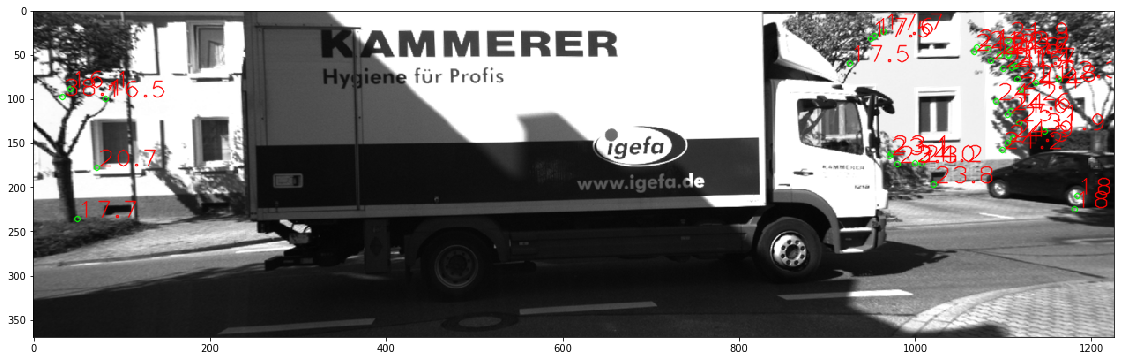

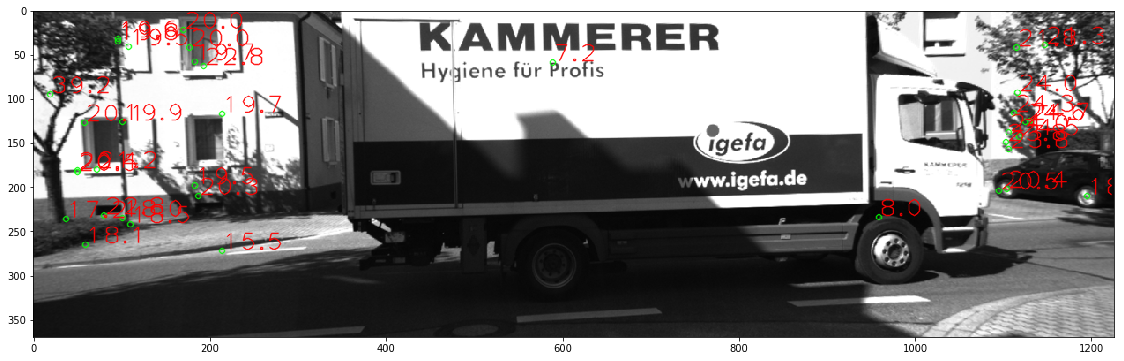

In [9]:
start = 637

for f in range(start, 641):
    frame[f].clean()
    frame[f].compute_depth()
    frame[f].filter_has_depth()

#frame[638].filter_observations(lambda x: x.cx < 300 or x.cx > 1100)
#frame[638].filter_observations(lambda x: x.cx < 300 or x.cx > 1100)



mappointcount = 0
frame[start].set_pose(np.eye(4))
for f in range(start,639):
    print('frame ', f)
    keyframe = frame[f]
    keyframeobservations = keyframe.get_static_observations()
    for obs in keyframeobservations:                
            if not obs.has_mappoint() and obs.get_depth() is not None:
                obs.create_mappoint(mappointcount)
                mappointcount += 1
    # if keyframe._previous_keyframe is not None:
    #     pk = keyframe._previous_keyframe
    #     keyframeobservations = list(keyframeobservations)
    #     keyframeobservations.extend([o for o in pk.get_static_observations() if o.mappoint.last_observation == o])

    matches = match_frame(frame[f+1], keyframeobservations, sequence_confidence = 1.6)
    pose, points_left = get_pose(matches)
    print(pose)
    frame[f+1].set_pose(pose)
    for obs, _ in matches:
        if obs.has_mappoint() and obs.is_static():
            if pose[0, 3] > 0.4:
                obs.check_inv_mappoint()
            else:
                obs.check_mappoint()
    matches = [m for m in matches if m[0].is_static()]
    pose, points_left = get_pose(matches)
    #frame[f+1].set_pose(pose)
    print(pose)
    show(draw_observations_depth([ o for o in frame[f+1].get_observations() if o.is_static()]))

    print(len(frame[f+1].get_observations()))
    print(len([ o for o in frame[f+1].get_observations() if o.is_static()]))


In [19]:
v = frame[639].get_pose() - frame[638].get_pose()
sum(sum(v * v))

2.2363800572142529

3

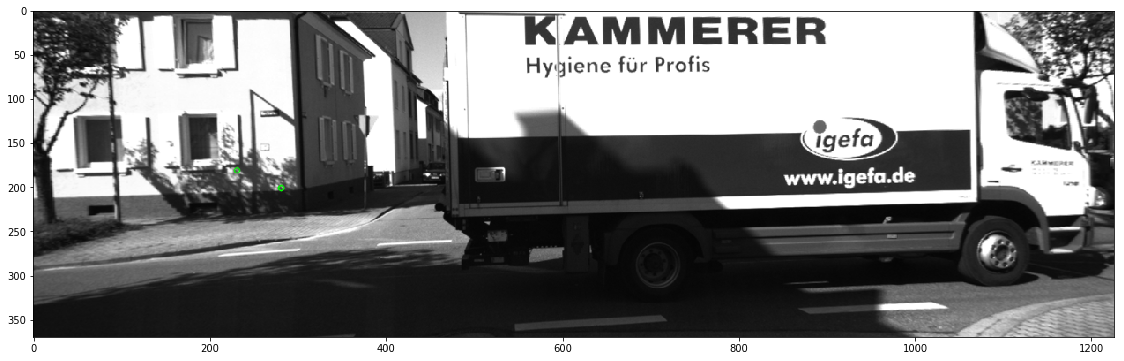

In [7]:
obs = [o for o in frame[640].get_observations() if o.is_static()]
show(draw_observations(obs))
len(obs)